In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_points = [1,1,2,3,4,5,6,7,8,9,10,11]
y_points = [1,2,3,1,4,5,6,4,7,10,15,9]

In [3]:
#initialize the parameters
import random
def parameters():
    m = random.random()
    c = random.random()
    return m, c

In [4]:
#to print our m and c
m,c = parameters()
m,c

(0.08195166294001233, 0.7814588654029528)

In [5]:
#let's create a yhat function for the prediction of y_points
def yhat(m,c,x):
    return np.dot(m,x)+c

In [6]:
#let's predict our y_points using the linear regression equation
ypred = yhat(m,c,x_points)
ypred

array([0.86341053, 0.86341053, 0.94536219, 1.02731385, 1.10926552,
       1.19121718, 1.27316884, 1.35512051, 1.43707217, 1.51902383,
       1.60097549, 1.68292716])

In [7]:
#let's define a cost function for the model
def cost(ypred, y):
    return (np.sum(ypred - y)**2)/2*len(y)

In [8]:
this_cost = cost(ypred,y_points)
this_cost

16306.30501189888

In [9]:
#let's define a function for change in parameters with respect to cost funtion
def change(ypred,y,x,m,c,a):
    dm = np.dot((ypred-y),x)/len(y)
    dc = np.sum(ypred-y)/len(y)
    c = c-a*dc
    m = m - a*dm
    return m,c

In [10]:
def gradient(x,y,a, number_of_iterations):
    m,c = parameters()
    for iters in range(number_of_iterations):
        ypred = yhat(m,c,x)
        this_cost = cost(ypred,y)
        m = m
        c = c
        m,c = change(ypred, y, x,m,c,a)
        print(this_cost, m, c)

In [11]:
gradient(x_points, y_points, 0.001, 100)

273.36661617583127 0.9222917832046363 0.9852804686538813
262.70139252908615 0.9204904727475897 0.9847290590623349
252.6902575261181 0.918768346360906 0.9841882581970985
243.28854669108551 0.9171219992855573 0.9836576133383864
234.45490522381363 0.9155481731412698 0.983136691229037
226.15102891667075 0.9140437496333557 0.9826250772377693
218.34142603175238 0.9126057445301021 0.9821223745584119
210.99319841107302 0.9112313018990875 0.9816282034435604
204.07584023624776 0.9099176885912912 0.9811422004711803
197.56105298586158 0.908662288962345 0.980664017842741
191.42257525945183 0.9074625998207306 0.9801933227115253
185.63602624763507 0.9063162255931654 0.9797297965398146
180.17876172930397 0.9052208736978402 0.979273134483713
175.02974156969117 0.9041743501165724 0.9788230448044164
170.16940777826173 0.9031745551573226 0.9783792483047945
165.5795722634036 0.9022194793988906 0.9779414777901947
161.2433134924123 0.9013071998099589 0.9775094775524273
157.1448813307897 0.9004358760349871 0.

In [12]:
def line_plot(m,c,x):
    x_values = [i for i in range(int(min(x))-1, int(max(x))+1)]
    y_values = yhat(m,c,x_values)
    plt.plot(x_values,y_values, 'r')

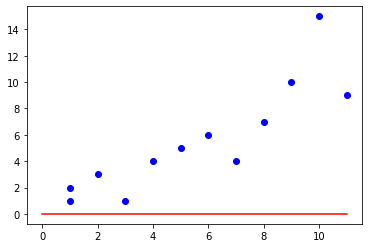

In [13]:
line_plot(0,0,x_points)
plt.plot(x_points,y_points, 'bo')

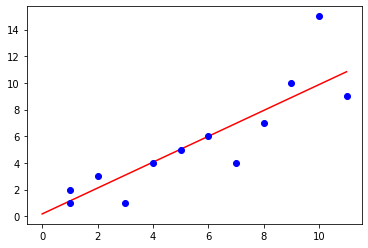

In [14]:
line_plot(0.969,0.1796,x_points)
plt.plot(x_points,y_points, 'bo')

In [15]:
ypred1 = yhat(0.969,0.1796,x_points)
ypred1

array([ 1.1486,  1.1486,  2.1176,  3.0866,  4.0556,  5.0246,  5.9936,
        6.9626,  7.9316,  8.9006,  9.8696, 10.8386])

In [17]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [18]:
X = df['newspaper']
Y = df['sales']

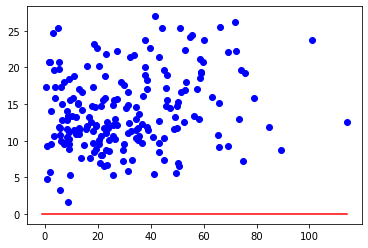

In [19]:
line_plot(0,0,X)
plt.plot(X,Y, 'bo')

In [20]:
gradient(X, Y, 0.001, 50000)

41034748.65799279 0.21629617380131677 0.5383460988055457
189086734.15433386 0.3501019504482944 0.5452215394124148
30919459.774629045 0.295635816839802 0.5480018028790052
78912715.06003024 0.31763599805010967 0.552443444328403
56701088.890163496 0.3085795732594387 0.5562084505996515
65220201.77198746 0.31213676989072 0.5602464018676829
61629619.55561311 0.31057100907599705 0.5641716285985742
63016345.24686971 0.3110859681869303 0.5681407703586676
62392259.682858534 0.3107558875039425 0.5720902089163254
62586275.47144027 0.3107690586948882 0.5760457833206136
62448444.07366814 0.31064285937130154 0.5799969997179294
62445430.998858914 0.31057330567416336 0.5839481207929808
62387727.07293011 0.31048078601130047 0.5878974158906194
62352269.04377198 0.3103976344641076 0.5918455885389395
62307818.640834466 0.31031071859402737 0.5957923536269842
62267058.77475295 0.3102253721021161 0.5997378275774353
62224839.980375 0.3101394287023562 0.6036819637306499
62183252.970063224 0.3100537682140561 0.6

50431727.70133545 0.2846621282929215 1.7753600759466113
50397881.20427874 0.2845849452094387 1.7789096492028027
50364057.422790475 0.2845077880304371 1.7824580311376708
50330256.341625385 0.28443065674722223 1.7860052221510512
50296477.94554867 0.28435355135110313 1.7895512226426455
50262722.21933534 0.28427647183339133 1.7930960330120214
50228989.14777103 0.2841994181854014 1.796639653658612
50195278.71565138 0.2841223903984509 1.8001820849817167
50161590.90778225 0.2840453884638603 1.8037233273805007
50127925.70897965 0.2839684123729528 1.8072633812539953
50094283.10406996 0.28389146211705474 1.810802247001098
50060663.07788957 0.28381453768749526 1.8143399250205725
50027065.61528509 0.2837376390756064 1.8178764157110483
49993490.701113366 0.2836607662727232 1.821411719471021
49959938.32024127 0.2835839192701834 1.8249458366988534
49926408.45754603 0.283507098059328 1.8284787677927734
49892901.097914755 0.2834303026315005 1.832010513150876
49859416.226245016 0.28335353297804755 1.835

41204235.07203981 0.2625614432492115 2.791748603520902
41176581.46815474 0.26249167768199205 2.7949570525803447
41148946.42357088 0.26242193552975857 2.7981644248078688
41121329.925832346 0.2623522167846524 2.8013707205648846
41093731.96249172 0.26228252143881753 2.8045759402126813
41066152.52111002 0.26221284948440066 2.807780084112427
41038591.589256376 0.26214320091355103 2.8109831526251683
41011049.15450843 0.26207357571842055 2.8141851461118303
40983525.20445221 0.2620039738911638 2.817386064933218
40956019.72668188 0.261934395423938 2.820585909450014
40928532.70880009 0.26186484030890284 2.823784680022781
40901064.13841782 0.26179530853822086 2.82698237701196
40873614.003154226 0.2617258001040572 2.8301790007778713
40846182.29063684 0.26165631499857944 2.833374551680714
40818768.9885016 0.26158685321395797 2.836569030080567
40791374.08439262 0.2615174147423658 2.839762436337387
40763997.56596229 0.2614479995759784 2.8429547708110112
40736639.42087142 0.2613786077069742 2.84614603

34558192.59726953 0.24506065700299964 3.5965923596759675
34534999.385033056 0.2449967651164533 3.5995306840022216
34511821.7385728 0.2449328946735457 3.6024680221568515
34488659.647442095 0.24486904566707995 3.6054043744708393
34465513.10120118 0.24480521808986141 3.6083397412750564
34442382.08941736 0.24474141193469798 3.6112741229002636
34419266.60166488 0.24467762719439987 3.6142075196771106
34396166.627525 0.2446138638617797 3.6171399319361357
34373082.15658609 0.2445501219296526 3.6200713600077665
34350013.17844331 0.24448640139083602 3.62300180422232
34326959.68269896 0.24442270223814988 3.6259312649100024
34303921.65896225 0.2443590244644165 3.628859742400908
34280899.09684931 0.24429536806246052 3.6317872370250215
34257891.98598342 0.24423173302510914 3.634713749112216
34234900.31599464 0.24416811934519192 3.6376392789922547
34211924.07652002 0.24410452701554067 3.6405638269947893
34188963.25720368 0.2440409560289898 3.643487393449362
34166017.84769657 0.2439774063783761 3.6464

31373662.32833219 0.2360775427410973 4.009716851501849
31352606.36578529 0.23601666580164424 4.012516521409435
31331564.53463158 0.23595580929394194 4.015315251681122
31310536.825387023 0.235894973211133 4.018113042632274
31289523.2285739 0.2358341575463624 4.020909894578149
31268523.734720856 0.2357733622927773 4.023705807833899
31247538.33436289 0.23571258744352724 4.026500782714572
31226567.018041376 0.235651832991764 4.0292948195351075
31205609.77630406 0.23559109893064178 4.032087918610342
31184666.59970493 0.23553038525331693 4.034880080255005
31163737.478804436 0.2354696919529482 4.03767130478372
31142822.40416927 0.23540901902269656 4.040461592511005
31121921.366372526 0.23534836645572535 4.043250943751275
31101034.35599355 0.23528773424520014 4.0460393588188355
31080161.363618083 0.23522712238428883 4.048826838027889
31059302.37983812 0.23516653086616163 4.0516133816925315
31038457.395252056 0.23510595968399095 4.054398990126754
31017626.4004645 0.23504540883095168 4.057183663

27821115.078223277 0.22549971742358077 4.496180518946787
27802443.35443888 0.22544239065423188 4.49881692006168
27783784.161901586 0.22538508312511207 4.501452436337569
27765137.49220131 0.2253277948297639 4.504087068071427
27746503.336933523 0.22527052576173207 4.506720815560127
27727881.68769935 0.22521327591456344 4.5093536791004425
27709272.536105506 0.22515604528180702 4.511985658989048
27690675.87376446 0.22509883385701396 4.514616755522519
27672091.6922942 0.22504164163373766 4.51724696899733
27653519.983318362 0.2249844686055336 4.519876299709855
27634960.738466255 0.22492731476595948 4.522504747956372
27616413.949372746 0.22487018010857512 4.525132314033057
27597879.60767835 0.22481306462694253 4.527758998235986
27579357.705029193 0.2247559683146259 4.530384800861138
27560848.233076952 0.2246988911651915 4.533009722204392
27542351.183479 0.22464183317220784 4.535633762561527
27523866.547898225 0.22458479432924552 4.538256922228221
27505394.318003196 0.22452777462987744 4.54087

22853098.255133983 0.209499876986043 5.231997269946589
22837760.74126948 0.20944792014420632 5.234386713435211
22822433.520947203 0.20939598074032323 5.23677535496969
22807116.58725876 0.2093440587685411 5.23916319481918
22791809.933300465 0.20929215422300929 5.241550233252747
22776513.552173205 0.20924026709787913 5.2439364705393645
22761227.436982557 0.20918839738730396 5.246321906947917
22745951.580838643 0.209136545085439 5.248706542747197
22730685.97685633 0.20908471018644154 5.251090378205909
22715430.618154947 0.20903289268447064 5.253473413592666
22700185.497858606 0.20898109257368758 5.2558556491759925
22684950.609095886 0.20892930984825536 5.25823708522432
22669725.945000097 0.20887754450233909 5.260617722005993
22654511.4987091 0.20882579653010577 5.262997559789262
22639307.26336534 0.20877406592572442 5.265376598842292
22624113.232115928 0.20872235268336595 5.267754839433155
22608929.3981125 0.20867065679720323 5.270132281829834
22593755.75451137 0.20861897826141113 5.27250

20663785.0569385 0.20189803271702075 5.5815985283763405
20649916.867764935 0.20184862723517066 5.583870637356329
20636057.986018393 0.20179923833497695 5.586141983762429
20622208.405452307 0.20174986601087444 5.58841256785058
20608368.119824335 0.20170051025729976 5.590682389876633
20594537.122896306 0.2016511710686915 5.592951450096355
20580715.40843427 0.20160184843948997 5.595219748765426
20566902.970208436 0.20155254236413755 5.59748728613944
20553099.801993165 0.2015032528370783 5.599754062473907
20539305.897567086 0.20145397985275826 5.602020078024249
20525521.25071287 0.2014047234056252 5.604285333045803
20511745.855217535 0.20135548349012902 5.606549827793822
20497979.704872053 0.2013062601007211 5.608813562523471
20484222.79347181 0.20125705323185508 5.61107653748983
20470475.11481611 0.20120786287798617 5.613338752947894
20456736.662708603 0.20115868903357156 5.615600209152572
20443007.430957004 0.20110953169307028 5.617860906358688
20429287.413373224 0.20106039085094324 5.62

17365757.991636883 0.18964043025133795 6.145313476444526
17354103.223824196 0.1895951387128095 6.147396389262182
17342456.277933974 0.18954986237520005 6.149478603004689
17330817.148716662 0.18950460123340782 6.151560117906673
17319185.830926225 0.18945935528233276 6.153640934202681
17307562.319320124 0.18941412451687645 6.1557210521271815
17295946.6086594 0.18936890893194233 6.157800471914566
17284338.69370848 0.18932370852243532 6.159879193799145
17272738.56923549 0.1892785232832623 6.161957218015151
17261146.230011906 0.1892333532093317 6.164034544796739
17249561.67081277 0.18918819829555372 6.166111174377985
17237984.88641667 0.18914305853684024 6.168187106992884
17226415.871605642 0.18909793392810484 6.170262342875357
17214854.62116526 0.18905282446426286 6.172336882259242
17203301.129884567 0.18900773014023128 6.174410725378301
17191755.39255614 0.18896265095092887 6.1764838724662185
17180217.403975993 0.188917586891276 6.178556323756598
17168687.158943716 0.1888725379561948 6.18

15503106.834810909 0.18219797636536414 6.487584529660472
15492702.157363333 0.18215518269161354 6.489552568160944
15482304.462858904 0.1821124033804391 6.491519946140824
15471913.746611034 0.1820696384270203 6.493486663821797
15461530.00393642 0.18202688782653842 6.495452721425476
15451153.230154851 0.18198415157417624 6.497418119173399
15440783.420589224 0.18194142966511817 6.499382857287028
15430420.570565652 0.18189872209455027 6.501346935987753
15420064.675413322 0.1818560288576602 6.503310355496888
15409715.730464587 0.18181334994963724 6.505273116035674
15399373.731054898 0.18177068536567229 6.5072352178252775
15389038.672522884 0.1817280351009578 6.509196661086789
15378710.550210282 0.181685399150688 6.511157446041228
15368389.35946192 0.1816427775100585 6.513117572909536
15358075.095625823 0.18160017017426672 6.515077041912584
15347767.754053082 0.1815575771385116 6.517035853271167
15337467.33009791 0.18151499839799365 6.518994007206006
15327173.819117691 0.18147243394791518 6.

13952195.47251984 0.17565224277236488 6.788616308328145
13942831.665953606 0.17561164600270507 6.790483313394151
13933474.143765613 0.17557106285828805 6.79234969184879
13924122.901738176 0.17553049333454088 6.7942154439023685
13914777.935656445 0.17548993742689206 6.796080569765123
13905439.241308445 0.17544939513077176 6.797945069647216
13896106.814484982 0.17540886644161163 6.799808943758744
13886780.6509797 0.17536835135484483 6.801672192309728
13877460.74658906 0.17532784986590608 6.8035348155101225
13868147.097112361 0.17528736197023162 6.80539681356981
13858839.698351711 0.17524688766325922 6.8072581866986015
13849538.546112034 0.17520642694042823 6.809118935106239
13840243.636201065 0.17516597979717943 6.8109790590023955
13830954.96442937 0.17512554622895524 6.81283855859667
13821672.526610302 0.1750851262311995 6.814697434098594
13812396.318560056 0.1750447197993577 6.816555685717628
13803126.336097598 0.17500432692887677 6.818413313663161
13793862.575044725 0.1749639476152051

12641017.868852518 0.16982838666502054 7.0564496592872334
12632534.039453954 0.16978974452017467 7.058226773101783
12624055.90385016 0.16975111534455298 7.0600032904746115
12615583.458219813 0.1697124991338026 7.0617792116058995
12607116.698744189 0.16967389588357226 7.06355453669576
12598655.621607088 0.1696353055895121 7.0653292659442375
12590200.222994912 0.16959672824727373 7.0671033995513115
12581750.499096585 0.16955816385251016 7.068876937716893
12573306.446103638 0.16951961240087596 7.0706498806408264
12564868.060210105 0.1694810738880271 7.072422228522889
12556435.337612597 0.16944254830962102 7.074193981562791
12548008.274510287 0.1694040356613166 7.075965139960176
12539586.867104886 0.16936553593877418 7.07773570391462
12531171.11160066 0.1693270491376556 7.079505673625632
12522761.004204405 0.16928857525362404 7.081275049292654
12514356.541125517 0.16925011428234432 7.083043831115062
12505957.718575852 0.16921166621948255 7.084812019292165
12497564.532769881 0.1691732310607

11453060.063226676 0.1642849334999699 7.311387557771354
11445373.51387788 0.1642481518700323 7.313079108355425
11437692.123241317 0.1642113825848857 7.314770091214832
11430015.887854794 0.16417462564038698 7.3164605065401185
11422344.804258408 0.16413788103239424 7.318150354521762
11414678.868994629 0.16410114875676704 7.319839635350177
11407018.07860825 0.1640644288093664 7.321528349215712
11399362.429646352 0.16402772118605466 7.323216496308655
11391711.918658322 0.1639910258826955 7.3249040768192275
11384066.542195933 0.16395434289515418 7.326591090937589
11376426.296813173 0.1639176722192971 7.328277538853833
11368791.179066435 0.1638810138509922 7.3299634207579905
11361161.185514355 0.16384436778610878 7.331648736840029
11353536.312717939 0.16380773402051754 7.333333487289853
11345916.557240436 0.1637711125500905 7.3350176722973
11338301.91564745 0.16373450337070117 7.3367012920521475
11330692.384506864 0.1636979064782243 7.338384346744107
11323087.960388903 0.16366132186853619 7.

9650985.859979454 0.1552943235546229 7.724856768624922
9644508.745682692 0.1552605593875085 7.726409549094409
9638035.978403972 0.15522680655245272 7.727961808413789
9631567.555225864 0.15519306504565233 7.729513546757971
9625103.473232856 0.15515933486330516 7.7310647643018084
9618643.729511475 0.15512561600161057 7.732615461220093
9612188.321150117 0.155091908456769 7.73416563768756
9605737.245239187 0.1550582122249823 7.735715293878884
9599290.498871023 0.15502452730245353 7.737264429968683
9592848.079139916 0.15499085368538698 7.738813046131515
9586409.98314211 0.15495719136998834 7.740361142541881
9579976.20797579 0.15492354035246444 7.74190871937422
9573546.75074111 0.1548899006290235 7.743455776802917
9567121.608540136 0.1548562721958749 7.745002315002295
9560700.778476924 0.1548226550492294 7.7465483341466195
9554284.25765742 0.15478904918529895 7.748093834410099
9547872.043189546 0.15475545460029683 7.749638815966882
9541464.13218317 0.15472187129043752 7.751183278991057
95350

7869279.751985329 0.14553472926942237 8.173690804567196
7863998.402999194 0.14550424065459022 8.175092945644531
7858720.598511158 0.14547376227246334 8.176494616129926
7853446.336142393 0.1454432941196074 8.177895816181323
7848175.613515638 0.1454128361925892 8.17929654595661
7842908.4282552665 0.14538238848797674 8.180696805613625
7837644.777987225 0.14535195100233908 8.18209659531015
7832384.660339051 0.14532152373224652 8.183495915203913
7827128.072939876 0.1452911066742705 8.184894765452594
7821875.013420431 0.14526069982498355 8.186293146213815
7816625.479413035 0.1452303031809594 8.187691057645148
7811379.4685515985 0.14519991673877294 8.189088499904113
7806136.978471584 0.14516954049500014 8.190485473148172
7800898.006810126 0.14513917444621827 8.19188197753474
7795662.551205831 0.1451088185890055 8.193278013221175
7790430.609299012 0.1450784729199415 8.194673580364785
7785202.178731436 0.14504813743560666 8.196068679122824
7779977.257146593 0.14501781213258294 8.197463309652493

6547045.0955111785 0.13755217637033418 8.540800474305566
6542651.144467749 0.13752436689037206 8.54207940463444
6538260.142358603 0.13749656674393373 8.543357905723838
6533872.087204614 0.13746877592788667 8.54463597771782
6529486.977027972 0.13744099443909932 8.5459136207604
6525104.809852214 0.1374132222744413 8.547190834995547
6520725.583702167 0.13738545943078317 8.548467620567179
6516349.296604015 0.13735770590499657 8.549743977619164
6511975.94658526 0.1373299616939542 8.551019906295323
6507605.53167474 0.13730222679452989 8.55229540673943
6503238.049902568 0.1372745012035983 8.55357047909521
6498873.499300259 0.13724678491803544 8.55484512350634
6494511.877900547 0.13721907793471808 8.556119340116448
6490153.183737575 0.13719138025052421 8.557393129069114
6485797.414846764 0.1371636918623328 8.55866649050787
6481444.5692648785 0.13713601276702397 8.5599394245762
6477094.645029936 0.13710834296147867 8.56121193141754
6472747.6401813775 0.13708068244257912 8.562484011175277
646840

5546614.950641074 0.13095918094278045 8.844005777745812
5542892.423272704 0.13093358422910636 8.84518294515354
5539172.394222718 0.13090799610629902 8.84635971747585
5535454.861814387 0.13088241657147512 8.847536094845344
5531739.824372127 0.13085684562175232 8.848712077394573
5528027.280221491 0.13083128325424928 8.849887665256052
5524317.227689123 0.13080572946608554 8.851062858562246
5520609.665102836 0.13078018425438173 8.852237657445578
5516904.590791516 0.13075464761625935 8.853412062038423
5513202.003085232 0.130729119548841 8.854586072473117
5509501.900315082 0.13070360004925 8.855759688881948
5505804.280813384 0.1306780891146109 8.85693291139716
5502109.142913498 0.130652586742049 8.858105740150956
5498416.484949959 0.1306270929286907 8.859278175275488
5494726.305258388 0.1306016076716634 8.86045021690287
5491038.602175512 0.13057613096809528 8.861621865165166
5487353.374039223 0.13055066281511565 8.862793120194402
5483670.619188469 0.13052520320985472 8.863963982122554
547999

4810780.98997942 0.12572038488707418 9.084932798731378
4807552.306528737 0.12569654643812656 9.086029105292807
4804325.789960509 0.12567271598993018 9.087125043907644
4801101.438820437 0.12564889353979977 9.088220614699381
4797879.251655233 0.125625079085051 9.089315817791466
4794659.227012592 0.12560127262300047 9.090410653307309
4791441.3634411385 0.12557747415096554 9.091505121370279
4788225.659490529 0.12555368366626463 9.0925992221037
4785012.113711355 0.12552990116621698 9.093692955630859
4781800.72465519 0.12550612664814276 9.094786322074995
4778591.4908746015 0.12548236010936306 9.095879321559313
4775384.410923087 0.12545860154719982 9.096971954206971
4772179.483355144 0.12543485095897589 9.09806422014109
4768976.706726236 0.12541110834201505 9.099156119484748
4765776.079592772 0.1253873736936419 9.10024765236098
4762577.600512181 0.125363647011182 9.101338818892785
4759381.26804281 0.12533992829196183 9.102429619203113
4756187.080743995 0.12531621753330874 9.103520053414877
47

3991716.2451213473 0.11939205263550426 9.375966505897148
3989037.2646798715 0.11937033812557951 9.376965134615025
3986360.0821959116 0.11934863090356147 9.377963428169322
3983684.696462773 0.1193269309670041 9.378961386672525
3981011.106274622 0.11930523831346225 9.379959010237087
3978339.3104263954 0.1192835529404916 9.38095629897542
3975669.307713851 0.11926187484564861 9.381953252999901
3973001.0969335358 0.11924020402649049 9.382949872422868
3970334.676882847 0.11921854048057542 9.38394615735662
3967670.046359951 0.11919688420546233 9.38494210791342
3965007.2041638377 0.11917523519871095 9.385937724205492
3962346.1490942864 0.11915359345788183 9.386933006345025
3959686.879951909 0.11913195898053638 9.387927954444168
3957029.3955380954 0.11911033176423678 9.388922568615031
3954373.694655061 0.11908871180654607 9.389916848969692
3951719.7761058034 0.11906709910502804 9.390910795620185
3949067.6386941583 0.11904549365724741 9.39190440867851
3946417.281224712 0.1190238954607696 9.39289

3379486.9911782662 0.11422404931669759 9.613637839311128
3377218.899210896 0.11420406931177078 9.614556699868995
3374952.329439394 0.11418409601260945 9.615475252035374
3372687.2808421883 0.11416412941696306 9.61639349591377
3370423.752398336 0.11414416952258168 9.61731143160765
3368161.743087625 0.11412421632721621 9.61822905922045
3365901.2518905075 0.11410426982861832 9.619146378855568
3363642.277788138 0.11408433002454045 9.62006339061637
3361384.8197623147 0.11406439691273569 9.620980094606184
3359128.876795574 0.11404447049095802 9.621896490928306
3356874.4478710876 0.11402455075696208 9.622812579685997
3354621.531972734 0.11400463770850328 9.623728360982483
3352370.128085066 0.11398473134333778 9.624643834920954
3350120.2351933355 0.11396483165922257 9.62555900160457
3347871.852283432 0.11394493865391526 9.62647386113645
3345624.9783419757 0.11392505232517432 9.627388413619682
3343379.612356241 0.11390517267075893 9.628302659157319
3341135.7533141905 0.11388529968842906 9.629216

3039366.156561318 0.11114894728496709 9.755058723776463
3037326.3315868196 0.11112999935752055 9.755930120117341
3035287.8756102268 0.11111105778944969 9.756801223996854
3033250.7877127766 0.11109212257862024 9.757672035513158
3031215.066976283 0.11107319372289849 9.758542554764377
3029180.7124832137 0.11105427122015157 9.759412781848603
3027147.7233166145 0.11103535506824722 9.760282716863895
3025116.0985601805 0.11101644526505393 9.761152359908275
3023085.837298222 0.11099754180844103 9.762021711079738
3021056.9386156145 0.11097864469627833 9.762890770476243
3019029.401597917 0.11095975392643655 9.763759538195718
3017003.2253312455 0.11094086949678703 9.764628014336054
3014978.4089023666 0.11092199140520186 9.765496198995113
3012954.951398651 0.11090311964955388 9.766364092270724
3010932.8519080477 0.11088425422771649 9.76723169426068
3008912.1095191874 0.11086539513756406 9.768099005062746
3006892.7233212236 0.11084654237697136 9.76896602477465
3004874.692404015 0.11082769594381418 

2735311.7785195154 0.10825066643327762 9.888347778008011
2733476.015076922 0.108232691237912 9.889174439367801
2731641.483679405 0.10821472207545005 9.890000823280351
2729808.1835001004 0.10819675894386699 9.890826929838777
2727976.113712697 0.10817880184113872 9.891652759136168
2726145.273491425 0.10816085076524179 9.892478311265577
2724315.6620110935 0.10814290571415347 9.89330358632003
2722487.2784470427 0.1081249666858517 9.89412858439252
2720660.1219751695 0.10810703367831503 9.894953305576008
2718834.1917719487 0.10808910668952286 9.895777749963425
2717009.487014359 0.10807118571745501 9.89660191764767
2715186.0068799956 0.10805327076009226 9.89742580872161
2713363.7505469485 0.10803536181541588 9.898249423278084
2711542.7171938843 0.10801745888140786 9.899072761409899
2709722.906000013 0.10799956195605082 9.899895823209826
2707904.316145128 0.10798167103732824 9.900718608770612
2706086.9468095046 0.10796378612322402 9.901541118184968
2704270.797174047 0.10794590721172297 9.90236

2345512.471763997 0.10428791672181663 10.0705906965606
2343938.316275172 0.10427127151963334 10.071356192856522
2342365.217257167 0.1042546319039763 10.072121432233654
2340793.1740009617 0.10423799787297057 10.072886414778226
2339222.1857979917 0.10422136942474182 10.073651140576438
2337652.251940172 0.10420474655741634 10.074415609714457
2336083.3717198987 0.10418812926912104 10.075179822278427
2334515.5444300324 0.10417151755798344 10.07594377835446
2332948.769363913 0.10415491142213172 10.07670747802864
2331383.0458153696 0.10413831085969472 10.07747092138702
2329818.3730786773 0.1041217158688018 10.078234108515625
2328254.750448621 0.10410512644758313 10.078997039500454
2326692.1772204065 0.10408854259416926 10.079759714427475
2325130.6526897643 0.10407196430669159 10.080522133382624
2323570.176152878 0.10405539158328206 10.081284296451814
2322010.746906391 0.1040388244220732 10.082046203720926
2320452.3642474376 0.10402226282119821 10.082807855275814
2318895.027473611 0.1040057067

2119390.4219683493 0.10183671694607416 10.183318936700216
2117968.024899101 0.10182089442491475 10.184046598713945
2116546.5824503084 0.10180507721417033 10.184774016506973
2115126.0939812614 0.10178926531205848 10.185501190161263
2113706.5588517487 0.10177345871679763 10.186228119758757
2112287.976421914 0.10175765742660657 10.186954805381365
2110870.3460523933 0.10174186143970484 10.187681247110971
2109453.667104214 0.10172607075431254 10.188407445029432
2108037.938938841 0.1017102853686503 10.189133399218575
2106623.1609181855 0.10169450528093948 10.189859109760203
2105209.3324045497 0.10167873048940188 10.19058457673609
2103796.45276071 0.10166296099226003 10.19130980022798
2102384.521349831 0.10164719678773702 10.192034780317595
2100973.537535524 0.10163143787405647 10.192759517086625
2099563.5006818315 0.1016156842494427 10.193484010616734
2098154.4101532046 0.10159993591212055 10.19420826098956
2096746.2653145299 0.10158419286031545 10.194932268286712
2095339.0655311362 0.101568

1898426.5681234822 0.09931153327361096 10.299449622678203
1897152.4676280394 0.0992965582642333 10.300138308467883
1895879.222226017 0.09928158828082541 10.30082676311821
1894606.8313435374 0.0992666233217005 10.301514986706758
1893335.2944070979 0.0992516633851723 10.30220297931108
1892064.610843586 0.09923670846955508 10.302890741008698
1890794.7800802751 0.09922175857316372 10.303578271877111
1889525.8015448144 0.0992068136943136 10.30426557199379
1888257.674665259 0.09919187383132079 10.30495264143618
1886990.398870018 0.09917693898250181 10.305639480281702
1885723.973587912 0.09916200914617382 10.306326088607749
1884458.3982481167 0.09914708432065443 10.307012466491688
1883193.672280226 0.099132164504262 10.307698614010864
1881929.7951141703 0.09911724969531524 10.30838453124259
1880666.7661803141 0.09910233989213361 10.309070218264157
1879404.5849093585 0.099087435093037 10.309755675152829
1878143.2507324286 0.09907253529634598 10.310440901985844
1876882.7630809871 0.099057640500

1708510.3554346263 0.09702095120042115 10.404791214400495
1707363.714354651 0.09700674496494106 10.405444545043117
1706217.8428256172 0.09699254349741192 10.406097656412415
1705072.7403310703 0.09697834679623354 10.406750548581982
1703928.4063548683 0.09696415485980618 10.407403221625389
1702784.8403812372 0.09694996768653068 10.408055675616177
1701642.0418947444 0.09693578527480842 10.408707910627866
1700500.010380308 0.09692160762304133 10.409359926733952
1699358.745323172 0.09690743472963181 10.410011724007903
1698218.2462089572 0.09689326659298292 10.410663302523167
1697078.5125235897 0.09687910321149805 10.411314662353162
1695939.5437533942 0.09686494458358139 10.411965803571285
1694801.339384982 0.09685079070763743 10.412616726250906
1693663.8989053525 0.09683664158207136 10.413267430465375
1692527.221801821 0.0968224972052888 10.41391791628801
1691391.3075620756 0.09680835757569597 10.414568183792111
1690256.155674117 0.09679422269169959 10.415218233050952
1689121.7656263046 0.0

1422392.753654728 0.09331442579153486 10.575250632074827
1421438.1361085088 0.09330146355425875 10.575846752477117
1420484.1592395185 0.09328850566741817 10.576442672807204
1419530.8226177848 0.093275552129553 10.577038393132234
1418578.1258136206 0.09326260293920367 10.577633913519335
1417626.0683976142 0.09324965809491105 10.57822923403561
1416674.6499406528 0.09323671759521647 10.578824354748143
1415723.870013905 0.09322378143866177 10.57941927572399
1414773.728188832 0.09321084962378928 10.58001399703019
1413824.2240371925 0.09319792214914191 10.580608518733754
1412875.3571309985 0.09318499901326285 10.581202840901677
1411927.1270425941 0.093172080214696 10.581796963600924
1410979.5333445782 0.09315916575198563 10.582390886898443
1410032.575609854 0.09314625562367655 10.582984610861159
1409086.2534115913 0.09313334982831396 10.583578135555971
1408140.5663232794 0.09312044836444375 10.584171461049761
1407195.5139186436 0.09310755123061198 10.584764587409385
1406251.095771759 0.09309

1208282.5099217445 0.0902891375018589 10.714380632079358
1207471.5892517655 0.09027719062338478 10.714930057140046
1206661.212819025 0.09026524775456765 10.715479297800599
1205851.3802582596 0.09025330889406173 10.716028354122905
1205042.0912044593 0.09024137404052171 10.716577226168832
1204233.3452928672 0.0902294431926028 10.71712591400023
1203425.1421589467 0.09021751634896058 10.717674417678923
1202617.481438431 0.09020559350825115 10.718222737266718
1201810.3627672866 0.09019367466913104 10.7187708728254
1201003.785781718 0.09018175983025717 10.719318824416735
1200197.7501181907 0.09016984899028702 10.719866592102465
1199392.2554134014 0.09015794214787845 10.720414175944313
1198587.3013042875 0.09014603930168974 10.720961576003983
1197782.8874280471 0.09013414045037973 10.721508792343155
1196979.0134221034 0.09012224559260762 10.72205582502349
1196175.6789241307 0.09011035472703303 10.72260267410663
1195372.8835720522 0.09009846785231616 10.723149339654194
1194570.6270040204 0.090

1069308.6980509583 0.08817953847999942 10.811398993245957
1068591.0475687918 0.08816829963320048 10.811915856633993
1067873.8787269748 0.0881570645584262 10.812432546550367
1067157.1912022568 0.08814583325441057 10.8129490630533
1066440.984671618 0.08813460571988806 10.81346540620099
1065725.2588122464 0.08812338195359358 10.813981576051624
1065010.0133015306 0.08811216195426233 10.814497572663363
1064295.2478171103 0.08810094572063008 10.815013396094349
1063580.96203682 0.088089733251433 10.815529046402707
1062867.155638701 0.0880785245454076 10.816044523646541
1062153.8283010353 0.0880673196012909 10.816559827883934
1061440.9797023088 0.08805611841782034 10.817074959172952
1060728.609521211 0.08804492099373366 10.817589917571642
1060016.7174366782 0.08803372732776926 10.818104703138028
1059305.3031278222 0.0880225374186657 10.818619315930118
1058594.3662740078 0.08801135126516217 10.819133756005897
1057883.9065547914 0.0880001688659982 10.819648023423335
1057173.9236499462 0.08798899

892629.6068867135 0.08528828276193394 10.944364968568143
892030.5319245921 0.08527801428941376 10.944837205408067
891431.859022645 0.08526774926323756 10.94530928375406
890833.5879110253 0.0852574876822486 10.945781203659317
890235.7183200847 0.08524722954529063 10.946252965177015
889638.2499803427 0.08523697485120772 10.946724568360311
889041.1826225116 0.0852267235988444 10.947196013262348
888444.5159774729 0.08521647578704548 10.947667299936246
887848.2497763038 0.08520623141465633 10.948138428435112
887252.3837502395 0.08519599048052251 10.948609398812033
886656.9176307146 0.08518575298349008 10.94908021112008
886061.8511493372 0.08517551892240548 10.949550865412302
885467.1840379011 0.08516528829611553 10.950021361741735
884872.9160283665 0.0851550611034674 10.950491700161393
884279.0468528903 0.08514483734330874 10.950961880724277
883685.5762437901 0.08513461701448743 10.951431903483366
883092.5039335872 0.08512440011585191 10.951901768491622
882499.8296549629 0.08511418664625092

758772.9036117834 0.08290116612236649 11.054146089001264
758263.6645668561 0.08289169882304355 11.054581480682561
757754.7672900608 0.08288223470117168 11.055016726236039
757246.2115520473 0.08287277375568458 11.055451825710742
756737.9971235757 0.0828633159855161 11.055886779155701
756230.1237755846 0.08285386138960049 11.056321586619923
755722.5912791806 0.08284440996687252 11.056756248152405
755215.3994055806 0.08283496171626706 11.057190763802126
754708.5479261988 0.08282551663671953 11.057625133618044
754202.0366125831 0.08281607472716566 11.058059357649109
753695.8652364262 0.0828066359865415 11.058493435944246
753190.033569593 0.0827972004137835 11.05892736855237
752684.5413840914 0.08278776800782843 11.059361155522375
752179.388452083 0.08277833876761347 11.059794796903141
751674.574545881 0.08276891269207608 11.060228292743533
751170.0994379537 0.08275948978015413 11.060661643092395
750665.9629009285 0.08275007003078588 11.06109484799856
750162.1647075686 0.08274065344290985 1

636386.5290730525 0.08052628137070938 11.163364677073147
635959.427806355 0.08051761113927074 11.163763412395074
635532.6131822519 0.0805089438177682 11.16416201389193
635106.0850083822 0.08050027940522518 11.16456048160863
634679.8430924973 0.0804916179006654 11.164958815590074
634253.8872424717 0.08048295930311283 11.165357015881147
633828.2172663222 0.0804743036115918 11.165755082526719
633402.8329721899 0.08046565082512702 11.166153015571643
632977.7341683399 0.08045700094274345 11.166550815060761
632552.9206631688 0.0804483539634664 11.166948481038895
632128.3922652097 0.08043970988632157 11.167346013550857
631704.14878311 0.08043106871033487 11.167743412641439
631280.1900256571 0.08042243043453266 11.168140678355423
630856.5158017551 0.08041379505794151 11.16853781073757
630433.1259204575 0.08040516257958845 11.168934809832633
630010.0201909144 0.08039653299850066 11.169331675685344
629587.1984224388 0.08038790631370586 11.169728408340422
629164.660424444 0.08037928252423193 11.1

572338.8443290892 0.0791918549573862 11.22473362082812
571954.7277046387 0.07918363259123332 11.225111759270924
571570.8688742907 0.07917541298470233 11.22548977080146
571187.2676650356 0.07916719613686705 11.225867655462324
570803.9239039737 0.07915898204680161 11.226245413296095
570420.8374183249 0.07915077071358043 11.22662304434534
570038.0080354201 0.07914256213627825 11.227000548652612
569655.4355827065 0.07913435631397009 11.227377926260447
569273.1198877555 0.07912615324573136 11.22775517721137
568891.0607782406 0.07911795293063767 11.228132301547888
568509.2580819662 0.07910975536776503 11.228509299312497
568127.711626837 0.07910156055618973 11.228886170547678
567746.421240885 0.07909336849498835 11.229262915295896
567365.3867522569 0.07908517918323787 11.229639533599604
566984.6079891998 0.07907699262001541 11.23001602550124
566604.0847800998 0.07906880880439858 11.230392391043226
566223.8169534344 0.07906062773546514 11.230768630267974
565843.8043378146 0.0790524494122933 11

468560.7822563732 0.07685976550700792 11.331984095551126
468246.3147205491 0.07685232584561694 11.332326238180274
467932.0582348942 0.07684488868115354 11.332668265978207
467618.01265775866 0.07683745401277962 11.333010178983464
467304.17784760165 0.0768300218396575 11.333351977234575
466990.55366296525 0.07682259216094968 11.33369366077005
466677.13996249484 0.07681516497581901 11.334035229628395
466363.93660492124 0.07680774028342853 11.334376683848095
466050.943449082 0.07680031808294165 11.334718023467627
465738.16035390383 0.07679289837352204 11.335059248525452
465425.5871784028 0.07678548115433363 11.335400359060023
465113.2237816939 0.0767780664245406 11.335741355109773
464801.0700229924 0.07677065418330749 11.336082236713128
464489.12576160074 0.07676324442979907 11.336423003908498
464177.39085691894 0.07675583716318042 11.336763656734282
463865.86516843474 0.07674843238261683 11.337104195228864
463554.5485557458 0.076741030087274 11.337444619430617
463243.44087852526 0.0767336

394040.9639971985 0.07502079255159069 11.416556633040747
393776.50931884325 0.07501397009332159 11.416870391112084
393512.2321252776 0.07500714992483198 11.417184043878741
393248.1322973799 0.07500033204535335 11.41749759137606
392984.20971611724 0.07499351645411742 11.41781103363937
392720.46426253614 0.07498670315035626 11.418124370703993
392456.89581775636 0.0749798921333021 11.418437602605232
392193.5042629836 0.0749730834021875 11.418750729378386
391930.2894794971 0.0749662769562452 11.419063751058738
391667.2513486611 0.07495947279470827 11.419376667681558
391404.3897519224 0.07495267091681003 11.419689479282107
391141.7045707936 0.07494587132178397 11.420002185895633
390879.19568688393 0.07493907400886396 11.420314787557372
390616.8629818726 0.07493227897728408 11.420627284302547
390354.706337516 0.0749254862262786 11.420939676166373
390092.7256356568 0.07491869575508214 11.42125196318405
389830.92075821385 0.07491190756292954 11.421564145390764
389569.291587187 0.07490512164905

343145.532875904 0.07366262995045224 11.479017180469365
342915.23590219324 0.07365626332389885 11.47930997529339
342685.09348884097 0.07364989883413696 11.479602671848498
342455.1055321162 0.07364353648044944 11.479895270167672
342225.27192835486 0.07363717626211932 11.48018777028388
341995.5925739708 0.07363081817843001 11.480480172230083
341766.06736543507 0.07362446222866499 11.48077247603923
341536.69619929546 0.07361810841210806 11.481064681744256
341307.478972174 0.0736117567280433 11.481356789378088
341078.41558075236 0.07360540717575499 11.48164879897364
340849.50592179113 0.07359905975452768 11.48194071056382
340620.74989210704 0.07359271446364608 11.482232524181516
340392.14738860045 0.07358637130239525 11.482524239859613
340163.6983082298 0.07358003027006035 11.48281585763098
339935.4025480352 0.07357369136592697 11.483107377528478
339707.26000511006 0.07356735458928075 11.483398799584956
339479.27057662985 0.07356101993940771 11.48369012383325
339251.4341598315 0.0735546874

303270.2601842332 0.07252642418383291 11.531270153799
303066.7249012524 0.07252043889499532 11.531545411280687
302863.326217928 0.07251445561496327 11.53182057637941
302660.0640425705 0.07250847434306243 11.532095649126171
302456.9382835752 0.07250249507861893 11.532370629551968
302253.94884938234 0.07249651782095898 11.532645517687785
302051.09564850206 0.07249054256940904 11.532920313564595
301848.37858950475 0.07248456932329586 11.533195017213366
301645.7975810149 0.07247859808194632 11.533469628665049
301443.35253173 0.0724726288446876 11.533744147950589
301241.04335040017 0.07246666161084704 11.534018575100918
301038.8699458445 0.07246069637975233 11.53429291014696
300836.8322269306 0.07245473315073123 11.534567153119625
300634.9301026026 0.07244877192311183 11.534841304049818
300433.1634818496 0.07244281269622235 11.53511536296843
300231.53227374086 0.07243685546939138 11.53538932990634
300030.0363873883 0.07243090024194761 11.535663204894423
299828.6757319757 0.07242494701322 11

256583.8830639801 0.07109643203643508 11.597034070630624
256411.6806422344 0.07109092668701969 11.597287256175552
256239.59379156167 0.07108542318533072 11.59754035674538
256067.6224343943 0.07107992153074796 11.59779337236863
255895.76649322372 0.07107442172265153 11.59804630307381
255724.02589058733 0.07106892376042169 11.598299148889422
255552.40054907603 0.07106342764343888 11.598551909843957
255380.89039133955 0.07105793337108386 11.598804585965896
255209.49534006874 0.07105244094273747 11.59905717728371
255038.21531801618 0.07104695035778086 11.599309683825862
254867.05024797807 0.07104146161559531 11.599562105620803
254696.00005281012 0.0710359747155624 11.59981444269698
254525.0646554091 0.07103048965706378 11.600066695082823
254354.24397873748 0.07102500643948147 11.600318862806759
254183.53794579493 0.07101952506219751 11.6005709458972
254012.94647964992 0.07101404552459438 11.600822944382552
253842.46950340303 0.07100856782605454 11.601074858291211
253672.10694021964 0.07100

214045.44647399354 0.0696751203314083 11.662398782549696
213901.79308545808 0.06967009200805194 11.66263003014054
213758.23610773322 0.06966506537232058 11.662861200119186
213614.77547612408 0.06966004042364796 11.663092292511681
213471.41112596105 0.06965501716146774 11.663323307344065
213328.14299263305 0.069649995585214 11.66355424464237
213184.97101155823 0.0696449756943208 11.663785104432616
213041.89511821396 0.06963995748822256 11.664015886740819
212898.91524810618 0.06963494096635384 11.664246591592983
212756.03133678887 0.06962992612814926 11.664477219015104
212613.24331986715 0.06962491297304386 11.66470776903317
212470.55113297934 0.06961990150047272 11.664938241673157
212327.95471181115 0.06961489170987112 11.665168636961038
212185.45399209074 0.06960988360067456 11.665398954922773
212043.04890958878 0.06960487717231874 11.665629195584316
211900.73940011903 0.06959987242423947 11.665859358971609
211758.52539954195 0.06959486935587286 11.666089445110588
211616.40684375574 0.

190191.02200427031 0.06881562619170996 11.7019260633276
190063.3781546561 0.06881088633505705 11.70214404462161
189935.81997129633 0.06880614806921295 11.702361952755908
189808.34739669375 0.06880141139364367 11.702579787755045
189680.96037339995 0.06879667630781555 11.702797549643568
189553.65884399402 0.06879194281119502 11.703015238446016
189426.44275109764 0.06878721090324867 11.703232854186917
189299.31203737235 0.06878248058344333 11.703450396890792
189172.2666455175 0.06877775185124596 11.703667866582155
189045.30651827191 0.06877302470612377 11.70388526328551
188918.43159840658 0.06876829914754402 11.704102587025353
188791.64182874432 0.06876357517497435 11.704319837826175
188664.9371521273 0.06875885278788231 11.704537015712452
188538.3175114571 0.0687541319857359 11.704754120708659
188411.78284965464 0.0687494127680031 11.704971152839258
188285.33310969226 0.06874469513415216 11.705188112128706
188158.96823457468 0.0687399790836515 11.705404998601448
188032.68816734746 0.0687

157915.82572688154 0.06756166753145762 11.759594375138397
157809.84289079366 0.06755734853319613 11.759793001573502
157703.93118349175 0.06755303098449326 11.759991561344846
157598.09055724606 0.06754871488486261 11.760190054474801
157492.32096434486 0.06754440023381776 11.760388480985734
157386.6223571217 0.0675400870308726 11.760586840900004
157280.9946879297 0.06753577527554104 11.760785134239963
157175.43790916222 0.06753146496733725 11.760983361027954
157069.95197324557 0.06752715610577562 11.761181521286314
156964.53683262636 0.06752284869037047 11.761379615037372
156859.19243980097 0.06751854272063657 11.761577642303449
156753.9187472817 0.06751423819608865 11.761775603106859
156648.71570762087 0.06750993511624168 11.761973497469908
156543.58327340274 0.06750563348061082 11.762171325414897
156438.52139723577 0.06750133328871127 11.762369086964116
156333.5300317746 0.06749703454005859 11.762566782139848
156228.6091296903 0.06749273723416833 11.76276441096437
156123.75864369434 0.

133068.66398531766 0.06650596584586564 11.808145045837263
132979.3569488736 0.06650200116623305 11.80832737751097
132890.10984950213 0.06649803781724133 11.808509647989826
132800.92264698306 0.06649407579844391 11.808691857294368
132711.79530111628 0.06649011510939437 11.808874005445128
132622.72777172987 0.06648615574964642 11.809056092462631
132533.72001867727 0.06648219771875385 11.809238118367395
132444.77200184405 0.06647824101627074 11.809420083179928
132355.88368113767 0.06647428564175126 11.809601986920738
132267.05501649034 0.0664703315947496 11.80978382961032
132178.285967871 0.06646637887482032 11.809965611269163
132089.57649526568 0.06646242748151801 11.810147331917753
132000.92655869064 0.0664584774143974 11.810328991576565
131912.33611818924 0.06645452867301334 11.81051059026607
131823.80513383375 0.06645058125692097 11.810692128006728
131735.33356571908 0.06644663516567545 11.810873604818998
131646.92137397 0.06644269039883215 11.811055020723327
131558.56851873492 0.0664

118556.69603072193 0.0658432424073602 11.838623037742009
118477.12848374083 0.06583950015349734 11.838795140275753
118397.61433732237 0.06583575915562397 11.838967185047787
118318.15355563219 0.06583201941331862 11.839139172077498
118238.74610285138 0.06582828092615985 11.839311101384267
118159.39194319032 0.0658245436937264 11.839482972987465
118080.09104088249 0.06582080771559713 11.83965478690646
118000.84336018695 0.06581707299135116 11.83982654316061
117921.64886538073 0.06581333952056757 11.839998241769273
117842.5075207706 0.06580960730282567 11.840169882751791
117763.41929068876 0.065805876337705 11.840341466127509
117684.38413948206 0.06580214662478502 11.840512991915759
117605.40203153326 0.06579841816364557 11.840684460135869
117526.47293124 0.06579469095386646 11.840855870807161
117447.59680302645 0.0657909649950277 11.841027223948949
117368.77361134453 0.0657872402867095 11.841198519580542
117290.00332066142 0.06578351682849207 11.841369757721242
117211.28589547919 0.06577

96929.43147378892 0.06477506526103476 11.887747442474033
96864.3787407856 0.06477168151286254 11.887903057687573
96799.36966694641 0.06476829890035678 11.888058620672942
96734.40422297237 0.06476491742313635 11.888214131447667
96669.48237958025 0.06476153708082019 11.888369590029273
96604.60410750874 0.06475815787302742 11.888524996435276
96539.76937751575 0.06475477979937729 11.888680350683188
96474.97816037863 0.0647514028594891 11.888835652790515
96410.23042689399 0.06474802705298237 11.888990902774756
96345.52614787957 0.06474465237947671 11.889146100653404
96280.86529417076 0.06474127883859186 11.889301246443948
96216.24783662356 0.0647379064299477 11.88945634016387
96151.67374611103 0.06473453515316414 11.889611381830646
96087.14299353177 0.06473116500786139 11.889766371461745
96022.65554979937 0.06472779599365969 11.889921309074634
95958.2113858439 0.06472442811017934 11.890076194686769
95893.81047262505 0.06472106135704095 11.890231028315604
95829.45278110972 0.0647176957338650

81787.878401495 0.06395418412940485 11.925498949408807
81732.98769455758 0.06395107588849096 11.925641894317508
81678.1338266949 0.06394796869077676 11.925784791250493
81623.31677318191 0.06394486253591213 11.925927640223865
81568.53650931036 0.063941757423547 11.926070441253719
81513.79301039185 0.06393865335333156 11.926213194356146
81459.0862517515 0.06393555032491603 11.926355899547232
81404.41620872935 0.0639324483379507 11.926498556843057
81349.78285668806 0.06392934739208611 11.926641166259696
81295.1861710003 0.06392624748697283 11.926783727813218
81240.62612705735 0.06392314862226149 11.926926241519688
81186.10270027009 0.06392005079760296 11.927068707395163
81131.61586606225 0.06391695401264819 11.927211125455697
81077.16559987534 0.0639138582670482 11.92735349571734
81022.75187716617 0.06391076356045412 11.92749581819613
80968.37467341218 0.06390766989251734 11.927638092908108
80914.03396409981 0.06390457726288913 11.927780319869303
80859.72972474233 0.06390148567122117 11.9

69383.27005130783 0.0632230156029906 11.959124662842624
69336.70451106848 0.0632201527596481 11.959256322161048
69290.17022259372 0.06321729087714402 11.959387937291469
69243.66716490714 0.06321442995515586 11.959519508248718
69197.19531704954 0.06321156999336124 11.959651035047619
69150.75465807714 0.06320871099143796 11.959782517702994
69104.34516705418 0.06320585294906378 11.95991395622966
69057.96682306472 0.0632029958659167 11.960045350642424
69011.61960520427 0.06320013974167475 11.960176700956096
68965.30349258402 0.06319728457601613 11.960308007185473
68919.01846432712 0.0631944303686191 11.960439269345352
68872.76449957285 0.06319157711916207 11.960570487450525
68826.54157747178 0.06318872482732348 11.960701661515776
68780.34967719254 0.063185873492782 11.960832791555886
68734.18877791292 0.0631830231152163 11.960963877585632
68688.05885882708 0.06318017369430516 11.961094919619784
68641.95989914615 0.06317732522972759 11.961225917673108
68595.89187808889 0.06317447772116255 1

61320.577845032814 0.06271210466964164 11.982620948602143
61279.42345964617 0.06270941330017654 11.982744722007466
61238.296694406 0.0627067228339991 11.982868453871484
61197.197530779405 0.06270403327080622 11.982992144208144
61156.1259502374 0.06270134461029478 11.983115793031379
61115.08193427189 0.06269865685216186 11.983239400355124
61074.06546438083 0.06269596999610458 11.983362966193308
61033.07652207824 0.0626932840418202 11.983486490559853
60992.11508888859 0.06269059898900603 11.98360997346868
60951.181146350544 0.06268791483735954 11.9837334149337
60910.27467601291 0.06268523158657827 11.983856814968826
60869.39565943934 0.06268254923635987 11.98398017358796
60828.54407820374 0.06267986778640207 11.984103490805005
60787.71991389438 0.06267718723640275 11.984226766633855
60746.92314810876 0.06267450758605984 11.9843500010884
60706.15376246159 0.06267182883507143 11.984473194182527
60665.411738573974 0.06266915098313561 11.984596345930118
60624.69705808597 0.06266647402995071 

55038.14381797203 0.06229022429370081 12.002022807561127
55001.205793881854 0.06228767451733762 12.002140069240497
54964.29256019196 0.06228512559674009 12.002257291564053
54927.404100265325 0.06228257753162104 12.002374474545006
54890.540397474695 0.062280030321693325 12.00249161819656
54853.70143520417 0.06227748396666992 12.002608722531914
54816.88719685074 0.06227493846626391 12.002725787564264
54780.097665820475 0.06227239382018844 12.002842813306803
54743.33282553174 0.06226985002815681 12.002959799772714
54706.592659413254 0.06226730708988235 12.003076746975182
54669.87715090646 0.06226476500507855 12.003193654927383
54633.1862834624 0.06226222377345897 12.00331052364249
54596.520040543 0.062259683394737246 12.003427353133674
54559.87840562185 0.06225714386862711 12.003544143414096
54523.26136218553 0.062254605194842466 12.003660894496921
54486.6688937252 0.06225206737309714 12.003777606395301
54450.10098375294 0.06224953040310525 12.003894279122388
54413.55761578503 0.062246994

49598.74951659453 0.06190504990429764 12.019736594700781
49565.46206034365 0.06190262940163308 12.019847911211304
49532.19694446869 0.06190020971134684 12.019959190361355
49498.95415397759 0.0618977908331663 12.020070432163473
49465.73367388564 0.061895372766818876 12.020181636630193
49432.535489221234 0.061892955512032125 12.020292803774046
49399.359585018756 0.06189053906853362 12.020403933607557
49366.20594632762 0.06188812343605112 12.02051502614325
49333.074558202316 0.0618857086143124 12.020626081393642
49299.96540571242 0.0618832946030454 12.020737099371246
49266.87847393256 0.06188088140197807 12.020848080088573
49233.81374795016 0.06187846901083848 12.02095902355813
49200.771212861466 0.06187605742935479 12.021069929792414
49167.75085377528 0.061873646657255296 12.021180798803925
49134.75265580752 0.061871236694268354 12.021291630605155
49101.77660408469 0.061868827540122386 12.021402425208594
49068.82268374371 0.0618664191945459 12.021513182626725
49035.89087993184 0.06186401

43483.388992230364 0.06144582437917034 12.040855919933712
43454.205768402746 0.06144355800352917 12.040960148295698
43425.04213045687 0.06144129238853763 12.041064341676162
43395.89806525028 0.061439027533940475 12.041168500086846
43366.77355964448 0.061436763439482456 12.041272623539486
43337.66860051387 0.06143450010490847 12.041376712045816
43308.58317473993 0.061432237529963477 12.041480765617564
43279.51726921207 0.061429975714392494 12.041584784266457
43250.4708708303 0.061427714657940675 12.041688768004212
43221.44396650403 0.061425454360353286 12.041792716842549
43192.4365431478 0.06142319482137558 12.04189663079318
43163.44858768814 0.06142093604075295 12.042000509867815
43134.4800870605 0.061418678018230914 12.042104354078159
43105.53102820673 0.061416420753554996 12.042208163435912
43076.601398079336 0.061414164246470865 12.042311937952773
43047.691183638985 0.06141190849672425 12.042415677640433
43018.800371856356 0.06140965350406103 12.042519382510584
42989.92894970627 0.0

35910.91602888811 0.06082973882406288 12.069189081959097
35886.81495662579 0.06082767922140708 12.069283801037107
35862.730059435315 0.06082562031000296 12.069378488325139
35838.661326462876 0.06082356208961856 12.069473143833862
35814.608746858044 0.060821504560021895 12.069567767573943
35790.57230978195 0.06081944772098118 12.069662359556043
35766.55200439962 0.06081739157226465 12.06975691979082
35742.54781988519 0.060815336113640615 12.06985144828893
35718.55974541817 0.06081328134487743 12.069945945061024
35694.587770188096 0.0608112272657436 12.070040410117752
35670.63188338783 0.06080917387600761 12.070134843469756
35646.6920742237 0.06080712117543817 12.070229245127678
35622.76833190176 0.060805069163803925 12.070323615102156
35598.860645639616 0.0608030178408736 12.070417953403823
35574.96900466411 0.06080096720641616 12.070512260043309
35551.09339820337 0.060798917260200466 12.07060653503124
35527.233815497886 0.06079686800199553 12.07070077837824
35503.39024579373 0.06079481

29657.161502852563 0.06026986188995481 12.094937265400265
29637.25754406994 0.060267990195332424 12.09502334277468
29617.366943530335 0.06026611912889533 12.095109391259477
29597.489692267944 0.06026424869043267 12.095195410864353
29577.62578132613 0.06026237887973377 12.095281401599001
29557.775201747954 0.06026050969658781 12.09536736347311
29537.93794458975 0.060258641140784275 12.095453296496368
29518.11400090809 0.06025677321211255 12.095539200678456
29498.303361769384 0.060254905910362186 12.095625076029055
29478.50601824248 0.06025303923532272 12.09571092255784
29458.72196140752 0.06025117318678391 12.095796740274487
29438.951182343375 0.06024930776453539 12.095882529188664
29419.193672141893 0.06024744296836702 12.095968289310038
29399.44942189647 0.06024557879806865 12.096054020648273
29379.718422708378 0.06024371525343024 12.096139723213028
29360.00066568456 0.060241852334241806 12.096225397013962
29340.2961419369 0.060239990040293415 12.096311042060726
29320.60484258524 0.06

24214.528876908047 0.059732227070096615 12.119662556125308
24198.277659317468 0.05973053581852442 12.119740335103282
24182.037348486905 0.059728845134576505 12.11981808797678
24165.80793709742 0.05972715501806238 12.119895814754562
24149.58941783366 0.05972546546879161 12.119973515445386
24133.381783386012 0.059723776486573815 12.120051190058007
24117.185026449264 0.059722088071218704 12.120128838601177
24100.99913972258 0.05972040022253601 12.120206461083647
24084.824115910626 0.05971871294033552 12.120284057514164
24068.659947723056 0.05971702622442711 12.12036162790147
24052.506627874656 0.05971534007462074 12.120439172254308
24036.36414908376 0.05971365449072638 12.120516690581413
24020.232504076404 0.059711969472554166 12.120594182891521
24004.111685579337 0.05971028501991415 12.120671649193365
23988.00168632766 0.05970860113261654 12.120749089495673
23971.90249906105 0.05970691781047165 12.120826503807171
23955.814116521502 0.05970523505328974 12.120903892136583
23939.73653145814

19957.42097641882 0.059267872416603966 12.1410177648712
19944.026852895502 0.05926633701351281 12.141088376532513
19930.64171863617 0.05926480212573945 12.14115896449487
19917.265567609833 0.05926326775311102 12.141229528766226
19903.898393785817 0.05926173389545457 12.141300069354532
19890.54019114022 0.059260200552597286 12.141370586267735
19877.19095365251 0.05925866772436643 12.141441079513783
19863.850675304177 0.059257135410589204 12.141511549100619
19850.51935008344 0.05925560361109296 12.141581995036184
19837.19697198162 0.05925407232570511 12.141652417328414
19823.88353499431 0.05925254155425312 12.141722815985245
19810.57903312039 0.05925101129656451 12.141793191014612
19797.28346036221 0.059249481552466766 12.141863542424442
19783.996810729444 0.059247952321787624 12.141933870222664
19770.71907823133 0.0592464236043547 12.1420041744172
19757.450256884575 0.05924489539999577 12.142074455015976
19744.190340707548 0.0592433677085386 12.142144712026909
19730.93932372464 0.059241

16327.72074816495 0.058831000576637774 12.161109066352749
16316.76264346715 0.0588296117981409 12.161172934894777
16305.811893136717 0.05882822348575115 12.161236782001001
16294.868492238444 0.058826835639312125 12.161300607678617
16283.93243583832 0.058825448258667375 12.161364411934816
16273.003719009108 0.05882406134366063 12.161428194776786
16262.08233682406 0.0588226748941356 12.161491956211714
16251.16828436118 0.05882128890993608 12.161555696246786
16240.26155670021 0.058819903390905835 12.161619414889186
16229.362148925555 0.05881851833688876 12.161683112146092
16218.470056125174 0.05881713374772882 12.161746788024681
16207.585273389022 0.05881574962326995 12.161810442532127
16196.707795812572 0.05881436596335627 12.161874075675605
16185.83761849096 0.05881298276783179 12.161937687462286
16174.974736525217 0.05881160003654063 12.162001277899336
16164.119145020904 0.05881021776932707 12.16206484699392
16153.270839083129 0.0588088359660353 12.162128394753202
16142.429813823008 0.

13712.538651204255 0.058485168616242054 12.177013534305646
13703.335686716058 0.0584838959071876 12.177072064929439
13694.138898660149 0.05848262362528465 12.177130575908961
13684.948282889436 0.05848135177038976 12.177189067250806
13675.763835263111 0.05848008034235968 12.177247538961563
13666.585551641094 0.05847880934105114 12.17730599104782
13657.413427886422 0.05847753876632092 12.177364423516167
13648.24745986413 0.058476268618025795 12.177422836373184
13639.087643444895 0.05847499889602275 12.177481229625455
13629.933974498348 0.05847372960016863 12.17753960327956
13620.786448898889 0.0584724607303204 12.177597957342078
13611.64506252454 0.05847119228633513 12.177656291819583
13602.509811253916 0.05846992426806985 12.177714606718647
13593.380690970449 0.0584686566753817 12.177772902045842
13584.257697559178 0.05846738950812788 12.177831177807736
13575.140826907676 0.05846612276616556 12.177889434010897
13566.030074907238 0.05846485644935201 12.177947670661888
13556.925437451235 

12143.504644426792 0.05826162928772449 12.187293885729936
12135.35471356087 0.05826043160379264 12.187348966022949
12127.210252398841 0.05825923432183204 12.187404027829704
12119.071257269656 0.05825803744170778 12.187459071156406
12110.937724504674 0.05825684096328497 12.187514096009256
12102.809650438532 0.05825564488642885 12.187569102394454
12094.68703140734 0.05825444921100461 12.187624090318199
12086.569863749943 0.058253253936877525 12.187679059786687
12078.458143807658 0.058252059063912905 12.187734010806112
12070.35186792444 0.0582508645919761 12.187788943382667
12062.251032446547 0.058249670520932516 12.187843857522541
12054.15563372316 0.058248476850647636 12.187898753231922
12046.065668104577 0.05824728358098691 12.187953630516995
12037.981131945138 0.0582460907118159 12.188008489383945
12029.90202160102 0.0582448982430002 12.188063329838952
12021.828333430312 0.05824370617440544 12.188118151888197
12013.760063793843 0.05824251450589725 12.188172955537857
12005.697209056256

10994.9173290424 0.05808867414828869 12.195247920600796
10987.538255312873 0.05808753451222084 12.195300331330268
10980.164133937957 0.058086395258641996 12.195352724469451
10972.794961593669 0.058085256387423775 12.19540510002425
10965.430734958976 0.05808411789843786 12.195457458000563
10958.071450714771 0.05808297979155599 12.195509798404293
10950.717105543368 0.058081842066649875 12.195562121241338
10943.367696130264 0.05808070472359133 12.195614426517592
10936.02321916318 0.05807956776225221 12.19566671423895
10928.683671331262 0.05807843118250438 12.195718984411304
10921.349049326698 0.05807729498421977 12.195771237040542
10914.019349844059 0.05807615916727039 12.195823472132554
10906.694569578844 0.058075023731528216 12.195875689693224
10899.374705230368 0.05807388867686535 12.195927889728438
10892.059753498532 0.05807275400315384 12.195980072244076
10884.74971108697 0.05807161971026586 12.196032237246019
10877.444574700821 0.0580704857980736 12.196084384740146
10870.14434104654

9789.278662967416 0.05789710044968241 12.204058204493052
9782.70873553131 0.05789602511031041 12.20410765828142
9776.143217404055 0.05789495013184794 12.204157095471917
9769.582105625566 0.057893875514173854 12.204206516070117
9763.025397238252 0.05789280125716701 12.204255920081588
9756.473089288036 0.057891727360706434 12.204305307511895
9749.925178820607 0.05789065382467109 12.204354678366604
9743.38166288504 0.05788958064893999 12.20440403265128
9736.84253853194 0.05788850783339222 12.20445337037148
9730.307802814275 0.05788743537790693 12.204502691532767
9723.777452786353 0.05788636328236324 12.204551996140697
9717.25148550458 0.05788529154664034 12.204601284200827
9710.729898028147 0.0578842201706175 12.20465055571871
9704.212687416957 0.05788314915417394 12.204699810699898
9697.699850733672 0.05788207849718899 12.204749049149942
9691.191385043128 0.057881008199542026 12.20479827107439
9684.687287411673 0.05787993826111245 12.204847476478786
9678.187554908054 0.05787886868177972 

8100.8108996970295 0.057607716702326325 12.217366675262056
8095.37416205579 0.05760673848703205 12.21741166241067
8089.941073200854 0.0576057606000502 12.217456634460527
8084.511630680777 0.05760478304127048 12.217501591416692
8079.0858320501375 0.05760380581058278 12.217546533284231
8073.663674862746 0.057602828907876984 12.21759146006821
8068.245156674683 0.05760185233304299 12.21763637177369
8062.83027504381 0.057600876085970774 12.217681268405732
8057.419027529277 0.05759990016655032 12.217726149969396
8052.011411692159 0.05759892457467163 12.217771016469738
8046.607425095443 0.05759794931022483 12.217815867911813
8041.2070653036535 0.05759697437310004 12.217860704300676
8035.810329881693 0.05759599976318735 12.21790552564138
8030.4172163980165 0.05759502548037696 12.217950331938974
8025.027722420975 0.057594051524559056 12.217995123198508
8019.641845522615 0.05759307789562395 12.218039899425028
8014.2595832741545 0.05759210459346188 12.21808466062358
8008.880933250518 0.0575911316

6739.673253723367 0.057351599611540044 12.229145245576778
6735.150023183061 0.057350707355241316 12.22918627955667
6730.629828340855 0.05734981539840505 12.229227299764581
6726.112667159582 0.057348923740930736 12.229268306205133
6721.598537603346 0.05734803238271791 12.229309298882947
6717.087437637463 0.05734714132366615 12.229350277802643
6712.579365228197 0.05734625056367499 12.229391242968838
6708.074318344414 0.05734536010264411 12.229432194386145
6703.572294955433 0.05734446994047319 12.229473132059184
6699.073293031259 0.05734358007706185 12.229514055992563
6694.577310545175 0.05734269051230989 12.229554966190896
6690.084345469991 0.05734180124611704 12.229595862658792
6685.594395781136 0.057340912278383116 12.22963674540086
6681.107459454127 0.0573400236090079 12.229677614421705
6676.623534467906 0.057339135237891345 12.229718469725935
6672.142618799611 0.05733824716493323 12.22975931131815
6667.664710431771 0.05733735939003363 12.229800139202954
6663.189807343836 0.0573364719

5491.747731576315 0.05709288559963861 12.241043245711131
5488.0620275180445 0.05709208017392392 12.241080286438809
5484.378797065402 0.05709127501852932 12.241117314734735
5480.698038557472 0.05709047013336406 12.241154330603084
5477.019750335124 0.05708966551833741 12.241191334048027
5473.34393074055 0.05708886117335871 12.241228325073731
5469.670578117893 0.05708805709833739 12.241265303684367
5465.999690809755 0.05708725329318274 12.2413022698841
5462.331267163201 0.05708644975780428 12.241339223677096
5458.665305523695 0.057085646492111404 12.24137616506752
5455.001804239717 0.05708484349601365 12.241413094059531
5451.340761659563 0.05708404076942053 12.241450010657294
5447.682176132985 0.057083238312241553 12.241486914864968
5444.02604601121 0.057082436124386314 12.241523806686711
5440.372369646151 0.0570816342057644 12.24156068612668
5436.72114539133 0.05708083255628549 12.241597553189031
5433.072371600872 0.05708003117585925 12.241634407877918
5429.426046630026 0.057079230064395

4465.885791136428 0.05685716813048045 12.251883657713172
4462.8885789215365 0.056856441817162436 12.2519170601404
4459.893378240657 0.05685571574761247 12.251950451356977
4456.900187743755 0.056854989921748735 12.251983831366667
4453.909006081877 0.056854264339489466 12.252017200173231
4450.919831906235 0.056853539000752844 12.252050557780429
4447.932663870521 0.05685281390545722 12.25208390419202
4444.947500627081 0.05685208905352078 12.25211723941176
4441.964340831995 0.05685136444486198 12.252150563443406
4438.983183139347 0.056850640079399085 12.252183876290715
4436.004026205692 0.056849915957050454 12.252217177957439
4433.026868688871 0.05684919207773455 12.252250468447329
4430.0517092467635 0.056848468441369815 12.252283747764139
4427.078546537773 0.05684774504787463 12.252317015911617
4424.107379222861 0.05684702189716758 12.252350272893512
4421.138205961852 0.0568462989891671 12.252383518713572
4418.171025417325 0.05684557632379179 12.252416753375543
4415.205836250966 0.0568448

3763.2039284353523 0.05667963386265311 12.260048282145137
3760.678310605177 0.05667896713406361 12.260078944329953
3758.1543878054504 0.05667830062924411 12.260109596223808
3755.632158898976 0.056677634348119545 12.260140237830159
3753.1116227479047 0.05667696829061472 12.260170869152457
3750.592778217324 0.05667630245665469 12.260201490194154
3748.0756241711965 0.05667563684616438 12.2602321009587
3745.560159475518 0.05667497145906883 12.260262701449543
3743.046382996081 0.056674306295293034 12.260293291670132
3740.534293600134 0.05667364135476206 12.260323871623916
3738.02389015501 0.05667297663740094 12.26035444131434
3735.5151715294355 0.056672312143134784 12.260385000744845
3733.0081365931064 0.05667164787188877 12.260415549918878
3730.5027842154095 0.05667098382358799 12.260446088839881
3727.9991132675063 0.05667031999815766 12.260476617511296
3725.4971226203033 0.0566696563955229 12.26050713593656
3722.9968111472836 0.05666899301560905 12.260537644119115
3720.4981777201233 0.056

3168.9568551302436 0.05651605198133952 12.267571250196006
3166.830057303364 0.05651544015472534 12.267599387493572
3164.7046868454686 0.0565148285334548 12.267627515347591
3162.5807427973923 0.05651421711745887 12.267655633761233
3160.458224202805 0.05651360590666872 12.267683742737665
3158.337130104859 0.05651299490101549 12.267711842280056
3156.217459547068 0.05651238410043028 12.26773993239157
3154.0992115744743 0.0565117735048443 12.267768013075374
3151.9823852325776 0.05651116311418879 12.267796084334632
3149.8669795662 0.05651055292839485 12.267824146172506
3147.752993623334 0.056509942947393865 12.26785219859216
3145.6404264499397 0.056509333171117 12.267880241596753
3143.529277094219 0.05650872359949555 12.267908275189447
3141.4195446049016 0.056508114232460875 12.267936299373398
3139.3112280309792 0.05650750506994431 12.267964314151765
3137.2043264220283 0.05650689611187719 12.267992319527707
3135.0988388281257 0.05650628735819086 12.268020315504376
3132.9947643012365 0.056505

2618.8522264159055 0.05635029084730693 12.275194439912307
2617.0946230536283 0.056349734654077235 12.275220018685845
2615.3381992805425 0.05634917864751923 12.275245588874538
2613.5829543047053 0.05634862282757025 12.275271150481268
2611.8288873352258 0.05634806719416768 12.275296703508914
2610.075997581469 0.056347511747248905 12.275322247960355
2608.3242842534296 0.05634695648675135 12.27534778383847
2606.573746561538 0.056346401412612455 12.275373311146135
2604.8243837167975 0.05634584652476968 12.275398829886228
2603.07619493039 0.05634529182316043 12.275424340061624
2601.3291794149854 0.05634473730772229 12.275449841675197
2599.583336382765 0.05634418297839275 12.275475334729823
2597.8386650465254 0.05634362883510929 12.275500819228371
2596.0951646206413 0.05634307487780953 12.275526295173716
2594.352834318673 0.05634252110643103 12.275551762568725
2592.6116733558965 0.05634196752091143 12.27557722141627
2590.871680946702 0.056341414121188274 12.27560267171922
2589.132856307699 0.

2199.3953063261747 0.056211788274419534 12.281564035508273
2197.9192151799284 0.05621127856595197 12.281587476493828
2196.444114689855 0.056210769028554694 12.281610909612029
2194.970004191381 0.0562102596621703 12.281634334865519
2193.4968830198136 0.05620975046674137 12.281657752256935
2192.0247505117527 0.05620924144221058 12.281681161788917
2190.553606003111 0.056208732588520535 12.281704563464103
2189.0834488310356 0.056208223905613905 12.28172795728513
2187.614278332951 0.05620771539343337 12.281751343254632
2186.1460938466957 0.056207207051921663 12.281774721375246
2184.6788947101263 0.056206698881021436 12.281798091649607
2183.212680262331 0.056206190880675466 12.281821454080347
2181.747449842395 0.05620568305082651 12.2818448086701
2180.2832027899103 0.05620517539141737 12.281868155421494
2178.819938444937 0.056204667902390815 12.281891494337163
2177.357656147651 0.056204160583689655 12.281914825419737
2175.8963552392383 0.056203653435256726 12.281938148671843
2174.43603506109

1896.1240618258835 0.0561032013681625 12.28655783934495
1894.8515066231 0.05610272810404682 12.286579604291001
1893.5798054765764 0.05610225499876987 12.286601361932219
1892.3089578130564 0.05610178205227829 12.286623112271053
1891.0389630600523 0.05610130926451883 12.286644855309957
1889.7698206448126 0.056100836635438196 12.286666591051379
1888.5015299955164 0.05610036416498314 12.286688319497769
1887.2340905403444 0.0560998918531004 12.286710040651574
1885.967501708295 0.0560994196997368 12.286731754515243
1884.7017629282143 0.0560989477048391 12.286753461091221
1883.436873629894 0.056098475868354154 12.286775160381957
1882.1728332427092 0.05609800419022873 12.286796852389893
1880.909641197689 0.05609753267040977 12.286818537117474
1879.6472969246995 0.05609706130884405 12.286840214567144
1878.3857998554436 0.056096590105478544 12.286861884741347
1877.125149420592 0.05609611906026006 12.286883547642523
1875.8653450526147 0.05609564817313559 12.286905203273113
1874.6063861834468 0.05

1703.004743186256 0.05602946429013527 12.289948934237053
1701.8617971154836 0.05602901577393916 12.289969561050896
1700.7196181154509 0.05602856740827571 12.289990180941889
1699.5782056719077 0.056028119193094486 12.290010793912355
1698.4375592700494 0.05602767112834493 12.290031399964617
1697.2976783961424 0.05602722321397661 12.290051999100998
1696.1585625359228 0.056026775449939 12.290072591323817
1695.020211176364 0.05602632783618167 12.290093176635395
1693.8826238043337 0.056025880372654206 12.290113755038053
1692.745799906729 0.056025433059306115 12.290134326534108
1691.6097389717738 0.056024985896087086 12.29015489112588
1690.4744404867524 0.05602453888294665 12.290175448815685
1689.3399039404599 0.05602409201983449 12.290195999605839
1688.2061288212726 0.05602364530670024 12.290216543498659
1687.0731146181956 0.056023198743493534 12.290237080496459
1685.9408608206727 0.05602275233016409 12.290257610601554
1684.809366918116 0.05602230606666156 12.290278133816257
1683.67863240090

1533.6675827253418 0.05596128474735666 12.293084443609654
1532.6382847478067 0.05596085911383888 12.293104018071874
1531.609677568174 0.05596043362317384 12.293123585964437
1530.5817607229642 0.05596000827531364 12.29314314728955
1529.554533748563 0.05595958307021029 12.293162702049417
1528.5279961821184 0.055959158007815896 12.29318225024624
1527.5021475610556 0.05595873308808258 12.293201791882222
1526.4769874228432 0.05595830831096244 12.293221326959566
1525.4525153054612 0.05595788367640762 12.293240855480473
1524.4287307471434 0.055957459184370256 12.293260377447144
1523.4056332864445 0.05595703483480253 12.293279892861777
1522.3832224623302 0.05595661062765663 12.293299401726573
1521.3614978137973 0.05595618656288475 12.29331890404373
1520.340458880352 0.05595576264043908 12.293338399815443
1519.3201052021643 0.05595533886027193 12.293357889043913
1518.3004363186442 0.05595491522233544 12.293377371731331
1517.2814517710226 0.055954491726582 12.293396847879897
1516.2631510991223 0

1295.8288695037427 0.05585881044064323 12.297797135071871
1294.9591934087377 0.05585841919994341 12.297815127842595
1294.090100983638 0.055858028090553256 12.297833114574518
1293.221591836841 0.055857637112428714 12.297851095269664
1292.3536655771218 0.05585724626552578 12.29786906993006
1291.486321812934 0.055856855549800355 12.297887038557734
1290.6195601533905 0.05585646496520841 12.297905001154708
1289.7533802080375 0.05585607451170596 12.297922957723006
1288.8877815864562 0.055855684189249036 12.297940908264653
1288.0227638981162 0.05585529399779357 12.29795885278167
1287.158326753761 0.055854903937295704 12.29797679127608
1286.294469763283 0.05585451400771144 12.297994723749904
1285.431192537276 0.05585412420899678 12.298012650205163
1284.568494687028 0.055853734541107876 12.298030570643876
1283.7063758234126 0.05585334500400079 12.298048485068064
1282.8448355579233 0.05585295559763163 12.298066393479743
1281.983873502334 0.05585256632195653 12.298084295880933
1281.1234892684984 

1102.2490808422003 0.05576821936719069 12.301963328453466
1101.5093229165332 0.05576785853101266 12.301979922950467
1100.7700614683033 0.05576749781593984 12.30199651187796
1100.0312961644238 0.05576713722193162 12.302013095237813
1099.2930266716367 0.05576677674894731 12.302029673031896
1098.5552526573872 0.055766416396946315 12.302046245262076
1097.817973789185 0.05576605616588806 12.302062811930222
1097.0811897344288 0.05576569605573189 12.302079373038199
1096.3449001615033 0.055765336066437306 12.302095928587873
1095.6091047380796 0.05576497619796368 12.302112478581112
1094.8738031326122 0.055764616450270456 12.302129023019779
1094.1389950139196 0.05576425682331715 12.302145561905737
1093.4046800506906 0.05576389731706322 12.302162095240853
1092.6708579117796 0.05576353793146812 12.302178623026986
1091.9375282668236 0.05576317866649143 12.302195145266001
1091.204690784817 0.05576281952209258 12.30221166195976
1090.4723451358086 0.05576246049823116 12.302228173110121
1089.7404909897

921.3636397734513 0.05567605195211401 12.306202016218792
920.7452803965689 0.055675722049515604 12.306217188111228
920.1273360222128 0.05567539225764036 12.306232354911616
919.5098063719012 0.05567506257645111 12.306247516621665
918.8926911672721 0.055674733005910707 12.306262673243083
918.2759901304419 0.05567440354598205 12.306277824777577
917.6597029831129 0.055674074196627975 12.306292971226856
917.0438294477104 0.05567374495781139 12.306308112592626
916.4283692465174 0.055673415829495185 12.306323248876593
915.8133221023071 0.0556730868116423 12.306338380080462
915.1986877377569 0.05567275790421565 12.306353506205939
914.5844658756643 0.05567242910717813 12.306368627254727
913.9706562396261 0.055672100420492775 12.306383743228531
913.3572585525328 0.05567177184412248 12.306398854129055
912.7442725381045 0.05567144337803023 12.306413959958
912.131697920136 0.05567111502217906 12.30642906071707
911.5195344222682 0.05567078677653189 12.306444156407965
910.907781768943 0.0556704586410

781.0976355765176 0.055598143301235886 12.309784957597971
780.573413622956 0.05559783954663624 12.309798926969947
780.0495434929476 0.055597535893983856 12.309812891653468
779.5260249505553 0.05559723234324455 12.30982685165011
779.0028577597263 0.05559692889438407 12.309840806961445
778.480041684666 0.05559662554736825 12.309854757589044
777.9575764899514 0.05559632230216295 12.30986870353448
777.4354619396959 0.05559601915873393 12.309882644799325
776.9136977989515 0.0555957161170471 12.30989658138515
776.3922838321993 0.05559541317706823 12.309910513293525
775.8712198046844 0.05559511033876324 12.30992444052602
775.3505054815362 0.05559480760209802 12.309938363084203
774.8301406278956 0.05559450496703842 12.309952280969645
774.3101250093698 0.05559420243355035 12.309966194183913
773.7904583914938 0.055593900001599736 12.309980102728574
773.2711405401421 0.055593597671152496 12.309994006605196
772.7521712210936 0.05559329544217454 12.310007905815347
772.2335502005094 0.05559299331463

704.8478961599774 0.05555283451421244 12.311868663656758
704.3748480745151 0.05555254596632084 12.311881933687355
703.9021174678853 0.05555225751527272 12.311895199264212
703.429704127548 0.05555196916103567 12.311908460388826
702.9576078401832 0.05555168090357715 12.311921717062692
702.4858283932144 0.05555139274286472 12.311934969287302
702.0143655738322 0.05555110467886584 12.311948217064149
701.5432191698673 0.05555081671154816 12.311961460394727
701.0723889685606 0.05555052884087913 12.311974699280528
700.6018747579326 0.055550241066826364 12.311987933723044
700.1316763258043 0.055549953389357414 12.312001163723766
699.6617934603512 0.05554966580843988 12.312014389284183
699.1922259497826 0.055549378324041374 12.312027610405789
698.7229735822258 0.05554909093612944 12.31204082709007
698.2540361464958 0.05554880364467174 12.312054039338518
697.7854134311411 0.05554851644963593 12.312067247152621
697.3171052246807 0.055548229350989575 12.312080450533866
696.8491113164669 0.055547942

616.2852774450286 0.055497010129432735 12.31443597159933
615.8716668317293 0.05549674031753419 12.314448379980236
615.4583338068416 0.05549647059619092 12.314460784196594
615.0452781842268 0.055496200965372555 12.314473184249803
614.6324997776625 0.055495931425048696 12.314485580141257
614.2199984012251 0.05549566197518901 12.314497971872354
613.8077738689278 0.05549539261576313 12.314510359444492
613.3958259947985 0.05549512334674067 12.314522742859065
612.9841545934453 0.05549485416809133 12.31453512211747
612.5727594791034 0.05549458507978475 12.314547497221099
612.1616404664583 0.05549431608179062 12.31455986817135
611.750797370009 0.05549404717407858 12.314572234969617
611.3402300048625 0.05549377835661839 12.31458459761729
610.9299381858759 0.05549350962937975 12.314596956115766
610.5199217279556 0.05549324099233235 12.314609310466434
610.1101804466256 0.05549297244544599 12.314621660670687
609.7007141568826 0.05549270398869034 12.314634006729918
609.2915226742819 0.0554924356220

532.7353562970555 0.05544053305841048 12.317033295933147
532.377818959159 0.05544028220156204 12.317044832590147
532.020521577027 0.05544003142890711 12.317056365375171
531.6634639897077 0.05543978074041748 12.317067894289517
531.3066460362518 0.05543953013606488 12.317079419334485
530.9500675557232 0.05543927961582105 12.317090940511374
530.5937283875253 0.05543902917965778 12.31710245782148
530.2376283710842 0.05543877882754688 12.317113971266103
529.8817673458151 0.05543852855946012 12.31712548084654
529.526145151202 0.05543827837536925 12.317136986564089
529.170761627153 0.05543802827524612 12.317148488420044
528.8156166135134 0.05543777825906257 12.317159986415701
528.4607099500362 0.055437528326790414 12.317171480552359
528.106041476768 0.055437278478401436 12.31718297083131
527.751611034127 0.05543702871386759 12.31719445725385
527.3974184618933 0.055436779033160605 12.317205939821273
527.0434636008814 0.05543652943625244 12.317217418534872
526.6897462913502 0.055436279923114964

456.5105973897338 0.05538499772505625 12.319587310688101
456.20421715468404 0.05538476550718836 12.319597990156922
455.8980425420253 0.0553845333672583 12.319608666041459
455.5920734138215 0.0553843013052399 12.319619338342914
455.28630963238766 0.0553840693211071 12.319630007062491
454.980751059504 0.055383837414833645 12.319640672201391
454.6753975578988 0.05538360558639351 12.319651333760817
454.37024898953854 0.055383373835760495 12.319661991741969
454.0653052171738 0.05538314216290854 12.31967264614605
453.76056610306915 0.05538291056781145 12.319683296974258
453.4560315102363 0.05538267905044323 12.319693944227796
453.15170130107117 0.05538244761077772 12.31970458790786
452.84757533867975 0.055382216248788904 12.319715228015653
452.5436534858435 0.055381984964450695 12.319725864552371
452.2399356056053 0.05538175375773702 12.319736497519214
451.9364215610497 0.055381522628621824 12.319747126917381
451.6331112153232 0.055381291577079036 12.31975775274807
451.33000443180384 0.05538

375.7475193337018 0.05532081778531958 12.322538882294129
375.49534202607424 0.05532060710776799 12.322548571145223
375.2433339634987 0.05532039650092479 12.322558256744507
374.99149503241836 0.05532018596476628 12.322567939093073
374.7398251192636 0.05531997549926874 12.322577618192012
374.4883241105422 0.055319765104408426 12.322587294042416
374.23699189291665 0.05531955478016161 12.322596966645373
373.98582835328114 0.05531934452650467 12.322606636001973
373.7348333781453 0.055319134343413845 12.322616302113309
373.4840068545252 0.05531892423086545 12.322625964980467
373.2333486693494 0.05531871418883582 12.322635624604537
372.982858709761 0.055318504217301334 12.322645280986606
372.7325368626923 0.05531829431623829 12.322654934127764
372.48238301537253 0.05531808448562304 12.322664584029097
372.23239705509144 0.05531787472543195 12.322674230691694
371.98257886902144 0.05531766503564134 12.322683874116642
371.7329283447822 0.055317455416227644 12.322693514305026
371.4834453696784 0.0

315.3529185303769 0.05526816204355325 12.32496046749551
315.1412741525648 0.055267969038522664 12.324969343604936
314.92977181675906 0.055267776098269175 12.324978216735328
314.7184114275588 0.05526758322277103 12.324987086887687
314.50719288970726 0.0552673904120065 12.32499595406301
314.2961161080918 0.055267197665953886 12.325004818262299
314.0851809872904 0.05526700498459138 12.32501367948655
313.87438743261714 0.05526681236789737 12.325022537736766
313.663735348724 0.055266619815850064 12.32503139301394
313.4532246409482 0.055266427328427854 12.325040245319073
313.2428552142172 0.055266234905608995 12.325049094653162
313.03262697375055 0.0552660425473718 12.325057941017203
312.8225398248514 0.05526585025369463 12.325066784412193
312.61259367276256 0.0552656580245558 12.32507562483913
312.40278842291593 0.055265465859933645 12.325084462299008
312.19312398068826 0.05526527375980652 12.325093296792826
311.9836002515445 0.055265081724152745 12.325102128321575
311.7742171412789 0.05526

254.38709205769933 0.055209592096946786 12.327654041096224
254.21636397925926 0.05520941874938523 12.327662013178198
254.0457504823902 0.05520924546000323 12.32766998258455
253.87525149030833 0.055209072228781325 12.32767794931618
253.7048669259537 0.055208899055699916 12.327685913373987
253.5345967126375 0.05520872594073949 12.327693874758864
253.36444077373613 0.05520855288388062 12.327701833471712
253.1943990323025 0.055208379885103714 12.327709789513426
253.0244714119615 0.05520820694438935 12.327717742884904
252.8546578358426 0.05520803406171797 12.32772569358704
252.68495822769665 0.055207861237070166 12.32773364162073
252.5153725108223 0.05520768847042642 12.327741586986871
252.3459006088997 0.055207515761767294 12.32774952968636
252.17654244538764 0.05520734311107325 12.327757469720089
252.00729794417094 0.05520717051832492 12.327765407088952
251.83816702887248 0.05520699798350284 12.327773341793847
251.66914962313734 0.05520682550658752 12.327781273835665
251.50024565102314 0.

212.21285626557372 0.05516483909406181 12.329712187195172
212.0704327924061 0.05516468076667388 12.329719468514297
211.92810490470038 0.05516452249242442 12.329726747389637
211.78587253814425 0.05516436427129555 12.329734023822015
211.64373562870117 0.05516420610326944 12.329741297812248
211.5016941123494 0.055164047988328295 12.329748569361156
211.3597479250799 0.055163889926454324 12.32975583846956
211.21789700279118 0.05516373191762966 12.329763105138277
211.07614128164656 0.05516357396183653 12.329770369368127
210.93448069770434 0.055163416059057106 12.32977763115993
210.7929151871286 0.05516325820927362 12.329784890514501
210.6514446861538 0.05516310041246828 12.329792147432661
210.5100691309632 0.05516294266862331 12.329799401915226
210.3687884578641 0.05516278497772093 12.329806653963013
210.2276026031992 0.05516262733974339 12.329813903576841
210.0865115032105 0.055162469754672885 12.329821150757526
209.9455150944617 0.055162312222491676 12.329828395505885
209.80461331333967 0.

186.17266529072575 0.055134949010026454 12.33108680243636
186.04771830082365 0.05513480071446259 12.331093622401871
185.92285516734302 0.05513465246867028 12.33110044007844
185.79807583378945 0.05513450427263277 12.331107255466835
185.67338024406797 0.05513435612633339 12.331114068567821
185.54876834195755 0.055134208029755466 12.33112087938217
185.4242400711755 0.05513405998288225 12.331127687910646
185.29979537569463 0.05513391198569709 12.331134494154018
185.17543419947236 0.05513376403818333 12.331141298113053
185.05115648628237 0.05513361614032425 12.331148099788518
184.9269621802736 0.055133468292103235 12.331154899181177
184.80285122540542 0.0551333204935036 12.3311616962918
184.6788235657379 0.0551331727445087 12.331168491121149
184.5548791453349 0.05513302504510187 12.331175283669992
184.43101790840316 0.055132877395266476 12.331182073939095
184.30723979906062 0.055132729794985874 12.33118886192922
184.18354476160658 0.05513258224424348 12.331195647641135
184.05993274017445 0.

162.34392027174977 0.055105704382233375 12.332431733786825
162.23496558649734 0.05510556590186315 12.332438102361344
162.12608402445585 0.05510542746797019 12.332444468798418
162.01727553673123 0.055105289080538966 12.332450833098763
161.90854007416513 0.05510515073955386 12.332457195263098
161.79987758774917 0.05510501244499927 12.332463555292138
161.69128802859234 0.05510487419685965 12.332469913186602
161.58277134763358 0.05510473599511939 12.332476268947204
161.47432749604837 0.05510459783976294 12.33248262257466
161.365956424947 0.055104459730774734 12.33248897406969
161.2576580853583 0.05510432166813914 12.332495323433006
161.1494324286936 0.055104183651840694 12.332501670665325
161.0412794059868 0.055104045681863785 12.332508015767361
160.93319896856758 0.055103907758192884 12.33251435873983
160.82519106772017 0.05510376988081246 12.332520699583446
160.7172556547971 0.055103632049706995 12.332527038298924
160.60939268103718 0.05510349426486091 12.332533374886978
160.501602097918

137.44443065717056 0.05507274637325776 12.33394743984518
137.3521868905574 0.05507261895438026 12.333953299712645
137.26000503204753 0.0550724915782676 12.3339591576134
137.1678850399688 0.05507236424490539 12.333965013548104
137.07582687282655 0.05507223695427928 12.333970867517417
136.98383048918555 0.05507210970637495 12.333976719522
136.8918958474452 0.055071982501178 12.333982569562508
136.80002290639686 0.05507185533867422 12.333988417639604
136.70821162437232 0.05507172821884915 12.333994263753947
136.6164619601633 0.05507160114168853 12.334000107906194
136.5247738723995 0.05507147410717806 12.334005950097005
136.43314731961223 0.05507134711530335 12.334011790327038
136.34158226068743 0.05507122016605016 12.33401762859695
136.25007865427952 0.05507109325940416 12.3340234649074
136.15863645910383 0.05507096639535104 12.334029299259045
136.06725563400443 0.05507083957387652 12.334035131652543
135.97593613778304 0.055070712794966316 12.334040962088551
135.88467792925755 0.055070586

118.33343352119275 0.05504536482494604 12.335206690023
118.25401581345079 0.05504524659596828 12.335212127256115
118.17465140580052 0.05504512840667103 12.335217562664367
118.09534026226021 0.05504501025704086 12.335222996248365
118.01608234730472 0.05504489214706455 12.335228428008724
117.93687762506082 0.05504477407672876 12.335233857946054
117.85772605990323 0.055044656046020185 12.335239286060968
117.7786276161226 0.05504453805492554 12.335244712354077
117.69958225806772 0.0550444201034315 12.335250136825993
117.6205899501698 0.055044302191524834 12.335255559477327
117.54165065667763 0.05504418431919215 12.33526098030869
117.46276434222919 0.055044066486420296 12.335266399320693
117.38393097099191 0.05504394869319585 12.335271816513947
117.30515050769779 0.05504383093950565 12.33527723188906
117.22642291673925 0.05504371322533642 12.335282645446645
117.14774816260058 0.05504359555067486 12.335288057187311
117.06912620982217 0.05504347791550772 12.335293467111669
116.99055702298227 

101.06225130808299 0.055018644135341986 12.336435547966031
100.9944248951268 0.0550185348744641 12.336440572765154
100.92664400278488 0.05501842565025674 12.336445595877835
100.85890860055515 0.055018316462707606 12.33645061730464
100.79121865796192 0.05501820731180442 12.336455637046134
100.72357414448034 0.05501809819753491 12.336460655102883
100.65597502955931 0.05501798911988673 12.336465671475452
100.58842128281968 0.05501788007884763 12.336470686164407
100.52091287370337 0.05501777107440527 12.336475699170315
100.45344977184416 0.05501766210654738 12.336480710493737
100.38603194689503 0.055017553175261746 12.33648572013524
100.31865936831181 0.055017444280535996 12.336490728095388
100.25133200590844 0.05501733542235794 12.336495734374745
100.18404982921491 0.055017226600715265 12.336500738973875
100.11681280799678 0.05501711781559577 12.336505741893342
100.0496209118482 0.05501700906698713 12.336510743133712
99.9824741104992 0.05501690035487709 12.336515742695545
99.915372373807 

85.56183421417211 0.05499264029820246 12.337631438577082
85.50441067339136 0.054992539764831594 12.337636062006833
85.4470256716514 0.05499243926520217 12.337640683884851
85.38967918293314 0.05499233879930279 12.337645304211657
85.33237118148497 0.05499223836712218 12.33764992298777
85.27510164143514 0.05499213796864899 12.337654540213714
85.21787053692977 0.0549920376038719 12.337659155890007
85.16067784224688 0.05499193727277961 12.33766377001717
85.10352353158123 0.05499183697536082 12.33766838259572
85.04640757921489 0.05499173671160427 12.337672993626178
84.9893299593283 0.05499163648149862 12.337677603109066
84.93229064620888 0.05499153628503255 12.337682211044902
84.87528961420364 0.05499143612219482 12.337686817434204
84.81832683757509 0.054991335992974136 12.337691422277492
84.76140229062452 0.054991235897359166 12.337696025575285
84.70451594780822 0.05499113583533872 12.337700627328102
84.64766778333069 0.05499103580690143 12.33770522753646
84.59085777171757 0.054990935812036

76.84740278124147 0.05497697666184267 12.338351793636877
76.79582780036839 0.05497688138556126 12.338356175298314
76.74428743323828 0.05497678614125682 12.33836055548916
76.69278165670437 0.05497669092891865 12.338364934209912
76.64131044744306 0.054976595748535986 12.33836931146106
76.5898737823448 0.054976500600098135 12.338373687243099
76.5384716381568 0.05497640548359435 12.33837806155652
76.487103991788 0.05497631039901395 12.338382434401819
76.43577082001167 0.054976215346346176 12.338386805779486
76.38447209975017 0.05497612032558036 12.338391175690013
76.33320780787358 0.0549760253367058 12.338395544133895
76.28197792120595 0.05497593037971174 12.338399911111624
76.23078241672653 0.05497583545458751 12.338404276623692
76.17962127133741 0.0549757405613224 12.338408640670588
76.12849446201875 0.05497564569990577 12.338413003252807
76.07740196563533 0.05497555087032686 12.338417364370839
76.02634375925639 0.05497545607257502 12.338421724025176
75.97531981982209 0.05497536130663957

65.23588884121045 0.05495465208418868 12.339378478762953
65.19210675361748 0.054954564300567194 12.33938251584441
65.14835404973114 0.05495447654640801 12.339386551570925
65.10463070980059 0.05495438882170121 12.339390585942954
65.06093671415188 0.05495430112643692 12.339394618960954
65.01727204300578 0.054954213460605195 12.339398650625377
64.97363667680658 0.05495412582419624 12.339402680936676
64.9300305958314 0.05495403821720017 12.339406709895307
64.88645378037006 0.05495395063960705 12.339410737501723
64.84290621093464 0.05495386309140713 12.339414763756379
64.79938786768925 0.0549537755725904 12.339418788659728
64.75589873118497 0.054953688083147094 12.339422812212224
64.71243878174064 0.054953600623067325 12.339426834414319
64.6690079998193 0.05495351319234126 12.339430855266468
64.62560636576636 0.05495342579095901 12.339434874769122
64.58223386012148 0.054953338418910765 12.339438892922736
64.53889046323711 0.05495325107618663 12.339442909727762
64.49557615567697 0.0549531637

54.97139081571485 0.05493319495187678 12.340365270940358
54.9344975919103 0.05493311436977997 12.340368976830858
54.89762912843146 0.054933033814728416 12.340372681477573
54.86078540863858 0.054932953286713035 12.340376384880921
54.82396641598382 0.05493287278572477 12.340380087041318
54.78717213385747 0.05493279231175458 12.340383787959182
54.75040254563327 0.05493271186479336 12.34038748763493
54.713657634775736 0.05493263144483205 12.340391186068977
54.67693738473174 0.054932551051861615 12.340394883261743
54.640241778916874 0.05493247068587297 12.340398579213643
54.60357080079118 0.05493239034685704 12.340402273925093
54.566924433867435 0.054932310034804824 12.34040596739651
54.53030266159462 0.05493222974970724 12.34040965962831
54.49370546746397 0.05493214949155524 12.34041335062091
54.45713283499005 0.05493206926033978 12.340417040374724
54.42058474770028 0.05493198905605183 12.34042072889017
54.384061189113886 0.05493190887868236 12.34042441616766
54.347562142759784 0.054931828

46.22875120925051 0.05491327626351538 12.341281311610357
46.19772547676349 0.05491320236660475 12.341284710055792
46.16672056674755 0.05491312849449568 12.341288107360628
46.135736465201575 0.05491305464717984 12.341291503525246
46.104773158183846 0.05491298082464894 12.34129489855003
46.073830631747285 0.054912907026894664 12.341298292435363
46.042908871898064 0.054912833253908666 12.341301685181628
46.01200786469492 0.0549127595056826 12.341305076789206
45.9811275962954 0.05491268578220824 12.34130846725848
45.95026805267049 0.05491261208347719 12.341311856589833
45.9194292199873 0.054912538409481196 12.341315244783644
45.88861108436132 0.054912464760212 12.341318631840297
45.857813631798784 0.054912391135661195 12.341322017760174
45.827036848505635 0.05491231753582054 12.341325402543655
45.796280720611264 0.05491224396068177 12.341328786191122
45.76554523420896 0.05491217041023656 12.341332168702957
45.73483037545113 0.05491209688447661 12.34133555007954
45.704136130544484 0.0549120

41.687963356401056 0.05490218342019221 12.341791460443732
41.659985105554455 0.05490211324630402 12.341794687671067
41.63202563187374 0.054902043095967856 12.341797913815268
41.6040849227554 0.05490197296917578 12.341801138876699
41.576162965665645 0.05490190286591996 12.341804362855722
41.54825974793604 0.054901832786192435 12.3418075857527
41.52037525707409 0.05490176272998536 12.341810807567999
41.49250948044176 0.05490169269729079 12.341814028301979
41.464662405525594 0.054901622688100886 12.341817247955003
41.43683401975449 0.05490155270240774 12.341820466527436
41.409024310564774 0.05490148274020344 12.341823684019639
41.38123326545498 0.05490141280148012 12.341826900431975
41.353460871881644 0.054901342886229894 12.341830115764807
41.325707117339725 0.054901272994444895 12.341833330018497
41.297971989307776 0.05490120312611723 12.341836543193406
41.270255475332874 0.0549011332812391 12.341839755289897
41.242557562823364 0.05490106345980252 12.34184296630833
41.21487823940032 0.0

37.871843312260246 0.0548923839498051 12.342242128341947
37.8464261930886 0.05489231706485255 12.342245204314404
37.82102613220545 0.054892250202348156 12.34224827925449
37.79564311824399 0.05489218336228445 12.342251353162553
37.77027713966405 0.054892116544653834 12.342254426038938
37.74492818512968 0.054892049749448835 12.342257497883994
37.71959624312034 0.05489198297666187 12.342260568698064
37.69428130230557 0.05489191622628547 12.342263638481498
37.66898335117484 0.05489184949831204 12.34226670723464
37.643702378418894 0.05489178279273413 12.342269774957833
37.61843837261388 0.0548917161095442 12.342272841651425
37.59319132237756 0.054891649448734765 12.342275907315763
37.567961216282086 0.054891582810298246 12.34227897195119
37.5427480430335 0.0548915161942272 12.342282035558053
37.51755179119296 0.05489144960051407 12.342285098136697
37.49237244944585 0.05489138302915138 12.342288159687467
37.467210006448546 0.05489131648013163 12.342291220210706
37.442064450862304 0.054891249

30.900913421849868 0.054873111148425205 12.343128465311956
30.880174737632775 0.05487305073188379 12.343131243808616
30.859449971873165 0.054872990335619605 12.343134021372745
30.838739115251734 0.05487292995962588 12.343136798004657
30.818042158372577 0.054872869603895744 12.343139573704667
30.797359091960512 0.05487280926842243 12.343142348473085
30.7766899066685 0.05487274895319913 12.343145122310224
30.756034593233018 0.0548726886582191 12.343147895216397
30.735393142265966 0.05487262838347548 12.343150667191917
30.714765544500583 0.054872568128961505 12.343153438237097
30.694151790617262 0.05487250789467034 12.343156208352248
30.673551871388465 0.05487244768059528 12.343158977537682
30.65296577745827 0.05487238748672948 12.343161745793712
30.632393499578548 0.05487232731306616 12.343164513120648
30.61183502849793 0.054872267159598594 12.343167279518804
30.591290354895804 0.05487220702631993 12.34317004498849
30.570759469578068 0.05487214691322347 12.343172809530019
30.550242363217

26.33771631362726 0.054859289084424376 12.343764128290278
26.32004015064741 0.05485923330689683 12.343766693443303
26.302375850763077 0.05485917754808954 12.343769257735401
26.28472340603044 0.05485912180799628 12.343771821166861
26.26708280844842 0.05485906608661071 12.343774383737973
26.24945405008985 0.05485901038392655 12.343776945449024
26.23183712302708 0.054858954699937554 12.343779506300304
26.21423201928402 0.05485889903463743 12.343782066292102
26.196638730955453 0.05485884338801991 12.343784625424705
26.17905725007536 0.05485878776007871 12.343787183698403
26.16148756875583 0.05485873215080756 12.343789741113483
26.143929679077964 0.054858676560200235 12.343792297670234
26.126383573082467 0.05485862098825041 12.343794853368943
26.10884924293385 0.0548585654349519 12.343797408209898
26.0913266806509 0.05485850990029836 12.343799962193389
26.07381587838777 0.054858454384283585 12.343802515319702
26.056316828229914 0.0548583988869013 12.343805067589125
26.038829522296474 0.0548

22.463451276141775 0.05484657984353781 12.344348613640198
22.448375268026915 0.05484652833153424 12.344350982626018
22.433309377912046 0.0548464768368193 12.34435335081675
22.418253599067036 0.05484642535938724 12.344355718212661
22.403207924645947 0.054846373899232186 12.344358084814017
22.388172347948096 0.054846322456348434 12.344360450621085
22.373146862114687 0.0548462710307301 12.344362815634133
22.358131460430112 0.05484621962237145 12.344365179853426
22.343126136087943 0.05484616823126664 12.344367543279231
22.32813088235024 0.05484611685740991 12.344369905911813
22.313145692481676 0.05484606550079551 12.34437226775144
22.29817055965824 0.054846014161417565 12.344374628798377
22.283205477208902 0.05484596283927039 12.344376989052892
22.268250438296175 0.054845911534348084 12.344379348515247
22.253305436299154 0.054845860246645006 12.344381707185711
22.238370464359484 0.05484580897615524 12.344384065064549
22.22344551584266 0.05484575772287311 12.344386422152027
22.2085305839572

18.86552009405504 0.05483375238600763 12.344938535656004
18.852858783392552 0.05483370517920425 12.344940706649945
18.840205970240405 0.054833657988244675 12.34494287691525
18.82756164878093 0.05483361081312346 12.344945046452162
18.814925813373762 0.05483356365383533 12.344947215260925
18.802298458356574 0.054833516510375026 12.344949383341785
18.789679577957582 0.05483346938273715 12.344951550694985
18.777069166554412 0.054833422270916456 12.34495371732077
18.764467218415906 0.054833375174907585 12.344955883219384
18.751873727896758 0.05483332809470525 12.34495804839107
18.739288689324813 0.05483328103030419 12.344960212836074
18.726712096989427 0.05483323398169902 12.344962376554639
18.714143945260194 0.05483318694888451 12.344964539547007
18.701584228459566 0.05483313993185534 12.344966701813425
18.689032940904156 0.054833092930606175 12.344968863354133
18.67649007699129 0.05483304594513178 12.344971024169377
18.663955631006747 0.054832998975426823 12.3449731842594
18.6514295973305

16.0257270094626 0.05482273467461228 12.345445229246732
16.014971583313226 0.05482269116561528 12.345447230182236
16.004223375540903 0.05482264767122096 12.34544923044618
15.993482381234053 0.05482260419142436 12.345451230038787
15.982748595610143 0.05482256072622064 12.345453228960283
15.972022013797412 0.054822517275604894 12.345455227210893
15.961302630963312 0.05482247383957218 12.345457224790843
15.950590442283238 0.05482243041811763 12.345459221700358
15.939885442943936 0.054822387011236394 12.345461217939661
15.929187628085042 0.05482234361892351 12.34546321350898
15.918496992914854 0.054822300241174134 12.345465208408537
15.90781353260365 0.05482225687798336 12.34546720263856
15.897137242334738 0.05482221352934631 12.345469196199272
15.886468117274454 0.054822170195258056 12.345471189090897
15.875806152653697 0.05482212687571376 12.345473181313661
15.865151343657452 0.054822083570708544 12.345475172867786
15.854503685483168 0.054822040280237544 12.345477163753499
15.84386317330

13.825242702752483 0.05481350604782481 12.345869644615462
13.815964098656341 0.0548134656361748 12.34587150310706
13.806691721719911 0.054813425238087854 12.345873360974906
13.797425567814805 0.05481338485355947 12.345875218219206
13.788165632758028 0.054813344482585125 12.345877074840171
13.778911912344258 0.0548133041251602 12.34587893083801
13.769664402444487 0.05481326378128021 12.345880786212932
13.760423098860935 0.05481322345094058 12.345882640965145
13.751187997457867 0.05481318313413679 12.345884495094861
13.74195909401924 0.054813142830864234 12.345886348602285
13.732736384466868 0.054813102541118486 12.345888201487629
13.723519864552225 0.054813062264894866 12.3458900537511
13.71430953019355 0.05481302200218893 12.345891905392907
13.70510537721199 0.054812981752996134 12.34589375641326
13.695907401454308 0.05481294151731192 12.345895606812364
13.68671559878548 0.05481290129513176 12.345897456590432
13.677529965048201 0.05481286108645112 12.34589930574767
13.668350496112316 0

12.576554165873874 0.05480793981524722 12.346125630116477
12.568113600326896 0.0548079012717574 12.346127402693245
12.559678699536267 0.054807862741203695 12.346129174675095
12.55124945968854 0.05480782422358172 12.346130946062225
12.542825877029895 0.054807785718887246 12.346132716854836
12.534407947686924 0.05480774722711578 12.346134487053126
12.525995667956538 0.054807708748263136 12.346136256657296
12.517589033967816 0.054807670282324875 12.346138025667544
12.509188041981844 0.05480763182929671 12.34613979408407
12.500792688196546 0.054807593389174306 12.346141561907075
12.49240296880958 0.05480755496195329 12.346143329136755
12.484018880085126 0.05480751654762941 12.346145095773311
12.47564041818812 0.054807478146198255 12.34614686181694
12.467267579404725 0.05480743975765559 12.346148627267844
12.458900359894317 0.05480740138199699 12.346150392126221
12.45053875593191 0.05480736301921819 12.34615215639227
12.442182763718973 0.05480732466931482 12.346153920066188
12.4338323795323

10.199818091252785 0.05479652064157779 12.346650786557964
10.19297263645067 0.05479648593063463 12.346652382879723
10.186131775857705 0.05479645123134126 12.346653978665719
10.179295506412904 0.054796416543693806 12.34665557391613
10.172463825031226 0.05479638186768836 12.346657168631138
10.165636728632164 0.05479634720332102 12.346658762810922
10.158814214119353 0.05479631255058784 12.34666035645566
10.151996278458938 0.05479627790948498 12.346661949565533
10.145182918534172 0.05479624328000846 12.346663542140721
10.138374131299853 0.054796208662154434 12.346665134181404
10.131569913672287 0.05479617405591896 12.346666725687758
10.124770262621158 0.05479613946129822 12.346668316659965
10.117975175022972 0.05479610487828821 12.346669907098205
10.111184647857332 0.05479607030688509 12.346671497002655
10.104398678064028 0.05479603574708498 12.346673086373496
10.097617262547615 0.05479600119888392 12.346674675210906
10.0908403982944 0.05479596666227808 12.346676263515064
10.08406808222653

8.846673405570469 0.054789416465841165 12.346977500535486
8.840736093509491 0.05478938413922856 12.346978987204253
8.834802766186106 0.05478935182346556 12.346980473374058
8.828873420911892 0.05478931951854845 12.34698195904507
8.822948055043076 0.05478928722447367 12.346983444217456
8.817026665890994 0.05478925494123754 12.34698492889138
8.81110925080106 0.05478922266883648 12.346986413067015
8.8051958070709 0.05478919040726674 12.346987896744524
8.79928633207394 0.05478915815652478 12.346989379924077
8.793380823125284 0.05478912591660691 12.34699086260584
8.787479277571537 0.054789093687509526 12.346992344789978
8.781581692755804 0.054789061469228996 12.34699382647666
8.775688066012224 0.0547890292617617 12.346995307666054
8.769798394683658 0.054788997065103984 12.346996788358323
8.763912676145242 0.054788964879252285 12.346998268553637
8.758030907697513 0.0547889327042029 12.346999748252163
8.75215308671199 0.054788900539952216 12.347001227454067
8.74627921053735 0.05478886838649662

7.525096761881998 0.054781931297406244 12.347321735988332
7.520046406126946 0.0547819014829944 12.347323107123483
7.514999439874094 0.05478187167858905 12.347324477798448
7.50995586078731 0.05478184188418671 12.347325848013382
7.504915666652952 0.05478181209978414 12.34732721776844
7.499878855134487 0.05478178232537785 12.347328587063775
7.494845424026743 0.05478175256096462 12.347329955899541
7.489815371016897 0.05478172280654101 12.347331324275894
7.484788693855338 0.054781693062103703 12.347332692192987
7.4797653902708285 0.05478166332764933 12.347334059650974
7.474745458008625 0.054781633603174576 12.34733542665001
7.469728894778401 0.05478160388867601 12.34733679319025
7.464715698356425 0.05478157418415037 12.347338159271844
7.459705866471338 0.0547815444895943 12.34733952489495
7.4546993968360535 0.05478151480500437 12.347340890059721
7.449696287235829 0.054781485130377325 12.347342254766309
7.4446965354021355 0.05478145546570982 12.347343619014868
7.439700139070106 0.05478142581

6.409546740798215 0.054775082847085724 12.347636689408267
6.4052450697139856 0.05477505533117695 12.347637954837548
6.400946285635342 0.05477502782450319 12.347639219842122
6.396650386604243 0.054775000327061285 12.347640484422131
6.39235737071339 0.054774972838848184 12.347641748577717
6.388067236009897 0.05477494535986078 12.347643012309021
6.383779980571837 0.05477491789009598 12.347644275616187
6.379495602464763 0.05477489042955072 12.347645538499357
6.37521409973635 0.054774862978221824 12.347646800958673
6.370935470499998 0.0547748355361063 12.347648062994278
6.366659712779107 0.05477480810320097 12.347649324606314
6.3623868246742665 0.05477478067950277 12.347650585794922
6.358116804270675 0.05477475326500866 12.347651846560245
6.353849649607006 0.054774725859715476 12.347653106902426
6.349585358788286 0.05477469846362017 12.347654366821606
6.345323929876246 0.05477467107671962 12.347655626317927
6.341065360974199 0.054774643699010805 12.347656885391531
6.336809650127178 0.054774

5.361301254133481 0.05476807969795158 12.347958757272805
5.357703097260517 0.054768054532466436 12.34795991460844
5.354107355257861 0.05476802937542746 12.347961071555646
5.350514026465677 0.05476800422683176 12.347962228114554
5.346923109294799 0.05476797908667654 12.347963384285293
5.343334602096856 0.05476795395495892 12.347964540067993
5.339748503296383 0.05476792883167615 12.347965695462785
5.336164811240682 0.054767903716825356 12.347966850469799
5.332583524315133 0.05476787861040366 12.347968005089164
5.3290046409398535 0.054767853512408336 12.347969159321012
5.325428159459127 0.05476782842283646 12.347970313165472
5.321854078294951 0.05476780334168526 12.347971466622676
5.318282395801733 0.05476777826895186 12.34797261969275
5.314713110409237 0.05476775320463349 12.347973772375829
5.311146220472144 0.05476772814872728 12.34797492467204
5.30758172440571 0.05476770310123042 12.34797607658151
5.304019620611707 0.054767678062140154 12.347977228104373
5.300459907452596 0.05476765303

4.523800958908762 0.05476197467155405 12.348239521365805
4.520764877798279 0.05476195155506116 12.348240584470325
4.517730834309278 0.05476192844632673 12.34824164721804
4.514698827080479 0.054761905345348166 12.348242709609073
4.511668854729667 0.05476188225212283 12.348243771643542
4.508640915895968 0.05476185916664812 12.348244833321568
4.505615009215381 0.05476183608892142 12.348245894643268
4.502591133337674 0.054761813018940196 12.348246955608763
4.499569286886267 0.054761789956701806 12.348248016218173
4.496549468496849 0.054761766902203635 12.348249076471618
4.493531676821879 0.05476174385544313 12.348250136369217
4.490515910475147 0.05476172081641761 12.348251195911088
4.487502168136903 0.05476169778512459 12.348252255097352
4.484490448409899 0.054761674761561394 12.348253313928128
4.481480749957904 0.054761651745725455 12.348254372403535
4.4784730714223 0.054761628737614185 12.348255430523691
4.475467411448275 0.054761605737225 12.348256488288719
4.472463768664977 0.054761582

4.104177333412005 0.05475870249773879 12.348390005385621
4.101422876399297 0.054758680479465374 12.34839101798412
4.098670267992339 0.05475865846858179 12.348392030242767
4.095919506967986 0.054758636465085615 12.348393042161675
4.093170592075336 0.05475861446897435 12.348394053740959
4.090423522066241 0.054758592480245484 12.348395064980734
4.087678295713978 0.05475857049889655 12.348396075881112
4.0849349117824865 0.05475854852492508 12.348397086442208
4.082193369031261 0.0547585265583286 12.348398096664136
4.079453666227128 0.05475850459910464 12.348399106547008
4.076715802136204 0.05475848264725074 12.34840011609094
4.073979775520165 0.05475846070276441 12.348401125296045
4.071245585137977 0.05475843876564314 12.348402134162436
4.068513229781445 0.05475841683588452 12.348403142690229
4.065782708185756 0.054758394913486 12.348404150879535
4.063054019157616 0.05475837299844521 12.348405158730468
4.060327161437974 0.054758351090759605 12.348406166243143
4.057602133817486 0.05475832919

3.493411774201735 0.05475362452050519 12.348623536508901
3.4910672233193605 0.05475360420652186 12.348624470728792
3.4887242459631715 0.054753583899356445 12.348625404635136
3.4863828410509696 0.054753563599006565 12.34862633822804
3.4840430075335735 0.05475354330546995 12.348627271507608
3.4817047443716955 0.05475352301874436 12.348628204473945
3.4793680504892697 0.05475350273882745 12.348629137127157
3.4770329248477125 0.054753482465716964 12.348630069467347
3.4746993663907606 0.05475346219941063 12.348631001494622
3.4723673740696603 0.05475344193990615 12.348631933209086
3.4700369468309753 0.05475342168720126 12.348632864610845
3.4677080836147463 0.05475340144129362 12.348633795700003
3.465380783393123 0.054753381202181026 12.348634726476666
3.4630550450909783 0.05475336096986113 12.348635656940939
3.4607308676748105 0.05475334074433168 12.348636587092924
3.4584082501040503 0.05475332052559042 12.34863751693273
3.456087191314166 0.05475330031363503 12.348638446460457
3.4537676902803

2.902531830626244 0.05474826884592704 12.348869838656906
2.900583839950874 0.05474825032943566 12.34887069021193
2.8986371566537645 0.054748231819158895 12.348871541481152
2.8966917798312357 0.054748213315094586 12.348872392464669
2.89474770862223 0.05474819481724069 12.348873243162576
2.8928049421424937 0.05474817632559509 12.348874093574967
2.8908634795343966 0.05474815784015576 12.34887494370194
2.888923319895145 0.05474813936092055 12.34887579354359
2.8869844623806906 0.05474812088788746 12.348876643100013
2.8850469060839727 0.0547481024210543 12.348877492371304
2.883110650164606 0.0547480839604191 12.34887834135756
2.8811756937269513 0.05474806550597972 12.348879190058875
2.8792420359075024 0.05474804705773409 12.348880038475347
2.8773096758316825 0.05474802861568012 12.34888088660707
2.8753786126292873 0.05474801017981573 12.348881734454139
2.8734488454402576 0.0547479917501389 12.348882582016651
2.871520373366984 0.05474797332664743 12.348883429294702
2.869593195575235 0.0547479

2.4018992920814983 0.05474328588724523 12.349098999971478
2.4002872934260493 0.054743269043153485 12.349099774614507
2.3986763766404597 0.05474325220471503 12.349100548997548
2.3970665409893206 0.054743235371927906 12.349101323120687
2.3954577857699944 0.054743218544790334 12.349102096984012
2.39385011022439 0.054743201723300286 12.349102870587611
2.3922435136564317 0.05474318490745595 12.34910364393157
2.390637995325826 0.054743168097255386 12.349104417015976
2.389033554528309 0.05474315129269679 12.349105189840916
2.3874301905154436 0.05474313449377817 12.349105962406478
2.385827902579639 0.054743117700497675 12.349106734712748
2.384226689993959 0.05474310091285339 12.349107506759815
2.3826265520395764 0.05474308413084345 12.349108278547764
2.3810274879899707 0.05474306735446594 12.349109050076683
2.379429497129573 0.05474305058371898 12.349109821346657
2.3778325787447665 0.05474303381860071 12.349110592357775
2.3762367321002213 0.0547430170591092 12.349111363110124
2.374641956480761

2.0444592389011405 0.05473940120869336 12.349277652475038
2.0430871307652887 0.054739385668392225 12.349278367158032
2.0417159435132435 0.05473937013330683 12.349279081601162
2.0403456764968744 0.05473935460343533 12.349279795804508
2.0389763291287233 0.054739339078776074 12.34928050976815
2.037607900767897 0.05473932355932724 12.349281223492168
2.036240390812629 0.05473930804508711 12.349281936976645
2.0348737986331162 0.0547392925360539 12.349282650221658
2.0335081236331662 0.054739277032225926 12.34928336322729
2.032143365178232 0.0547392615336014 12.34928407599362
2.0307795226643277 0.05473924604017859 12.349284788520729
2.0294165954629113 0.05473923055195569 12.349285500808696
2.0280545829846783 0.05473921506893106 12.349286212857603
2.0266934845876463 0.05473919959110288 12.34928692466753
2.0253332996759363 0.05473918411846941 12.349287636238556
2.023974027635206 0.05473916865102896 12.349288347570761
2.0226156678456118 0.054739153188779734 12.349289058664226
2.021258219703036 0.

1.7484092479518525 0.0547359177144936 12.349437854909194
1.7472358293222852 0.05473590334333608 12.349438515824437
1.7460631982240076 0.05473588897700187 12.34943917651786
1.7448913541178772 0.054735874615489365 12.34943983698954
1.7437202964737109 0.05473586025879691 12.349440497239549
1.7425500247693282 0.0547358459069229 12.349441157267961
1.7413805384830388 0.054735831559865764 12.349441817074853
1.7402118370681463 0.0547358172176238 12.349442476660299
1.7390439200129604 0.05473580288019543 12.349443136024371
1.7378767867897806 0.05473578854757905 12.349443795167145
1.7367104368723418 0.05473577421977307 12.349444454088696
1.7355448697270113 0.054735759896775794 12.349445112789097
1.7343800848395663 0.054735745578585675 12.349445771268421
1.7332160816816706 0.0547357312652011 12.349446429526745
1.7320528597185691 0.054735716956620405 12.349447087564142
1.730890418439759 0.054735702652842014 12.349447745380685
1.7297287573230653 0.05473568835386436 12.34944840297645
1.72856787582550

1.5598273188319587 0.054733542620268916 12.349547083130721
1.558780464141441 0.054733529046249604 12.349547707386371
1.5577343120299327 0.05473351547678605 12.349548331432505
1.5566888620327386 0.05473350191187677 12.349548955269194
1.5556441136677064 0.05473348835152018 12.349549578896509
1.5546000664714026 0.054733474795714755 12.34955020231452
1.5535567199744609 0.054733461244459 12.349550825523297
1.552514073699999 0.05473344769775135 12.34955144852291
1.551472127186288 0.05473343415559032 12.349552071313429
1.5504308799545226 0.05473342061797435 12.349552693894926
1.5493903315360924 0.05473340708490189 12.34955331626747
1.54835048147946 0.0547333935563715 12.34955393843113
1.547311329288617 0.05473338003238156 12.349554560385977
1.5462728745228245 0.054733366512930655 12.349555182132082
1.5452351166846992 0.05473335299801714 12.349555803669514
1.5441980553365071 0.054733339487639594 12.349556424998342
1.5431616899922027 0.05473332598179645 12.349557046118639
1.5421260201828042 0.0

1.4179922451865832 0.0547316600112082 12.3496336624493
1.4170405809776847 0.05473164706903735 12.349634257646867
1.416089555462607 0.05473163413121019 12.349634852644673
1.415139168211785 0.05473162119772526 12.349635447442784
1.414189418796753 0.054731608268581096 12.349636042041267
1.413240306796897 0.05473159534377627 12.349636636440188
1.4122918317763093 0.05473158242330931 12.349637230639614
1.41134399331707 0.054731569507178814 12.349637824639613
1.4103967909723003 0.054731556595383216 12.349638418440252
1.4094502243379143 0.05473154368792115 12.349639012041596
1.4085042929785083 0.054731530784791156 12.349639605443713
1.4075589964672013 0.05473151788599178 12.34964019864667
1.4066143343734872 0.054731504991521525 12.349640791650534
1.4056703062762148 0.05473149210137896 12.349641384455373
1.4047269117500971 0.05473147921556263 12.349641977061252
1.4037841503687496 0.05473146633407108 12.349642569468237
1.402842021710921 0.0547314534569029 12.349643161676397
1.401900525344162 0.0

1.2701549104649168 0.05472959451492992 12.349728652569146
1.2693024650670335 0.05472958226598882 12.349729215885768
1.2684505917652749 0.05472957002115871 12.349729779013327
1.2675992901945135 0.0547295577804383 12.349730341951886
1.2667485599567148 0.05472954554382615 12.349730904701511
1.2658984006745537 0.05472953331132088 12.349731467262263
1.2650488119682053 0.05472952108292117 12.349732029634206
1.2641997934464015 0.05472950885862559 12.349732591817403
1.2633513447310476 0.05472949663843277 12.34973315381192
1.2625034654356455 0.0547294844223413 12.349733715617818
1.261656155187016 0.054729472210349864 12.34973427723516
1.2608094135928842 0.05472946000245705 12.349734838664011
1.2599632402817915 0.05472944779866151 12.349735399904432
1.2591176348636732 0.05472943559896185 12.349735960956487
1.258272596966713 0.05472942340335673 12.34973652182024
1.2574281261934903 0.05472941121184469 12.349737082495754
1.2565842221869747 0.054729399024424474 12.349737642983092
1.2557408845408018 

1.0703032214293908 0.05472660048089454 12.349866345217077
1.0695849034872256 0.05472658923682253 12.349866862320766
1.0688670676352663 0.05472657799652432 12.349867379250904
1.0681497135443032 0.0547265667599986 12.349867896007547
1.0674328409001537 0.05472655552724416 12.349868412590755
1.0667164493663566 0.05472654429825965 12.349868929000586
1.0660005386343883 0.05472653307304388 12.349869445237095
1.0652851083777088 0.05472652185159559 12.349869961300344
1.0645701582642546 0.05472651063391345 12.34987047719039
1.0638556879863486 0.054726499419996265 12.34987099290729
1.0631416972093763 0.05472648820984273 12.349871508451104
1.0624281856167999 0.054726477003451575 12.34987202382189
1.0617151528834772 0.054726465800821515 12.349872539019705
1.0610025986976341 0.054726454601951365 12.349873054044608
1.060290522725723 0.05472644340683979 12.349873568896655
1.0595789246602931 0.05472643221548561 12.349874083575905
1.0588678041687656 0.05472642102788749 12.349874598082417
1.0581571609367

0.906754079602003 0.054723934767067425 12.349988938745119
0.9061455252157208 0.05472392441767251 12.3499894147035
0.9055373792432254 0.05472391407175104 12.34998989050214
0.9049296414237555 0.05472390372930192 12.34999036614109
0.9043223114760169 0.05472389339032396 12.349990841620405
0.903715389130909 0.05472388305481603 12.349991316940137
0.9031088741113832 0.05472387272277693 12.34999179210034
0.9025027661494661 0.05472386239420554 12.349992267101069
0.9018970649595235 0.054723852069100624 12.349992741942375
0.9012917702875329 0.05472384174746111 12.349993216624313
0.9006868818422485 0.05472383142928575 12.349993691146937
0.9000823993607872 0.05472382111457342 12.3499941655103
0.8994783225689563 0.054723810803322954 12.349994639714454
0.8988746511946129 0.054723800495533194 12.349995113759455
0.898271384965234 0.05472379019120298 12.349995587645354
0.8976685236099387 0.05472377989033115 12.349996061372208
0.8970660668503321 0.05472376959291649 12.349996534940066
0.8964640144276977 0

0.8204382037546276 0.054722430383864006 12.35005812383264
0.8198875789702443 0.05472242053937589 12.35005857657086
0.8193373237293484 0.05472241069819184 12.350059029157128
0.8187874377813462 0.054722400860310695 12.350059481591499
0.8182379208815782 0.05472239102573137 12.350059933874022
0.8176887727846267 0.054722381194452795 12.350060386004747
0.81713999323738 0.05472237136647381 12.350060837983728
0.8165915819953551 0.05472236154179332 12.350061289811013
0.8160435388139536 0.05472235172041025 12.350061741486654
0.815495863442174 0.054722341902323474 12.350062193010702
0.8149485556310891 0.05472233208753184 12.350062644383208
0.8144016151441036 0.05472232227603434 12.350063095604222
0.8138550417224454 0.05472231246782978 12.350063546673796
0.8133088351254467 0.05472230266291707 12.350063997591981
0.8127629951091169 0.05472229286129514 12.350064448358827
0.8122175214229479 0.054722283062962854 12.350064898974384
0.8116724138259279 0.05472227326791915 12.350065349438704
0.811127672067

0.684419689691468 0.05471988884015201 12.35017500690057
0.6839603516852126 0.05471987984866646 12.350175420410046
0.6835013219654547 0.05471987086019872 12.35017583378074
0.6830426003100419 0.054719861874747686 12.350176247012698
0.6825841865222075 0.054719852892312404 12.350176660105964
0.6821260803912078 0.05471984391289184 12.350177073060586
0.6816682817127623 0.054719834936485 12.35017748587661
0.6812107902764918 0.05471982596309084 12.350177898554085
0.6807536058780069 0.054719816992708344 12.350178311093055
0.6802967283149121 0.05471980802533654 12.350178723493567
0.6798401573764912 0.054719799060974406 12.350179135755667
0.6793838928597694 0.05471979009962093 12.350179547879403
0.6789279345547463 0.05471978114127505 12.35017995986482
0.6784722822667647 0.05471977218593587 12.350180371711964
0.678016935775531 0.05471976323360228 12.350180783420884
0.6775618948855734 0.05471975428427331 12.350181194991624
0.677107159388665 0.05471974533794793 12.350181606424231
0.6766527290838338 

0.6147118753077201 0.05471848791866421 12.350239433886674
0.614299320655972 0.05471847939736129 12.35023982577292
0.6138870428906782 0.05471847087891836 12.35024021752764
0.6134750418171214 0.05471846236333443 12.350240609150879
0.6130633172466032 0.054718453850608466 12.350241000642677
0.6126518690100036 0.05471844534073966 12.350241392003083
0.6122406969014839 0.05471843683372693 12.35024178323214
0.6118298007465772 0.05471842832956934 12.350242174329889
0.6114191803617991 0.05471841982826598 12.350242565296377
0.6110088355571063 0.05471841132981585 12.350242956131646
0.6105987661504554 0.05471840283421802 12.350243346835743
0.610188971952581 0.054718394341471494 12.35024373740871
0.6097794527823225 0.054718385851575325 12.350244127850592
0.6093702084571802 0.054718377364528586 12.350244518161432
0.6089612387897703 0.05471836888033031 12.350244908341274
0.6085525435941511 0.05471836039897951 12.350245298390163
0.6081441226894789 0.054718351920475264 12.350245688308142
0.6077359758910

0.5239361945567682 0.05471653841954869 12.350329089412355
0.5235845626461907 0.05471653055254414 12.350329451208072
0.5232331667244039 0.054716522688179926 12.35032981288236
0.5228820066408518 0.0547165148264552 12.350330174435264
0.522531082228933 0.05471650696736903 12.35033053586682
0.5221803933386835 0.05471649911092059 12.350330897177074
0.5218299398024617 0.05471649125710891 12.350331258366062
0.5214797214719218 0.05471648340593318 12.350331619433826
0.5211297381850514 0.0547164755573925 12.350331980380407
0.5207799897837305 0.05471646771148598 12.350332341205846
0.5204304761100352 0.05471645986821272 12.350332701910183
0.5200811970080813 0.05471645202757185 12.35033306249346
0.5197321523175676 0.05471644418956248 12.350333422955716
0.5193833418875061 0.05471643635418375 12.350333783296993
0.5190347655517383 0.05471642852143475 12.35033414351733
0.5186864231604831 0.05471642069131462 12.350334503616768
0.5183383145541173 0.05471641286382246 12.350334863595348
0.5179904395756705 0

0.4309551666439133 0.05471435701428156 12.350429410071335
0.43066593755530297 0.05471434987940858 12.35042973819705
0.4303769025714644 0.054714342746930184 12.350430066212638
0.43008806157417884 0.05471433561684563 12.350430394118137
0.4297994144262819 0.0547143284891541 12.35043072191358
0.4295109610041996 0.054714321363854845 12.35043104959901
0.42922270116608424 0.05471431424094694 12.35043137717446
0.4289346347963335 0.05471430712042971 12.350431704639966
0.428646761753816 0.054714300002302284 12.350432031995568
0.4283590819137686 0.05471429288656386 12.350432359241303
0.428071595144059 0.05471428577321363 12.350432686377205
0.4277843013202566 0.054714278662250836 12.350433013403313
0.42749720030842897 0.05471427155367466 12.350433340319663
0.4272102919788133 0.05471426444748427 12.350433667126293
0.426923576202837 0.05471425734367887 12.350433993823238
0.426637052854416 0.05471425024225771 12.350434320410535
0.4263507218003003 0.05471424314321995 12.350434646888223
0.4260645829121

0.3922948089383164 0.054713381076222506 12.35047429249217
0.3920315261680873 0.05471337426889757 12.350474605554274
0.3917684200943737 0.05471336746385734 12.350474918511308
0.39150549059701084 0.054713360661100996 12.350475231363307
0.3912427375646168 0.05471335386062785 12.350475544110305
0.39098016087218584 0.05471334706243708 12.350475856752336
0.39071776040953576 0.054713340266528 12.350476169289438
0.39045553604709615 0.05471333347289974 12.350476481721644
0.3901934876775734 0.054713326681551634 12.350476794048992
0.38993161517145525 0.054713319892482806 12.350477106271516
0.3896699184217575 0.05471331310569257 12.35047741838925
0.38940839730354854 0.054713306321180134 12.350477730402229
0.3891470517051842 0.05471329953894478 12.35047804231049
0.38888588149983844 0.05471329275898566 12.350478354114067
0.3886248865791048 0.05471328598130208 12.350478665812995
0.3883640668195783 0.05471327920589325 12.35047897740731
0.38810342210457033 0.0547132724327584 12.350479288897045
0.387842

0.35092334548672105 0.05471228178294752 12.350524847896716
0.35068782855048103 0.05471227534457157 12.350525143991224
0.35045246967900623 0.054712268908356496 12.350525439986354
0.3502172687647157 0.054712262474301575 12.350525735882142
0.3499822257011018 0.05471225604240607 12.350526031678621
0.3497473403818878 0.054712249612669246 12.350526327375823
0.34951261270581657 0.05471224318509042 12.350526622973781
0.34927804256135664 0.05471223675966883 12.35052691847253
0.34904362984619774 0.054712230336403773 12.350527213872104
0.3488093744518764 0.0547122239152945 12.350527509172533
0.34857527627721036 0.05471221749634033 12.350527804373852
0.34834133521184757 0.054712211079540496 12.350528099476096
0.348107551153805 0.0547122046648943 12.350528394479294
0.34787392399805567 0.05471219825240104 12.350528689383484
0.34764045363251206 0.054712191842059915 12.350528984188697
0.34740713996065326 0.05471218543387027 12.350529278894966
0.34717398287545814 0.05471217902783139 12.350529573502325


0.30152121619959643 0.05471088029874886 12.350589300761335
0.3013188547573246 0.05471087433074437 12.350589575223927
0.30111662913126197 0.05471086836474289 12.350589849594401
0.30091453922605926 0.054710862400743764 12.35059012387279
0.3007125849510242 0.05471085643874631 12.350590398059124
0.30051076621403744 0.05471085047874985 12.350590672153436
0.30030908292202196 0.054710844520753664 12.350590946155755
0.3001075349885744 0.05471083856475713 12.350591220066113
0.29990612232142405 0.054710832610759576 12.350591493884538
0.2997048448309228 0.05471082665876037 12.350591767611064
0.29950370242140834 0.05471082070875875 12.350592041245722
0.2993026950055967 0.05471081476075408 12.35059231478854
0.2991018224964084 0.05471080881474574 12.350592588239552
0.2989010847971004 0.054710802870733 12.350592861598786
0.2987004818230301 0.054710796928715257 12.350593134866275
0.2985000134764007 0.05471079098869174 12.350593408042048
0.2982996796743032 0.054710785050661875 12.350593681126137
0.2980

0.27318532695141695 0.05471002415183001 12.350628674106755
0.27300198271918935 0.05471001847116881 12.350628935354713
0.2728187615381204 0.05471001279241422 12.35062919651499
0.27263566332014155 0.05471000711556553 12.350629457587615
0.2724526879890343 0.05471000144062216 12.35062971857262
0.2722698354535674 0.05470999576758337 12.35062997947003
0.2720871056435476 0.054709990096448655 12.350630240279877
0.2719044984662127 0.054709984427217286 12.35063050100219
0.27172201384360384 0.054709978759888644 12.350630761636998
0.271539651693436 0.05470997309446211 12.35063102218433
0.2713574119317696 0.05470996743093701 12.350631282644219
0.27117529447589983 0.054709961769312684 12.35063154301669
0.27099329925116045 0.05470995610958862 12.350631803301773
0.27081142616206877 0.054709950451764015 12.3506320634995
0.2706296751390091 0.05470994479583833 12.350632323609897
0.27044804609539974 0.05470993914181092 12.350632583632995
0.2702665389486289 0.05470993348968114 12.350632843568823
0.27008515

0.23504234997190435 0.05470879814105213 12.350685057123247
0.234884604825727 0.054708792871869374 12.350685299447722
0.23472696554881456 0.05470878760445508 12.350685541690867
0.23456943206997322 0.05470878233880867 12.35068578385271
0.23441200431578058 0.05470877707492952 12.350686025933276
0.2342546822185681 0.05470877181281707 12.350686267932597
0.23409746570286602 0.054708766552470665 12.350686509850695
0.2339403547055558 0.054708761293889824 12.350686751687599
0.23378334914733434 0.05470875603707386 12.350686993443338
0.23362644896131537 0.05470875078202221 12.350687235117938
0.2334696540756364 0.054708745528734254 12.350687476711427
0.23331296442287108 0.05470874027720945 12.35068771822383
0.23315637993000352 0.0547087350274472 12.350687959655176
0.23299990052433683 0.05470872977944687 12.350688201005491
0.23284352613966428 0.054708724533207916 12.350688442274805
0.2326872566998751 0.05470871928872968 12.350688683463142
0.2325310921436407 0.05470871404601168 12.35068892457053
0.2

0.21039595613955667 0.054707952222744924 12.350723960064988
0.2102547520536348 0.05470794723747252 12.350724189332709
0.2101136427314727 0.054707942253873265 12.350724418523482
0.20997262811566186 0.05470793727194666 12.350724647637334
0.20983170813704052 0.054707932291692074 12.350724876674288
0.20969088273761946 0.054707927313109014 12.350725105634373
0.20955015184877074 0.05470792233619686 12.350725334517614
0.20940951540893388 0.054707917360955066 12.350725563324037
0.209268973355543 0.05470791238738308 12.350725792053666
0.20912852562645837 0.054707907415480365 12.350726020706528
0.20898817215528803 0.05470790244524633 12.35072624928265
0.2088479128789935 0.054707897476680395 12.350726477782056
0.2087077477369103 0.05470789250978204 12.350726706204771
0.20856767666587667 0.05470788754455072 12.350726934550822
0.20842769959945898 0.05470788258098583 12.350727162820235
0.20828781647924255 0.05470787761908687 12.350727391013034
0.20814802723724793 0.05470787265885321 12.3507276191292

0.18871366983281015 0.05470716604308352 12.350760115685816
0.1885870174867936 0.054707161321671714 12.350760332818849
0.18846045014151877 0.054707156601844546 12.350760549879007
0.18833396773902206 0.05470715188360145 12.350760766866316
0.18820757022340912 0.0547071471669419 12.350760983780798
0.1880812575363524 0.054707142451865365 12.350761200622479
0.18795502962436517 0.05470713773837134 12.350761417391382
0.1878288864272147 0.05470713302645926 12.350761634087533
0.1877028278889544 0.05470712831612861 12.350761850710954
0.18757685395508542 0.054707123607378894 12.350762067261673
0.18745096456283303 0.054707118900209496 12.350762283739712
0.1873251596621342 0.05470711419461995 12.350762500145095
0.18719943919464968 0.05470710949060975 12.350762716477847
0.18707380309967866 0.05470710478817829 12.350762932737993
0.18694825132577556 0.054707100087325114 12.350763148925557
0.18682278381212336 0.05470709538804962 12.350763365040564
0.18669740050475964 0.05470709069035132 12.3507635810830

0.1588072645559515 0.05470600331191635 12.350813588535939
0.15870068344486962 0.054705998980744824 12.35081378772221
0.1585941738644024 0.05470599465102696 12.35081398684163
0.1584877357645082 0.05470599032276223 12.35081418589422
0.15838136909890896 0.05470598599595016 12.350814384880005
0.15827507382039147 0.05470598167059027 12.350814583799005
0.158168849879622 0.05470597734668207 12.350814782651243
0.15806269723074318 0.054705973024225085 12.350814981436741
0.1579566158241391 0.05470596870321883 12.350815180155523
0.157850605610563 0.05470596438366277 12.35081537880761
0.15774466654666794 0.054705960065556475 12.350815577393025
0.1576387985808916 0.054705955748899436 12.350815775911789
0.1575330016680219 0.05470595143369119 12.350815974363925
0.1574272757578532 0.05470594711993121 12.350816172749456
0.15732162080680603 0.054705942807619076 12.350816371068404
0.15721603675994142 0.05470593849675419 12.350816569320791
0.15711052357942548 0.05470593418733621 12.350816767506641
0.15700

0.1329244357328369 0.05470490493614414 12.350864101745445
0.13283522549250235 0.05470490097361366 12.35086428397828
0.13274607512616737 0.05470489701241314 12.350864466149954
0.13265698459017924 0.05470489305254208 12.350864648260487
0.13256795384577724 0.05470488909400003 12.350864830309899
0.13247898285386017 0.05470488513678658 12.350865012298211
0.13239007157188476 0.05470488118090122 12.350865194225443
0.13230121996369237 0.054704877226343596 12.350865376091617
0.13221242798482333 0.054704873273113186 12.350865557896752
0.13212369559921563 0.054704869321209604 12.350865739640868
0.13203502276338952 0.05470486537063235 12.350865921323987
0.13194640944070737 0.054704861421381035 12.350866102946128
0.1318578555883066 0.05470485747345516 12.350866284507314
0.13176936116696292 0.05470485352685429 12.350866466007563
0.13168092613773252 0.05470484958157799 12.350866647446896
0.131592550461539 0.05470484563762584 12.350866828825334
0.13150423409597867 0.05470484169499737 12.35086701014289

0.11842819676955735 0.05470424257195386 12.350894563215881
0.11834871546282531 0.05470423883172859 12.350894735225122
0.11826928749880498 0.05470423509275864 12.350894907176633
0.11818991284082182 0.05470423135504354 12.350895079070431
0.11811059145642364 0.054704227618582964 12.35089525090654
0.11803132330419147 0.05470422388337638 12.350895422684975
0.1179521083544484 0.05470422014942345 12.350895594405756
0.11787294656830914 0.05470421641672375 12.350895766068906
0.11779383790705994 0.05470421268527677 12.35089593767444
0.11771478234166599 0.05470420895508217 12.350896109222381
0.1176357798318454 0.05470420522613951 12.350896280712744
0.11755683034572403 0.05470420149844842 12.350896452145552
0.11747793384257886 0.0547041977720084 12.350896623520823
0.11739909029018696 0.05470419404681905 12.350896794838576
0.11732029965366461 0.054704190322879986 12.350896966098832
0.1172415618941095 0.05470418660019072 12.350897137301608
0.1171628769802329 0.05470418287875091 12.350897308446925
0.

0.10787657618495984 0.05470373453786406 12.350917927198466
0.10780417644075889 0.054703730968147145 12.350918091366198
0.10773182528513146 0.054703727399628296 12.350918255478831
0.10765952268820825 0.054703723832307136 12.350918419536384
0.10758726861477494 0.05470372026618323 12.350918583538876
0.10751506303471893 0.05470371670125622 12.350918747486324
0.10744290591468283 0.0547037131375257 12.350918911378747
0.10737079722072401 0.05470370957499124 12.350919075216163
0.10729873692301733 0.05470370601365247 12.350919238998593
0.10722672498533138 0.05470370245350894 12.350919402726053
0.10715476137918092 0.0547036988945603 12.350919566398563
0.10708284606767743 0.05470369533680608 12.35091973001614
0.10701097902534681 0.054703691780246 12.350919893578803
0.1069391602104596 0.05470368822487951 12.35092005708657
0.10686738960003972 0.05470368467070635 12.35092022053946
0.10679566715490967 0.054703681117726013 12.350920383937492
0.10672399284738714 0.05470367756593819 12.350920547280683
0

0.09163810761851189 0.05470290139289175 12.35095624270724
0.09157660607714116 0.05470289810279811 12.350956394015373
0.09151514581332965 0.054702894813808724 12.350956545272725
0.09145372679658342 0.05470289152592319 12.350956696479312
0.09139234899986548 0.05470288823914113 12.35095684763515
0.09133101239688426 0.054702884953462205 12.350956998740255
0.09126971695986001 0.054702881668886066 12.350957149794647
0.09120846265785346 0.05470287838541226 12.350957300798342
0.09114724946706798 0.05470287510304047 12.350957451751356
0.09108607735947202 0.054702871821770346 12.350957602653706
0.09102494630585038 0.054702868541601495 12.35095775350541
0.09096385627863485 0.05470286526253352 12.350957904306485
0.09090280725215874 0.05470286198456609 12.350958055056948
0.09084179919704265 0.05470285870769881 12.350958205756815
0.0907808320876081 0.05470285543193135 12.350958356406103
0.09071990589391003 0.0547028521572633 12.35095850700483
0.09065902059158537 0.054702848883694324 12.3509586575530

0.08158960588853507 0.05470234832562461 12.350981677720869
0.08153484824787133 0.054702345221153505 12.350981820492407
0.08148012735845833 0.05470234211772434 12.350981963216027
0.08142544319554862 0.05470233901533681 12.350982105891745
0.0813707957311663 0.054702335913990485 12.350982248519578
0.08131618494331147 0.054702332813685056 12.350982391099542
0.08126161080647074 0.05470232971442016 12.350982533631653
0.08120707329628028 0.05470232661619545 12.350982676115926
0.08115257238834994 0.05470232351901059 12.350982818552378
0.0810981080578181 0.05470232042286521 12.350982960941026
0.08104368027874566 0.054702317327758924 12.350983103281886
0.08098928902982022 0.05470231423369147 12.350983245574971
0.08093493428379644 0.054702311140662443 12.3509833878203
0.08088061601821607 0.05470230804867154 12.350983530017887
0.08082633420707712 0.05470230495771837 12.35098367216775
0.08077208882524217 0.05470230186780257 12.350983814269904
0.08071787985102093 0.05470229877892385 12.3509839563243

0.0734274840527367 0.05470187346476589 12.351003516099544
0.07337820430001082 0.05470187051966944 12.351003651541602
0.07332895761947361 0.05470186757556141 12.351003786938202
0.07327974398997505 0.0547018646324415 12.35100392228936
0.07323056339014604 0.054701861690309384 12.351004057595091
0.07318141579593836 0.05470185874916468 12.35100419285541
0.073132301188738 0.054701855809007154 12.351004328070331
0.0730832195421021 0.05470185286983638 12.351004463239873
0.0730341708360201 0.05470184993165206 12.351004598364048
0.0729851550486488 0.05470184699445386 12.351004733442872
0.07293617215708308 0.054701844058241446 12.35100486847636
0.07288722214042681 0.05470184112301451 12.351005003464529
0.07283830497514898 0.0547018381887727 12.351005138407391
0.07278942064080067 0.05470183525551572 12.351005273304963
0.07274056911368593 0.05470183232324319 12.351005408157262
0.07269175037207806 0.05470182939195478 12.3510055429643
0.07264296439529702 0.0547018264616502 12.351005677726095
0.072594

0.06313291335486171 0.05470123511684194 12.351032873085774
0.06309054264782221 0.05470123238599024 12.35103299867493
0.06304820037595436 0.05470122965605505 12.351033124221933
0.06300588652326701 0.05470122692703611 12.3510332497268
0.06296360106828464 0.054701224198933106 12.351033375189544
0.06292134399278998 0.05470122147174572 12.35103350061018
0.06287911527772062 0.05470121874547366 12.351033625988721
0.06283691490320603 0.054701216020116586 12.351033751325183
0.06279474285152462 0.05470121329567422 12.351033876619578
0.06275259910257908 0.05470121057214624 12.351034001871922
0.06271048363781502 0.054701207849532335 12.351034127082228
0.06266839643811938 0.0547012051278322 12.35103425225051
0.06262633748446154 0.05470120240704551 12.351034377376784
0.0625843067582843 0.054701199687172006 12.351034502461063
0.06254230423937068 0.054701196968211324 12.35103462750336
0.0625003299117443 0.05470119425016323 12.35103475250369
0.06245838375258147 0.05470119153302735 12.351034877462066
0.

0.056550788748975296 0.05470079928856471 12.351052916394844
0.05651283553624514 0.05470079670398736 12.351053035256985
0.05647490779570993 0.05470079412027747 12.351053154079235
0.05643700550786137 0.05470079153743469 12.351053272861606
0.05639912865880667 0.054700788955458796 12.35105339160411
0.05636127723017175 0.05470078637434947 12.35105351030676
0.05632345120470726 0.05470078379410643 12.351053628969572
0.05628565056608445 0.05470078121472939 12.351053747592557
0.056247875296601704 0.05470077863621804 12.351053866175729
0.05621012538042145 0.05470077605857213 12.351053984719101
0.05617240079834637 0.05470077348179133 12.351054103222689
0.056134701534188716 0.054700770905875336 12.351054221686503
0.056097027572072494 0.05470076833082389 12.351054340110558
0.056059378894548845 0.05470076575663671 12.351054458494866
0.056021755484381285 0.054700763183313496 12.351054576839443
0.05598415732333493 0.05470076061085391 12.3510546951443
0.05594658439701848 0.054700758039257724 12.3510548

0.05018102747803442 0.054700352633512646 12.35107345761652
0.05014734923545059 0.05470035019884339 12.351073569584539
0.05011369359436334 0.05470034776499124 12.351073681514979
0.050080060541073286 0.054700345331955946 12.351073793407853
0.05004645006023489 0.05470034289973724 12.351073905263172
0.05001286213635282 0.05470034046833485 12.35107401708095
0.04997929675454477 0.054700338037748486 12.3510741288612
0.04994575390041334 0.054700335607977914 12.351074240603934
0.049912233556171956 0.05470033317902277 12.351074352309164
0.0498787357106797 0.05470033075088289 12.351074463976902
0.04984526034642206 0.054700328323557965 12.351074575607162
0.049811807447292154 0.054700325897047666 12.351074687199958
0.04977837700042732 0.05470032347135178 12.351074798755299
0.049744968990561925 0.05470032104647003 12.3510749102732
0.04971158340104538 0.05470031862240212 12.351075021753672
0.04967822021799366 0.054700316199147773 12.35107513319673
0.049644879426295176 0.054700313776706734 12.35107524

0.044230795620576364 0.05469990898494798 12.351093860572833
0.04420111078491706 0.0546999066991777 12.351093965693135
0.04417144587297522 0.0546999044141746 12.351094070778155
0.04414180087056982 0.05469990212993841 12.351094175827907
0.044112175762514 0.05469989984646883 12.3510942808424
0.04408257053938968 0.054699897563765705 12.351094385821648
0.04405298518292279 0.054699895281828656 12.351094490765663
0.04402341968397766 0.054699893000657515 12.351094595674455
0.04399387402671428 0.05469989072025198 12.351094700548039
0.04396434819804514 0.05469988844061177 12.351094805386424
0.04393484218643918 0.054699886161736704 12.351094910189623
0.04390535597596377 0.054699883883626454 12.351095014957648
0.043875889554954306 0.05469988160628078 12.35109511969051
0.04384644291053176 0.05469987932969946 12.351095224388223
0.043817016027742114 0.054699877053882184 12.351095329050795
0.04378760889604242 0.054699874778828775 12.351095433678239
0.043758221499364695 0.05469987250453891 12.351095538

0.03880332819019485 0.05469947746222792 12.351113705873608
0.03877728591983326 0.05469947532128699 12.351113804333353
0.03875126112606178 0.05469947318106458 12.351113902760053
0.03872525379929971 0.0546994710415605 12.35111400115372
0.0386992639253856 0.05469946890277444 12.351114099514362
0.0386732914961766 0.05469946676470626 12.351114197841992
0.0386473364965198 0.05469946462735563 12.351114296136622
0.03862139891705479 0.05469946249072238 12.35111439439826
0.038595478744823435 0.05469946035480622 12.351114492626921
0.03856957596815998 0.0546994582196069 12.351114590822613
0.038543690577274775 0.05469945608512426 12.351114688985348
0.038517822557641176 0.05469945395135798 12.351114787115138
0.03849197189845137 0.05469945181830781 12.351114885211993
0.03846613858987874 0.054699449685973574 12.351114983275925
0.038440322617615284 0.05469944755435496 12.351115081306943
0.03841452397340745 0.05469944542345184 12.351115179305062
0.038388742640678805 0.05469944329326382 12.35111527727028

0.03274177759472485 0.05469895808018657 12.351137591737201
0.032719803442701034 0.054698956113562604 12.351137682180282
0.032697844037768355 0.054698954147598684 12.351137772593008
0.032675899370293686 0.05469895218229458 12.351137862975389
0.03265396943147109 0.0546989502176501 12.351137953327436
0.032632054208751045 0.05469894825366495 12.351138043649158
0.032610153696984154 0.05469894629033903 12.351138133940566
0.03258826788106681 0.054698944327672 12.351138224201671
0.032566396753858244 0.05469894236566368 12.351138314432482
0.032544540305476696 0.05469894040431386 12.351138404633009
0.032522698526789455 0.05469893844362238 12.351138494803262
0.0325008714049282 0.05469893648358888 12.351138584943252
0.03247905893394934 0.054698934524213275 12.351138675052988
0.032457261100715645 0.054698932565495254 12.351138765132482
0.03243547789711643 0.05469893060743463 12.351138855181743
0.032413709313381445 0.054698928650031176 12.351138945200782
0.03239195533831389 0.05469892669328465 12.35

0.028227064114139826 0.054698539115962064 12.351156859485256
0.02820811994378052 0.054698537289952456 12.351156943461621
0.028189188487845185 0.05469853546455573 12.351157027409803
0.028170269736402756 0.054698533639771604 12.35115711132981
0.02815136368260484 0.05469853181559992 12.351157195221651
0.028132470317627466 0.054698529992040494 12.351157279085335
0.028113589632890342 0.054698528169093125 12.351157362920873
0.028094721618865486 0.05469852634675755 12.351157446728273
0.02807586626862674 0.05469852452503362 12.351157530507546
0.028057023571704087 0.05469852270392106 12.351157614258701
0.02803819352144245 0.05469852088341972 12.351157697981748
0.028019376108572625 0.05469851906352938 12.351157781676694
0.02800057132537712 0.05469851724424987 12.35115786534355
0.027981779161551302 0.054698515425580914 12.351157948982326
0.027962999610837775 0.05469851360752238 12.35115803259303
0.027944232663465317 0.054698511790074025 12.351158116175673
0.027925478310880564 0.05469850997323564 

0.025098126079762233 0.05469822871694619 12.351171134427325
0.02508128184977559 0.05469822699511391 12.35117121361268
0.025064448923537142 0.05469822527385949 12.35117129277146
0.02504762729486188 0.05469822355318277 12.351171371903671
0.025030816955386524 0.05469822183308353 12.351171451009323
0.025014017899000828 0.054698220113561645 12.351171530088425
0.024997230116114502 0.05469821839461685 12.351171609140987
0.024980453600243948 0.05469821667624897 12.351171688167017
0.024963688343763463 0.054698214958457815 12.351171767166525
0.024946934338670297 0.054698213241243174 12.351171846139518
0.024930191578155948 0.05469821152460488 12.351171925086005
0.024913460054989168 0.05469820980854277 12.351172004005996
0.02489673976001437 0.054698208093056595 12.351172082899499
0.02488003068701894 0.05469820637814618 12.351172161766524
0.02486333282788828 0.05469820466381132 12.35117224060708
0.024846646175162596 0.05469820295005182 12.351172319421174
0.024829970721834276 0.05469820123686752 12.

0.022196491813325114 0.05469792305324101 12.351185191597166
0.02218159497072553 0.05469792143399674 12.3511852660646
0.022166708125625715 0.054697919815295884 12.351185340507042
0.02215183127248511 0.05469791819713834 12.3511854149245
0.022136964403059133 0.05469791657952387 12.351185489316979
0.022122107512068317 0.05469791496245233 12.351185563684492
0.022107260591150327 0.05469791334592349 12.351185638027045
0.022092423635117358 0.05469791172993721 12.351185712344646
0.022077596637178742 0.05469791011449333 12.351185786637306
0.022062779588943673 0.05469790849959159 12.35118586090503
0.022047972485889047 0.054697906885231865 12.351185935147829
0.022033175319927906 0.05469790527141395 12.35118600936571
0.022018388084644982 0.054697903658137655 12.351186083558682
0.022003610774260968 0.054697902045402834 12.351186157726753
0.02198884338110274 0.05469790043320928 12.351186231869931
0.021974085898513598 0.05469789882155681 12.351186305988225
0.021959338320935797 0.05469789721044527 12.3

0.01969632590648393 0.0546976432227161 12.351198060724734
0.01968310701342869 0.05469764169738962 12.351198130872982
0.019669896991562828 0.054697640172575085 12.351198200997686
0.0196566958356634 0.054697638648272304 12.351198271098855
0.01964350353915561 0.05469763712448111 12.351198341176497
0.01963032009678307 0.05469763560120135 12.35119841123062
0.019617145501699674 0.054697634078432804 12.35119848126123
0.019603979749033825 0.05469763255617535 12.351198551268336
0.019590822832563436 0.054697631034428824 12.351198621251946
0.01957767474579191 0.054697629513193013 12.351198691212067
0.019564535483797194 0.0546976279924678 12.351198761148709
0.019551405039076198 0.05469762647225294 12.351198831061877
0.019538283407548027 0.05469762495254833 12.351198900951582
0.019525170581637906 0.05469762343335374 12.35119897081783
0.019512066556754366 0.05469762191466905 12.35119904066063
0.019498971325628705 0.05469762039649403 12.351199110479989
0.01948588488367554 0.05469761887882855 12.35119

0.017430900834863997 0.05469737387811056 12.3512104476153
0.01741920234704869 0.05469737244318252 12.351210513606212
0.017407511711380896 0.05469737100873611 12.351210579574976
0.017395828920908206 0.05469736957477111 12.3512106455216
0.01738415397156906 0.0546973681412874 12.351210711446091
0.017372486857336646 0.05469736670828478 12.351210777348456
0.017360827574060708 0.054697365275763146 12.351210843228703
0.017349176114560272 0.054697363843722244 12.351210909086838
0.01733753247622569 0.05469736241216204 12.35121097492287
0.017325896651078403 0.05469736098108225 12.351211040736805
0.01731426863604577 0.0546973595504828 12.351211106528652
0.01730264842437281 0.054697358120363464 12.351211172298418
0.01729103601134651 0.0546973566907241 12.35121123804611
0.017279431392499066 0.054697355261564586 12.351211303771736
0.017267834561049127 0.05469735383288471 12.351211369475303
0.017256245512833997 0.05469735240468432 12.351211435156818
0.01724466424275954 0.05469735097696328 12.35121150

0.014777265828132024 0.05469703501049637 12.351226031799897
0.014767348287140498 0.054697033689300345 12.351226092560387
0.014757437403407474 0.054697032368547796 12.351226153300484
0.014747533170388169 0.05469703104823848 12.351226214020194
0.014737635585631884 0.054697029728372364 12.351226274719526
0.014727744642272864 0.05469702840894918 12.351226335398486
0.014717860337278534 0.05469702708996882 12.351226396057081
0.01470798266642784 0.05469702577143116 12.351226456695317
0.014698111624657836 0.05469702445333603 12.3512265173132
0.014688247207735698 0.05469702313568329 12.35122657791074
0.014678389411189893 0.054697021818472774 12.351226638487942
0.014668538230310574 0.054697020501704344 12.351226699044812
0.014658693661388781 0.05469701918537788 12.351226759581358
0.014648855698704808 0.054697017869493166 12.351226820097587
0.014639024339431863 0.054697016554050126 12.351226880593504
0.014629199577924738 0.054697015239048574 12.351226941069118
0.014619381410243524 0.0546970139244

0.012825468022703606 0.05469676583647062 12.351238410845665
0.012816860401994328 0.05469676460561583 12.351238467451452
0.012808258558913689 0.05469676337517418 12.35123852403824
0.012799662488237482 0.054696762145145475 12.351238580606038
0.012791072186609943 0.05469676091552958 12.35123863715485
0.012782487650435902 0.05469675968632638 12.351238693684682
0.01277390887621845 0.05469675845753577 12.351238750195542
0.012765335858375177 0.05469675722915752 12.351238806687434
0.012756768595661907 0.05469675600119161 12.351238863160367
0.012748207081297614 0.05469675477363777 12.351238919614346
0.012739651313720412 0.05469675354649596 12.351238976049379
0.01273110128758346 0.054696752319765986 12.35123903246547
0.012722557000044722 0.05469675109344773 12.351239088862627
0.012714018446740818 0.05469674986754106 12.351239145240855
0.012705485624112226 0.05469674864204584 12.351239201600162
0.01269695852815294 0.05469674741696193 12.351239257940552
0.012688437155371667 0.05469674619228921 12.

0.0116906007204838 0.0546965998248378 12.351246045555571
0.01168275474939745 0.05469659864970048 12.351246099598967
0.011674914044369185 0.0546965974749576 12.351246153624226
0.011667078600307097 0.054696596300608934 12.351246207631352
0.01165924841605166 0.05469659512665445 12.351246261620352
0.01165142348626991 0.05469659395309395 12.351246315591231
0.011643603808700236 0.05469659277992736 12.351246369543997
0.011635789378490769 0.05469659160715448 12.351246423478655
0.011627980193429229 0.05469659043477524 12.351246477395211
0.011620176248714753 0.05469658926278945 12.351246531293672
0.011612377541969832 0.054696588091197006 12.351246585174042
0.011604584069470344 0.05469658691999781 12.35124663903633
0.011596795826805846 0.05469658574919167 12.35124669288054
0.011589012811083706 0.05469658457877846 12.351246746706678
0.011581235019534864 0.05469658340875811 12.351246800514751
0.011573462447526193 0.054696582239130445 12.351246854304765
0.011565695091604912 0.0546965810698953 12.351

0.010521087688251609 0.05469642007547072 12.351254312050216
0.010514026617727034 0.054696418960661554 12.35125436331918
0.010506970286696157 0.05469641784622657 12.351254414570937
0.010499918691360178 0.05469641673216562 12.351254465805493
0.010492871828228688 0.054696415618478544 12.351254517022852
0.010485829695370616 0.054696414505165304 12.351254568223021
0.010478792288105698 0.054696413392225696 12.351254619406008
0.010471759603618952 0.054696412279659594 12.351254670571816
0.010464731639678274 0.05469641116746693 12.351254721720451
0.010457708391901356 0.054696410055647515 12.35125477285192
0.010450689857957779 0.05469640894420126 12.351254823966228
0.010443676034486737 0.05469640783312806 12.35125487506338
0.010436666917621436 0.05469640672242772 12.351254926143383
0.010429662505834462 0.0546964056121002 12.351254977206242
0.010422662794420801 0.05469640450214532 12.351255028251964
0.010415667780245714 0.05469640339256293 12.351255079280554
0.010408677461582631 0.054696402283352

0.009336014618055676 0.054696227419161074 12.351263172122312
0.009329748892107862 0.05469622636901199 12.351263220417625
0.009323487370993791 0.054696225319215336 12.351263268696728
0.009317230052583038 0.05469622426977104 12.351263316959628
0.009310976933648907 0.05469622322067898 12.35126336520633
0.009304728010583081 0.05469622217193895 12.35126341343684
0.009298483282424703 0.05469622112355095 12.351263461651161
0.00929224274504767 0.05469622007551482 12.351263509849302
0.009286006395397435 0.0546962190278304 12.351263558031265
0.009279774231886211 0.05469621798049765 12.351263606197058
0.009273546250326076 0.05469621693351637 12.351263654346685
0.009267322449323408 0.05469621588688652 12.351263702480152
0.009261102824639768 0.05469621484060792 12.351263750597465
0.009254887374309708 0.05469621379468046 12.351263798698627
0.009248676095985642 0.054696212749104085 12.351263846783645
0.009242468985626922 0.0546962117038786 12.351263894852526
0.009236266041354088 0.05469621065900393 1

0.008306702909246667 0.054696049897390076 12.351271336172028
0.008301127990202163 0.05469604890682152 12.35127138172729
0.008295556812909981 0.054696047916585416 12.351271427267264
0.008289989374502914 0.05469604692668167 12.351271472791954
0.00828442567228386 0.054696045937110124 12.351271518301363
0.008278865704837537 0.05469604494787076 12.3512715637955
0.008273309467904971 0.05469604395896335 12.351271609274367
0.008267756960810285 0.05469604297038789 12.35127165473797
0.00826220817990566 0.05469604198214421 12.351271700186315
0.008256663122463096 0.05469604099423217 12.351271745619407
0.00825112178687941 0.0546960400066517 12.35127179103725
0.00824558417027417 0.05469603901940269 12.35127183643985
0.00824005027060741 0.05469603803248506 12.351271881827211
0.008234520084331247 0.054696037045898635 12.351271927199338
0.008228993610143743 0.05469603605964337 12.351271972556239
0.00822347084419123 0.05469603507371906 12.351272017897916
0.008217951785509011 0.05469603408812569 12.35127

0.00751596994885008 0.054695905908807636 12.351277958063747
0.0075109257187550935 0.05469590496656509 12.351278001396546
0.007505884873399815 0.05469590402463875 12.351278044714801
0.00750084741138825 0.05469590308302854 12.351278088018518
0.007495813330524834 0.05469590214173439 12.3512781313077
0.007490782627926465 0.05469590120075616 12.351278174582353
0.0074857553016835264 0.05469590026009374 12.351278217842482
0.0074807313493095735 0.05469589931974701 12.351278261088092
0.007475710769081575 0.054695898379715925 12.35127830431919
0.007470693557483807 0.05469589744000027 12.351278347535777
0.007465679713717162 0.05469589650060004 12.351278390737859
0.007460669235054778 0.05469589556151511 12.351278433925442
0.00745566211858769 0.054695894622745315 12.35127847709853
0.0074506583630528315 0.054695893684290633 12.351278520257129
0.007445657965310994 0.054695892746150894 12.351278563401241
0.007440660924088727 0.054695891808326055 12.351278606530874
0.007435667235845585 0.05469589087081

0.006571604527509755 0.0546957236163253 12.351286341513733
0.006567194093954624 0.05469572273526444 12.351286382032846
0.006562786619967741 0.054695721854499266 12.35128642253836
0.006558382104508203 0.05469572097402973 12.351286463030279
0.006553980544682755 0.054695720093855676 12.351286503508609
0.006549581938796604 0.05469571921397701 12.351286543973353
0.006545186285201732 0.05469571833439367 12.351286584424516
0.006540793581894541 0.054695717455105555 12.351286624862102
0.006536403826562425 0.054695716576112566 12.351286665286116
0.006532017017158547 0.05469571569741456 12.351286705696563
0.006527633152165473 0.05469571481901148 12.351286746093447
0.006523252229262877 0.05469571394090322 12.351286786476773
0.006518874246120585 0.054695713063089645 12.351286826846547
0.0065144992014997015 0.054695712185570684 12.35128686720277
0.006510127093427676 0.05469571130834627 12.351286907545449
0.006505757919394391 0.05469571043141627 12.351286947874588
0.0065013916775447395 0.054695709554

0.005978060716979401 0.05469560226048646 12.351291922548082
0.005974048630945438 0.05469560142015548 12.351291961194066
0.005970039238307324 0.054695600580106585 12.351291999827081
0.005966032535700039 0.05469559974033959 12.351292038447129
0.005962028522867009 0.054695598900854486 12.351292077054216
0.005958027196413484 0.05469559806165106 12.351292115648345
0.005954028556445875 0.05469559722272936 12.35129215422952
0.005950032599385943 0.0546955963840892 12.351292192797748
0.00594603932410254 0.05469559554573049 12.351292231353032
0.005942048729015547 0.054695594707653145 12.351292269895374
0.005938060812425149 0.05469559386985712 12.351292308424782
0.005934075571778585 0.054695593032342234 12.351292346941257
0.005930093006319878 0.054695592195108486 12.351292385444806
0.005926113113148525 0.05469559135815569 12.351292423935432
0.0059221358915209615 0.054695590521483824 12.35129246241314
0.005918161338627051 0.054695589685092735 12.351292500877934
0.005914189453462308 0.0546955888489

0.005102115150344021 0.05469541156241563 12.351300692562724
0.005098690942058252 0.054695410786087466 12.351300728265283
0.005095269032329362 0.05469541001001988 12.351300763955859
0.005091849419178571 0.05469540923421279 12.351300799634457
0.005088432100669138 0.054695408458666044 12.35130083530108
0.005085017075899393 0.0546954076833796 12.351300870955733
0.005081604343076249 0.05469540690835336 12.35130090659842
0.005078193900286341 0.0546954061335872 12.351300942229143
0.005074785747126107 0.054695405359081135 12.351300977847908
0.005071379880681591 0.05469540458483498 12.351301013454718
0.005067976300378541 0.0546954038108487 12.351301049049578
0.005064575003963507 0.05469540303712216 12.351301084632492
0.005061175990337439 0.054695402263655296 12.351301120203464
0.00505777925802766 0.05469540149044803 12.351301155762497
0.00505438480541077 0.054695400717500266 12.351301191309595
0.005050992631217879 0.05469539994481197 12.351301226844763
0.005047602733070053 0.05469539917238296 1

0.004570177751763752 0.05469528766489454 12.35130639048651
0.004567110545889462 0.05469528693014938 12.35130642427671
0.004564045397870217 0.05469528619565076 12.35130645805557
0.004560982307745246 0.05469528546139873 12.351306491823092
0.004557921272703239 0.05469528472739309 12.35130652557928
0.004554862292448426 0.05469528399363382 12.35130655932414
0.004551805364958615 0.054695283260120804 12.351306593057675
0.004548750488865027 0.05469528252685394 12.351306626779888
0.00454569766348953 0.05469528179383323 12.351306660490783
0.004542646886372354 0.054695281061058476 12.351306694190363
0.004539598157535862 0.05469528032852973 12.351306727878633
0.004536551474129873 0.05469527959624679 12.351306761555596
0.004533506835861753 0.054695278864209655 12.351306795221257
0.004530464240706926 0.05469527813241819 12.351306828875618
0.004527423687799497 0.05469527740087234 12.351306862518685
0.00452438517510753 0.05469527666957199 12.35130689615046
0.004521348702177442 0.05469527593851712 12.3

0.004143469562712745 0.054695182960786515 12.351311205724317
0.0041406887357361795 0.05469518226118255 12.351311237898408
0.00413790977468289 0.05469518156181339 12.351311270061702
0.004135132678193337 0.05469518086267888 12.351311302214201
0.004132357446169522 0.05469518016377906 12.351311334355909
0.004129584076448766 0.05469517946511381 12.35131136648683
0.004126812568020613 0.05469517876668305 12.351311398606965
0.004124042919802011 0.0546951780684867 12.35131143071632
0.004121275130436732 0.054695177370524706 12.3513114628149
0.004118509198168148 0.05469517667279691 12.351311494902706
0.004115745122745327 0.05469517597530333 12.351311526979742
0.0041129829022215686 0.054695175278043844 12.351311559046014
0.004110222535253152 0.054695174581018344 12.351311591101522
0.0041074640213169126 0.054695173884226816 12.351311623146273
0.004104707358141361 0.0546951731876691 12.351311655180268
0.004101952545705202 0.05469517249134522 12.351311687203513
0.00409919958146595 0.05469517179525499

0.0036915983569253226 0.05469506601717282 12.351316583844818
0.003689120796250056 0.05469506535681792 12.351316614213886
0.0036866448978058308 0.05469506469668459 12.35131664457276
0.00368417066145477 0.054695064036772836 12.351316674921446
0.003681698085583854 0.05469506337708256 12.351316705259945
0.003679227169141677 0.0546950627176137 12.351316735588261
0.0036767579113100583 0.0546950620583662 12.351316765906398
0.0036742903103579865 0.054695061399339946 12.35131679621436
0.0036718243655720494 0.05469506074053488 12.351316826512152
0.003669360075507251 0.05469506008195089 12.351316856799773
0.0036668974398469992 0.05469505942358798 12.35131688707723
0.0036644364563731394 0.05469505876544599 12.351316917344525
0.003661977125019555 0.054695058107524924 12.35131694760166
0.0036595194441117963 0.05469505744982467 12.351316977848642
0.0036570634123205777 0.054695056792345126 12.351317008085472
0.0036546090291165187 0.05469505613508626 12.351317038312153
0.0036521562931542484 0.054695055

0.003320065778021324 0.054694964382623994 12.351321257916652
0.0033178375656301396 0.05469496375638003 12.351321286716988
0.003315610848892656 0.05469496313034626 12.35132131550766
0.00331338562631141 0.05469496250452258 12.351321344288667
0.003311161897363292 0.054694961878908974 12.351321373060015
0.0033089396607894252 0.05469496125350533 12.351321401821707
0.00330671891556885 0.05469496062831158 12.351321430573746
0.003304499660795587 0.05469496000332766 12.351321459316134
0.003302281895637614 0.05469495937855353 12.351321488048876
0.003300065618479566 0.05469495875398905 12.351321516771975
0.0032978508291193207 0.0546949581296342 12.351321545485433
0.00329563752609792 0.05469495750548891 12.351321574189255
0.003293425708389848 0.05469495688155309 12.351321602883443
0.003291215375092501 0.054694956257826666 12.351321631568
0.003289006525499332 0.05469495563430961 12.351321660242931
0.0032867991578774468 0.05469495501100177 12.351321688908238
0.003284593272075546 0.05469495438790317 

0.002967937968562948 0.054694862660175626 12.351325936030896
0.0029659460814438162 0.05469486206807213 12.351325963261147
0.002963955531420698 0.054694861476167395 12.351325990482257
0.002961966317085574 0.054694860884461294 12.351326017694232
0.002959978437889836 0.05469486029295379 12.351326044897075
0.002957991892627978 0.05469485970164479 12.351326072090787
0.0029560066808680674 0.05469485911053427 12.351326099275372
0.002954022801351636 0.05469485851962213 12.351326126450834
0.0029520402531764017 0.05469485792890831 12.351326153617174
0.0029500590358342645 0.05469485733839277 12.351326180774397
0.002948079148045537 0.05469485674807543 12.351326207922504
0.0029461005889943755 0.054694856157956204 12.351326235061501
0.0029441233577342757 0.05469485556803502 12.351326262191389
0.0029421474537047396 0.054694854978311856 12.351326289312171
0.002940172875651845 0.05469485438878662 12.351326316423851
0.0029381996226924235 0.054694853799459216 12.351326343526432
0.00293622769406703 0.0546

0.002619528680438038 0.05469475587866239 12.351330846806503
0.0026177706230563606 0.05469475532239733 12.35133087238858
0.0026160137456158273 0.054694754766318965 12.351330897962072
0.0026142580470864306 0.05469475421042721 12.35133092352698
0.002612503527070876 0.054694753654722046 12.351330949083307
0.0026107501847434005 0.054694753099203415 12.351330974631058
0.0026089980187779032 0.0546947525438712 12.351331000170234
0.0026072470289306452 0.05469475198872537 12.351331025700839
0.002605497214050895 0.05469475143376584 12.351331051222875
0.002603748573808273 0.0546947508789926 12.351331076736345
0.002602001106886393 0.05469475032440553 12.351331102241252
0.0026002548130932483 0.05469474977000462 12.351331127737598
0.0025985096911571295 0.0546947492157898 12.351331153225388
0.0025967657402346965 0.054694748661760946 12.351331178704623
0.00259502296009124 0.05469474810791807 12.351331204175306
0.0025932813493990186 0.05469474755426107 12.351331229637442
0.002591540907468105 0.054694747

0.002322910476345624 0.054694659223432286 12.35133529188442
0.002321351489638003 0.05469465869960699 12.351335315974623
0.002319793549489741 0.05469465817595753 12.35133534005674
0.0023182366548811853 0.05469465765248383 12.351335364130776
0.0023166808051081587 0.05469465712918581 12.35133538819673
0.0023151259997335693 0.05469465660606346 12.351335412254608
0.00231357223763001 0.054694656083116654 12.351335436304412
0.0023120195182792015 0.05469465556034534 12.351335460346144
0.0023104678411630312 0.05469465503774951 12.351335484379808
0.0023089172051489904 0.05469465451532904 12.351335508405406
0.0023073676099793147 0.05469465399308391 12.351335532422938
0.002305819055068511 0.0546946534710141 12.35133555643241
0.002304271539203757 0.054694652949119495 12.351335580433824
0.0023027250618893585 0.05469465242740004 12.351335604427183
0.002301179622636579 0.0546946519058557 12.351335628412489
0.0022996352203980023 0.05469465138448639 12.351335652389745
0.0022980918547878993 0.05469465086

0.002113106442928026 0.05469458707262365 12.351338610028359
0.0021116882631864314 0.05469458657301392 12.351338633004913
0.0021102710354792076 0.054694586073571895 12.351338655973755
0.0021088547586678237 0.05469458557429747 12.35133867893489
0.002107439432280216 0.05469458507519059 12.351338701888318
0.0021060250561575097 0.05469458457625126 12.351338724834042
0.0021046116291104987 0.054694584077479395 12.351338747772065
0.0021031991504659496 0.05469458357887489 12.35133877070239
0.0021017876200852834 0.054694583080437766 12.351338793625018
0.002100377036676856 0.05469458258216789 12.351338816539954
0.0020989674001612563 0.05469458208406525 12.351338839447198
0.0020975587098143616 0.05469458158612982 12.351338862346754
0.002096150964736874 0.054694581088361484 12.351338885238626
0.0020947441643424177 0.05469458059076019 12.351338908122813
0.0020933383084480433 0.05469458009332595 12.35133893099932
0.0020919333956291226 0.054694579596058605 12.351338953868149
0.002090529426203801 0.054

0.0018144099609933473 0.054694477856134745 12.351343632786076
0.0018131922468652506 0.054694477393180646 12.351343654076874
0.0018119753500852869 0.05469447693038194 12.351343675360527
0.001810759270036322 0.054694476467738555 12.351343696637036
0.001809544006077455 0.05469447600525044 12.351343717906405
0.0018083295576951366 0.054694475542917544 12.351343739168634
0.001807115924545243 0.05469447508073984 12.351343760423728
0.0018059031057039519 0.054694474618717244 12.351343781671687
0.001804691100924413 0.054694474156849714 12.351343802912515
0.0018034799096458753 0.05469447369513721 12.351343824146214
0.0018022695311269389 0.05469447323357966 12.351343845372787
0.0018010599650248292 0.054694472772177025 12.351343866592234
0.0017998512108099237 0.054694472310929276 12.35134388780456
0.0017986432676214198 0.0546944718498363 12.351343909009767
0.0017974361353342927 0.05469447138889811 12.351343930207857
0.0017962298129017798 0.05469447092811459 12.351343951398833
0.001795024300199298 0

0.0016450021983955081 0.054694411883339435 12.351346666809327
0.0016438981796477014 0.054694411442527374 12.351346687081834
0.0016427949021555863 0.05469441100186329 12.351346707347538
0.0016416923649124596 0.05469441056134708 12.35134672760644
0.0016405905677299459 0.054694410120978726 12.351346747858543
0.0016394895100570411 0.054694409680758185 12.351346768103848
0.0016383891911130213 0.05469440924068536 12.351346788342358
0.001637289611066618 0.054694408800760305 12.351346808574077
0.0016361907684017184 0.05469440836098281 12.351346828799004
0.0016350926637357644 0.05469440792135298 12.351346849017144
0.0016339952956744494 0.05469440748187066 12.351346869228498
0.0016328986642778146 0.05469440704253586 12.351346889433069
0.0016318027688706548 0.05469440660334851 12.351346909630859
0.0016307076088127304 0.05469440616430854 12.351346929821869
0.0016296131841240086 0.054694405725415986 12.351346950006103
0.001628519493378893 0.054694405286670654 12.351346970183563
0.001627426537131164

0.0013768953801734523 0.0546943000943566 12.351351807873481
0.0013759712973671209 0.05469429969106359 12.351351826420524
0.0013750478350479662 0.05469429928790598 12.351351844961343
0.0013741249922344437 0.05469429888488364 12.351351863495939
0.0013732027689255025 0.054694298481996584 12.351351882024314
0.0013722811644933264 0.054694298079244745 12.35135190054647
0.0013713601786053307 0.05469429767662808 12.351351919062411
0.0013704398107133714 0.05469429727414653 12.351351937572137
0.0013695200607535562 0.05469429687180009 12.35135195607565
0.0013686009278731776 0.05469429646958866 12.351351974572953
0.0013676824119351063 0.054694296067512235 12.351351993064048
0.0013667645124343234 0.05469429566557076 12.351352011548938
0.0013658472287558841 0.05469429526376414 12.351352030027623
0.0013649305610833869 0.05469429486209244 12.351352048500107
0.0013640145082247815 0.05469429446055549 12.35135206696639
0.0013630990706105283 0.05469429405915337 12.351352085426475
0.0013621842470809887 0.0

0.0011719918851971715 0.05469420708467377 12.351356085296302
0.00117120532044639 0.05469420671259704 12.351356102407742
0.0011704192834786733 0.05469420634064517 12.351356119513438
0.0011696337741255729 0.054694205968818146 12.351356136613393
0.0011688487919125155 0.05469420559711591 12.35135615370761
0.00116806433662271 0.05469420522553844 12.351356170796087
0.001167280407777208 0.05469420485408567 12.35135618787883
0.0011664970051740902 0.054694204482757615 12.35135620495584
0.0011657141280243567 0.05469420411155412 12.351356222027118
0.0011649317766408227 0.05469420374047527 12.351356239092667
0.0011641499500022261 0.05469420336952091 12.351356256152487
0.001163368648431047 0.05469420299869111 12.351356273206582
0.001162587870916571 0.05469420262798572 12.351356290254953
0.0011618076175632507 0.05469420225740477 12.351356307297603
0.001161027887768174 0.054694201886948186 12.351356324334533
0.001160248681272653 0.05469420151661593 12.351356341365745
0.001159469997813242 0.0546942011

0.0010063259029907603 0.05469412574735952 12.3513598259185
0.0010056505224828721 0.054694125402581534 12.351359841774498
0.0010049755951232577 0.05469412505791924 12.351359857625173
0.001004301120863989 0.05469412471337264 12.351359873470528
0.0010036270992697996 0.05469412436894169 12.351359889310565
0.0010029535300182905 0.054694124024626346 12.351359905145285
0.0010022804128682475 0.054694123680426567 12.351359920974692
0.0010016077472367435 0.05469412333634226 12.351359936798787
0.00100093553331471 0.05469412299237347 12.35135995261757
0.0010002637704206695 0.05469412264852012 12.351359968431042
0.0009995924584624062 0.05469412230478219 12.351359984239208
0.0009989215970376904 0.05469412196115963 12.35136000004207
0.0009982511856368452 0.05469412161765236 12.351360015839626
0.000997581224383518 0.0546941212742604 12.35136003163188
0.0009969117127368978 0.05469412093098369 12.351360047418835
0.0009962426504527087 0.05469412058782221 12.35136006320049
0.000995574037183645 0.054694120

0.0008995944826395324 0.05469406974416679 12.351362401449643
0.000898990733250545 0.05469406941818479 12.35136241644123
0.000898387389239033 0.05469406909231224 12.351362431427786
0.0008977844498983792 0.05469406876654902 12.351362446409311
0.000897181915459157 0.054694068440895166 12.35136246138581
0.0008965797851429544 0.054694068115350575 12.35136247635728
0.0008959780591292873 0.054694067789915264 12.351362491323727
0.0008953767369678852 0.05469406746458919 12.351362506285149
0.0008947758183576582 0.05469406713937231 12.351362521241551
0.0008941753028659837 0.054694066814264544 12.351362536192934
0.0008935751905746236 0.054694066489265905 12.351362551139298
0.0008929754809832446 0.05469406616437635 12.351362566080645
0.0008923761738806512 0.05469406583959582 12.351362581016978
0.0008917772690557271 0.05469406551492432 12.351362595948299
0.0008911787660641087 0.05469406519036176 12.351362610874608
0.0008905806648138184 0.05469406486590814 12.351362625795907
0.0008899829649372335 0.0

0.0008145067884113567 0.05469402266976165 12.351364566354722
0.0008139601446339609 0.05469402235957901 12.351364580619714
0.0008134138674195857 0.05469402204950042 12.35136459487992
0.0008128679569363377 0.054694021739525915 12.35136460913534
0.0008123224127524716 0.054694021429655425 12.351364623385974
0.0008117772348698697 0.054694021119888976 12.351364637631827
0.0008112324226426174 0.05469402081022644 12.351364651872897
0.0008106879763277829 0.054694020500667885 12.35136466610919
0.000810143895073619 0.05469402019121316 12.351364680340703
0.0008096001792545103 0.05469401988186233 12.35136469456744
0.0008090568282295817 0.05469401957261533 12.351364708789403
0.0008085138418718099 0.054694019263472116 12.351364723006592
0.00080797121990066 0.05469401895443265 12.35136473721901
0.0008074289621165497 0.054694018645496896 12.351364751426656
0.0008068870684087879 0.054694018336664874 12.351364765629535
0.0008063455381702994 0.05469401802793645 12.351364779827646
0.000805804371661948 0.05

0.0007414385759863749 0.05469398024166378 12.351366517580752
0.0007409409705324345 0.05469397994572097 12.351366531190868
0.0007404436991081221 0.05469397964987749 12.351366544796415
0.00073994676151045 0.05469397935413332 12.351366558397396
0.000739450157223522 0.05469397905848836 12.351366571993813
0.0007389538864350386 0.054693978762942665 12.351366585585666
0.0007384579486024103 0.05469397846749615 12.351366599172957
0.0007379623436507206 0.0546939781721488 12.351366612755688
0.0007374670712618587 0.054693977876900564 12.351366626333862
0.0007369721312414231 0.0546939775817514 12.351366639907477
0.0007364775235609371 0.054693977286701334 12.351366653476537
0.0007359832476057936 0.05469397699175026 12.351366667041043
0.0007354893035482517 0.0546939766968982 12.351366680600997
0.0007349956909052165 0.054693976402145086 12.351366694156399
0.0007345024096177253 0.05469397610749092 12.351366707707252
0.0007340094592763688 0.05469397581293562 12.351366721253555
0.0007335168399801601 0.05

0.0006277204762837154 0.05469390980795754 12.351369756756862
0.0006272991909871665 0.05469390953565394 12.351369769279833
0.0006268781885935319 0.054693909263441746 12.351369781798601
0.0006264574686828712 0.05469390899132091 12.351369794313166
0.0006260370312730107 0.05469390871929144 12.351369806823532
0.0006256168758200035 0.05469390844735323 12.3513698193297
0.0006251970025302308 0.054693908175506324 12.351369831831668
0.0006247774109454146 0.054693907903750644 12.351369844329442
0.0006243581009628381 0.05469390763208617 12.351369856823021
0.0006239390723697388 0.05469390736051286 12.351369869312407
0.0006235203251131799 0.05469390708903073 12.351369881797602
0.0006231018586648131 0.05469390681763965 12.351369894278607
0.0006226836732699117 0.054693906546339696 12.351369906755423
0.0006222657683756672 0.054693906275130766 12.35136991922805
0.0006218481441527948 0.05469390600401291 12.351369931696492
0.0006214307999781059 0.054693905732986 12.35136994416075
0.000621013736079034 0.05

0.0005271795997483173 0.05469384199924586 12.35137287521208
0.0005268257911054177 0.05469384174970049 12.351372886688424
0.000526472219872072 0.05469384150023887 12.351372898160914
0.000526118886029829 0.05469384125086102 12.351372909629555
0.0005257657891267629 0.05469384100156681 12.351372921094347
0.0005254129293661706 0.0546938407523563 12.351372932555291
0.0005250603063094643 0.05469384050322941 12.351372944012388
0.0005247079200751661 0.05469384025418618 12.35137295546564
0.0005243557700786293 0.05469384000522647 12.351372966915049
0.0005240038566109359 0.054693839756350345 12.351372978360613
0.0005236521793838135 0.05469383950755778 12.351372989802337
0.0005233007379857244 0.05469383925884867 12.351373001240221
0.0005229495326197667 0.05469383901022307 12.351373012674266
0.0005225985628551581 0.05469383876168089 12.351373024104474
0.0005222478286642727 0.054693838513222126 12.351373035530845
0.0005218973298895441 0.054693838264846764 12.35137304695338
0.0005215470663410433 0.054

0.00046874233905156327 0.0546937995796252 12.35137482604825
0.0004684277496754297 0.05469379934431689 12.351374836869846
0.00046811337137657287 0.05469379910908753 12.35137484768781
0.00046779920418706924 0.054693798873937154 12.351374858502142
0.0004674852477363364 0.05469379863886567 12.351374869312846
0.0004671715020657708 0.0546937984038731 12.351374880119922
0.00046685796681436803 0.05469379816895935 12.35137489092337
0.00046654464213410674 0.054693797934124475 12.351374901723192
0.00046623152778082317 0.05469379769936845 12.35137491251939
0.0004659186233848099 0.054693797464691156 12.351374923311964
0.00046560592919309645 0.05469379723009267 12.351374934100916
0.00046529344470432277 0.0546937969955729 12.351374944886246
0.00046498117008265835 0.05469379676113187 12.351374955667957
0.00046466910483333284 0.054693796526769464 12.35137496644605
0.00046435724916339807 0.054693796292485754 12.351374977220525
0.0004640456027989037 0.05469379605828068 12.351374987991383
0.00046373416560

0.000416782782446193 0.05469375958012427 12.351376665585521
0.0004165030650093814 0.05469375935824075 12.351376675789725
0.00041622353515113257 0.05469375913643166 12.351376685990504
0.0004159441930002542 0.054693758914697035 12.35137669618786
0.0004156650382130279 0.0546937586930368 12.351376706381792
0.0004153860709239939 0.054693758471451 12.351376716572304
0.000415107290723092 0.05469375824993953 12.351376726759394
0.0004148286978085358 0.05469375802850246 12.351376736943067
0.0004145502916490406 0.05469375780713966 12.351376747123322
0.0004142720724196935 0.054693757585851155 12.351376757300159
0.0004139940400147798 0.054693757364636955 12.35137676747358
0.0004137161941176265 0.05469375714349699 12.351376777643587
0.0004134385347326278 0.05469375692243125 12.351376787810182
0.0004131610615607796 0.054693756701439666 12.351376797973364
0.00041288377476250975 0.05469375648052228 12.351376808133136
0.0004126066739668004 0.05469375625967902 12.351376818289497
0.000412329759230112 0.05

0.0003753402594567931 0.05469372585131246 12.351378216740036
0.00037508835551428304 0.05469372564074911 12.351378226423636
0.0003748366205249172 0.05469372543025641 12.351378236103985
0.00037458505459897126 0.054693725219834385 12.351378245781085
0.0003743336574423147 0.05469372500948297 12.351378255454938
0.0003740824289947528 0.05469372479920214 12.351378265125543
0.00037383136920982453 0.0546937245889919 12.351378274792904
0.0003735804778405359 0.0546937243788522 12.351378284457018
0.00037332975499159956 0.05469372416878307 12.35137829411789
0.00037307920028989617 0.05469372395878441 12.351378303775519
0.0003728288137798008 0.05469372374885624 12.351378313429906
0.00037257859535193467 0.05469372353899853 12.351378323081054
0.00037232854481745976 0.054693723329211255 12.351378332728963
0.000372078662028824 0.054693723119494365 12.351378342373634
0.00037182894702766624 0.05469372290984787 12.351378352015066
0.0003715793996966027 0.05469372270027178 12.351378361653264
0.000371330019669

0.0003418984936982363 0.05469369725053276 12.351379532061452
0.0003416690336996663 0.054693697049568536 12.351379541303599
0.000341439727559908 0.05469369684867171 12.351379550542642
0.00034121057551657536 0.054693696647842356 12.351379559778586
0.000340981577080001 0.05469369644708037 12.35137956901143
0.00034075273240903933 0.05469369624638577 12.351379578241174
0.00034052404138952764 0.05469369604575856 12.35137958746782
0.00034029550381038307 0.054693695845198675 12.35137959669137
0.0003400671195734146 0.0546936956447061 12.351379605911823
0.0003398388886643167 0.05469369544428083 12.351379615129183
0.00033961081089588116 0.054693695243922806 12.35137962434345
0.0003393828861491404 0.054693695043632015 12.351379633554624
0.0003391551144412982 0.05469369484340846 12.351379642762705
0.00033892749562986835 0.05469369464325213 12.351379651967697
0.0003387000294129426 0.05469369444316292 12.3513796611696
0.000338472716006604 0.05469369424314088 12.351379670368415
0.0003382455551221462 0

0.0003112272797919388 0.054693669761794635 12.351380796241184
0.00031101840424909913 0.05469366957005626 12.35138080505904
0.0003108096689512416 0.05469366937838225 12.351380813873938
0.00031060107370751484 0.05469366918677256 12.351380822685877
0.00031039261840987343 0.054693668995227165 12.35138083149486
0.00031018430306797894 0.05469366880374607 12.351380840300884
0.00030997612757631746 0.05469366861232926 12.351380849103954
0.00030976809166687177 0.05469366842097665 12.351380857904068
0.00030956019555697243 0.05469366822968832 12.35138086670123
0.0003093524387787341 0.05469366803846413 12.351380875495439
0.00030914482164440005 0.054693667847304187 12.351380884286696
0.0003089373436639341 0.054693667656208346 12.351380893075003
0.00030873000501956615 0.05469366746517666 12.35138090186036
0.0003085228055662208 0.054693667274209115 12.351380910642769
0.00030831574500174436 0.05469366708330561 12.35138091942223
0.0003081088236130049 0.054693666892466235 12.351380928198743
0.00030790204

0.00025173415562546194 0.05469361226565112 12.351383440431647
0.0002515652081198625 0.05469361209320986 12.35138344836205
0.0002513963738886264 0.054693611920826446 12.351383456289792
0.0002512276529761437 0.05469361174850088 12.351383464214873
0.0002510590453186066 0.05469361157623316 12.351383472137295
0.0002508905507757037 0.05469361140402324 12.351383480057057
0.00025072216935576627 0.05469361123187113 12.351383487974163
0.0002505539008893527 0.05469361105977677 12.35138349588861
0.00025038574542306366 0.054693610887740184 12.3513835038004
0.0002502177028505218 0.054693610715761384 12.351383511709537
0.00025004977286319143 0.054693610543840226 12.351383519616018
0.00024988195581333606 0.054693610371976835 12.351383527519845
0.0002497142512869231 0.05469361020017111 12.35138353542102
0.0002495466592924587 0.05469361002842304 12.351383543319542
0.0002493791798226717 0.05469360985673262 12.351383551215415
0.0002492118126840424 0.0546936096850998 12.351383559108637
0.000249044557945642

0.00022700773838705846 0.054693586380072934 12.351384630883647
0.00022685538553335856 0.05469358621631947 12.351384638414507
0.0002267031349149247 0.054693586052620945 12.351384645942838
0.0002265509865551588 0.05469358588897738 12.351384653468644
0.0002263989402100989 0.05469358572538871 12.351384660991924
0.00022624699597806306 0.054693585561854954 12.351384668512678
0.00022609515375418874 0.05469358539837612 12.351384676030907
0.00022594341338457238 0.05469358523495214 12.351384683546614
0.00022579177482009858 0.05469358507158298 12.351384691059799
0.0002256402380778408 0.05469358490826867 12.351384698570461
0.00022548880304035953 0.05469358474500918 12.351384706078603
0.00022533746962231975 0.054693584581804476 12.351384713584226
0.00022518623772778694 0.05469358441865453 12.35138472108733
0.00022503510734191195 0.054693584255559334 12.351384728587915
0.00022488407844555204 0.054693584092518906 12.351384736085983
0.00022473315083632741 0.05469358392953317 12.351384743581534
0.00022

0.00020293118594441918 0.054693559781165926 12.35138585414093
0.00020279499180284855 0.0546935596263397 12.351385861261235
0.00020265888890525982 0.05469355947156538 12.35138586837915
0.0002025228775051068 0.05469355931684306 12.351385875494676
0.00020238695731971285 0.05469355916217266 12.351385882607815
0.00020225112832744307 0.05469355900755415 12.351385889718566
0.000202115390543011 0.05469355885298755 12.351385896826931
0.00020197974376092353 0.05469355869847278 12.35138590393291
0.0002018441882019182 0.05469355854400996 12.351385911036504
0.00020170872340219154 0.0546935583895989 12.351385918137714
0.00020157334964301368 0.054693558235239685 12.35138592523654
0.00020143806673125246 0.054693558080932285 12.351385932332985
0.00020130287457278539 0.05469355792667667 12.351385939427047
0.00020116777317233343 0.05469355777247282 12.351385946518729
0.0002010327624197159 0.05469355761832072 12.35138595360803
0.00020089784230556534 0.05469355746422037 12.351385960694952
0.000200763012766

0.00017215300798885088 0.05469352336053932 12.35138752908933
0.00017203747006976403 0.054693523217936704 12.351387535647483
0.00017192200967834309 0.05469352307538193 12.351387542203435
0.00017180662679232902 0.054693522932874994 12.351387548757186
0.00017169132138572927 0.054693522790415915 12.351387555308738
0.0001715760933022463 0.05469352264800464 12.351387561858092
0.0001714609425718343 0.054693522505641155 12.351387568405245
0.00017134586918716437 0.05469352236332548 12.351387574950202
0.00017123087299025363 0.05469352222105756 12.351387581492963
0.00017111595391995676 0.05469352207883737 12.351387588033528
0.00017100111200622908 0.05469352193666491 12.351387594571898
0.0001708863471786312 0.05469352179454017 12.351387601108074
0.00017077165932963766 0.054693521652463106 12.351387607642057
0.0001706570485059135 0.054693521510433746 12.351387614173845
0.00017054251461297938 0.054693521368452076 12.351387620703441
0.00017042805754716783 0.054693521226518035 12.351387627230846
0.000

0.000157130812851611 0.05469350439943152 12.351388401091821
0.00015702535691250886 0.05469350426319273 12.351388407357309
0.0001569199716645481 0.05469350412699962 12.351388413620693
0.00015681465723234333 0.05469350399085225 12.351388419881976
0.00015670941339518657 0.05469350385475055 12.351388426141158
0.00015660424023139624 0.05469350371869454 12.351388432398238
0.00015649913767515025 0.05469350358268421 12.351388438653219
0.00015639410560203235 0.0546935034467195 12.3513884449061
0.00015628914408851095 0.05469350331080045 12.351388451156883
0.00015618425293563868 0.054693503174926994 12.351388457405568
0.0001560794322181091 0.05469350303909914 12.351388463652155
0.00015597468188624448 0.05469350290331689 12.351388469896646
0.0001558700017928173 0.054693502767580206 12.351388476139041
0.00015576539199472605 0.054693502631889074 12.351388482379342
0.0001556608523696837 0.05469350249624347 12.351388488617548
0.0001555563829142833 0.054693502360643395 12.35138849485366
0.0001554519836

0.00013784962286811516 0.05469347867937185 12.35138958393179
0.00013775710717884126 0.054693478551765304 12.351389589800288
0.00013766465355161302 0.054693478424201566 12.351389595666816
0.00013757226201853917 0.05469347829668066 12.351389601531377
0.00013747993242170162 0.05469347816920254 12.351389607393969
0.00013738766482156812 0.05469347804176719 12.351389613254593
0.00013729545919024188 0.05469347791437464 12.35138961911325
0.00013720331536833105 0.054693477787024825 12.351389624969942
0.00013711123343291618 0.054693477659717764 12.351389630824666
0.0001370192133095686 0.05469347753245344 12.351389636677427
0.0001369272549139509 0.05469347740523182 12.351389642528222
0.00013683535826819717 0.05469347727805291 12.351389648377054
0.0001367435232381731 0.05469347715091666 12.351389654223924
0.00013665174987096646 0.05469347702382307 12.35138966006883
0.00013656003812721605 0.05469347689677217 12.351389665911777
0.00013646838786963582 0.05469347676976387 12.351389671752761
0.00013637

0.00011453356876936317 0.05469344503657566 12.35139113113053
0.0001144567013316344 0.05469344492026045 12.351391136479752
0.00011437988542140446 0.054693444803984255 12.351391141827179
0.00011430312104770763 0.05469344468774707 12.35139114717281
0.00011422640826358539 0.05469344457154892 12.351391152516648
0.00011414974692308459 0.054693444455389775 12.351391157858693
0.00011407313698211385 0.05469344433926957 12.351391163198944
0.00011399657856655035 0.05469344422318839 12.351391168537402
0.00011392007146080264 0.054693444107146154 12.35139117387407
0.00011384361567849817 0.054693443991142836 12.351391179208946
0.00011376721130142912 0.0546934438751785 12.351391184542031
0.00011369085813547712 0.054693443759253065 12.351391189873327
0.00011361455619276262 0.05469344364336651 12.351391195202833
0.00011353830555047562 0.054693443527518905 12.35139120053055
0.00011346210600866577 0.05469344341171016 12.35139120585648
0.00011338595759158047 0.05469344329594026 12.351391211180623
0.0001133

9.382899721593375e-05 0.054693412151650675 12.35139264347553
9.376602526897913e-05 0.05469341204637239 12.351392648317173
9.370309560092806e-05 0.05469341194112945 12.351392653157191
9.364020817398579e-05 0.05469341183592182 12.351392657995584
9.357736300125053e-05 0.05469341173074955 12.351392662832353
9.351455993911916e-05 0.054693411625612545 12.351392667667499
9.3451799076327e-05 0.054693411520510854 12.351392672501023
9.338908025290001e-05 0.054693411415444385 12.351392677332925
9.33264035795086e-05 0.0546934113104132 12.351392682163205
9.326376894295417e-05 0.05469341120541724 12.351392686991863
9.32011763989157e-05 0.054693411100456564 12.351392691818901
9.31386257972562e-05 0.05469341099553108 12.35139269664432
9.30761172087508e-05 0.054693410890640816 12.351392701468118
9.301365059167369e-05 0.05469341078578579 12.351392706290298
9.295122582212856e-05 0.054693410680965907 12.351392711110858
9.288884306809453e-05 0.05469341057618127 12.351392715929801
9.282650205643243e-05 0.05

8.444246194296836e-05 0.054693396048253816 12.351393384054736
8.438578969898962e-05 0.05469339594838025 12.351393388647823
8.432915541683867e-05 0.05469339584854018 12.351393393239368
8.427255918832826e-05 0.05469339574873364 12.351393397829373
8.42160008847324e-05 0.05469339564896055 12.351393402417836
8.415948065255558e-05 0.054693395549221015 12.35139340700476
8.410299820410592e-05 0.05469339544951488 12.351393411590145
8.404655377187856e-05 0.054693395349842244 12.351393416173991
8.399014715695288e-05 0.054693395250203045 12.351393420756297
8.393377848483737e-05 0.05469339515059734 12.351393425337067
8.387744752554441e-05 0.05469339505102499 12.351393429916298
8.382115449694029e-05 0.054693394951486125 12.351393434493993
8.376489915225748e-05 0.05469339485198064 12.35139343907015
8.370868160779236e-05 0.05469339475250855 12.351393443644772
8.365250181979692e-05 0.05469339465306987 12.35139344821786
8.35963596769984e-05 0.054693394553664544 12.351393452789411
8.354025524100497e-05 0

7.707395208513606e-05 0.05469338276859725 12.351393994772938
7.702222502213524e-05 0.05469338267318061 12.351393999161052
7.697053275133539e-05 0.05469338257779603 12.351394003547695
7.691887513428744e-05 0.05469338248244347 12.351394007932864
7.686725218969666e-05 0.05469338238712291 12.351394012316563
7.681566386274099e-05 0.054693382291834305 12.35139401669879
7.676411018083001e-05 0.05469338219657769 12.351394021079548
7.671259109041555e-05 0.05469338210135304 12.351394025458834
7.666110660021631e-05 0.05469338200616037 12.351394029836651
7.660965661692747e-05 0.05469338191099962 12.351394034212998
7.655824124878514e-05 0.05469338181587086 12.351394038587877
7.650686027571127e-05 0.054693381720773974 12.351394042961287
7.645551387428892e-05 0.05469338162570904 12.35139404733323
7.640420187304081e-05 0.05469338153067598 12.351394051703705
7.635292433787605e-05 0.05469338143567482 12.351394056072714
7.630168123405005e-05 0.05469338134070557 12.351394060440255
7.625047252312463e-05 0.

6.978395083156487e-05 0.054693368989674467 12.351394628451894
6.97371163440876e-05 0.054693368898882364 12.351394632627331
6.969031336930051e-05 0.05469336880812078 12.351394636801366
6.964354176677539e-05 0.05469336871738965 12.351394640974002
6.959680151955231e-05 0.054693368626688936 12.351394645145236
6.955009271971102e-05 0.054693368536018715 12.35139464931507
6.950341520328773e-05 0.05469336844537889 12.351394653483506
6.945676899838643e-05 0.05469336835476946 12.351394657650543
6.941015415200063e-05 0.054693368264190474 12.351394661816181
6.936357054179752e-05 0.054693368173641864 12.351394665980422
6.931701821123372e-05 0.05469336808312364 12.351394670143264
6.927049714337129e-05 0.054693367992635814 12.351394674304709
6.92240073082732e-05 0.05469336790217837 12.351394678464757
6.917754864411386e-05 0.05469336781175128 12.35139468262341
6.913112117538896e-05 0.05469336772135454 12.351394686780665
6.90847248710307e-05 0.05469336763098814 12.351394690936527
6.9038359675201e-05 0.

5.908084120348102e-05 0.05469334738136783 12.351395622196428
5.904118997058003e-05 0.054693347297828 12.351395626038341
5.900156536497992e-05 0.054693347214316214 12.351395629878965
5.896196735362584e-05 0.054693347130832466 12.3513956337183
5.892239592858308e-05 0.05469334704737675 12.351395637556346
5.888285102957146e-05 0.054693346963949015 12.351395641393104
5.884333268249663e-05 0.054693346880549276 12.351395645228575
5.88038408696264e-05 0.05469334679717755 12.351395649062757
5.87643755623452e-05 0.0546933467138338 12.351395652895654
5.87249367189943e-05 0.05469334663051801 12.351395656727265
5.8685524343680486e-05 0.054693346547230175 12.35139566055759
5.8646138436138537e-05 0.054693346463970303 12.351395664386628
5.8606778964540665e-05 0.05469334638073838 12.35139566821438
5.8567445934065035e-05 0.054693346297534425 12.351395672040848
5.852813926072049e-05 0.05469334621435837 12.351395675866032
5.848885899646742e-05 0.05469334613121025 12.351395679689933
5.844960502695581e-05 0

5.2355753697053285e-05 0.05469333278702855 12.351396293375577
5.232061593308687e-05 0.05469333270838695 12.351396296992228
5.228550171030187e-05 0.05469333262977172 12.351396300607663
5.2250411113426474e-05 0.05469333255118291 12.351396304221884
5.221534402784869e-05 0.054693332472620454 12.351396307834893
5.218030050231739e-05 0.05469333239408439 12.35139631144669
5.2145280439785085e-05 0.05469333231557463 12.351396315057274
5.2110283959776056e-05 0.05469333223709128 12.351396318666646
5.2075310904756914e-05 0.05469333215863424 12.351396322274807
5.2040361353179905e-05 0.05469333208020354 12.351396325881757
5.2005435260402517e-05 0.054693332001799176 12.351396329487496
5.197053258183028e-05 0.05469333192342111 12.351396333092026
5.193565331900231e-05 0.05469333184506932 12.351396336695347
5.19007974908481e-05 0.05469333176674385 12.351396340297457
5.1865965048712965e-05 0.05469333168844467 12.351396343898358
5.1831155998219644e-05 0.05469333161017177 12.351396347498051
5.1796370289742

4.696024859170809e-05 0.05469332038521145 12.351396863722814
4.692873194485849e-05 0.05469332031073219 12.351396867148042
4.689723641123063e-05 0.0546933202362779 12.351396870572119
4.6865762072636054e-05 0.05469332016184865 12.351396873995048
4.683430876860624e-05 0.054693320087444305 12.351396877416828
4.680287665387074e-05 0.05469332001306499 12.35139688083746
4.677146560692808e-05 0.05469331993871063 12.351396884256943
4.6740075635645204e-05 0.05469331986438121 12.351396887675278
4.6708706735241924e-05 0.054693319790076744 12.351396891092467
4.667735889219573e-05 0.05469331971579723 12.351396894508508
4.6646032092991554e-05 0.05469331964154265 12.351396897923403
4.661472629889544e-05 0.05469331956731297 12.351396901337152
4.658344151389123e-05 0.054693319493108204 12.351396904749755
4.655217773322043e-05 0.054693319418928334 12.351396908161213
4.652093495308956e-05 0.05469331934477338 12.351396911571525
4.648971314353809e-05 0.05469331927064334 12.351396914980693
4.64585122504196e-

4.1923292379589694e-05 0.05469330814653422 12.35139742656741
4.189515618518174e-05 0.05469330807616253 12.351397429803733
4.186703889453362e-05 0.05469330800581449 12.35139743303897
4.183894042917805e-05 0.054693307935490015 12.351397436273121
4.1810860893603144e-05 0.0546933078651892 12.351397439506187
4.17828001487224e-05 0.05469330779491196 12.351397442738167
4.1754758264075065e-05 0.054693307724658316 12.351397445969063
4.1726735164058604e-05 0.054693307654428217 12.351397449198874
4.1698730920905614e-05 0.05469330758422172 12.351397452427602
4.167074542785865e-05 0.054693307514038766 12.351397455655245
4.1642778742444856e-05 0.05469330744387939 12.351397458881806
4.1614830818513465e-05 0.05469330737374355 12.351397462107284
4.1586901626461844e-05 0.054693307303631214 12.35139746533168
4.1558991230161933e-05 0.05469330723354245 12.351397468554993
4.1531099527628204e-05 0.0546933071634772 12.351397471777224
4.150322654883537e-05 0.05469330709343546 12.351397474998373
4.1475372293506

3.530319037291707e-05 0.05469329088084122 12.35139822059946
3.5279497179870975e-05 0.05469329081626434 12.351398223569287
3.525581986589653e-05 0.05469329075170911 12.351398226538118
3.5232158455907694e-05 0.05469329068717556 12.351398229505952
3.520851291743759e-05 0.05469329062266366 12.35139823247279
3.518488326863141e-05 0.05469329055817343 12.351398235438632
3.516126944333598e-05 0.05469329049370482 12.351398238403478
3.513767150857445e-05 0.05469329042925787 12.35139824136733
3.511408938643174e-05 0.054693290364832545 12.351398244330186
3.5090523097581274e-05 0.05469329030042885 12.351398247292048
3.506697263152416e-05 0.05469329023604677 12.351398250252917
3.504343793486396e-05 0.05469329017168626 12.35139825321279
3.5019919090504175e-05 0.0546932901073474 12.351398256171672
3.499641598535002e-05 0.054693290043030106 12.35139825912956
3.497292867284974e-05 0.05469328997873441 12.351398262086455
3.494945712320018e-05 0.05469328991446029 12.35139826504236
3.492600129487245e-05 0.0

3.2244248899028454e-05 0.05469328235611243 12.35139861264326
3.222260866360504e-05 0.054693282294396635 12.351398615481509
3.220098292988662e-05 0.05469328223270153 12.351398618318804
3.2179371755880614e-05 0.05469328217102719 12.351398621155147
3.215777504236521e-05 0.05469328210937352 12.351398623990537
3.213619284250212e-05 0.054693282047740543 12.351398626824977
3.211462509904471e-05 0.05469328198612823 12.351398629658465
3.209307186832868e-05 0.054693281924536624 12.351398632491003
3.207153306496454e-05 0.054693281862965654 12.35139863532259
3.2050008738828664e-05 0.05469328180141536 12.351398638153228
3.202849884401794e-05 0.05469328173988572 12.351398640982914
3.2007003400609554e-05 0.054693281678376726 12.35139864381165
3.1985522398909286e-05 0.05469328161688841 12.351398646639439
3.196405576977439e-05 0.05469328155542069 12.351398649466276
3.194260360719033e-05 0.05469328149397367 12.351398652292165
3.192116578902994e-05 0.054693281432547224 12.351398655117105
3.18997424004004

2.838274079271334e-05 0.05469327099431748 12.351399135160912
2.8363692121618877e-05 0.05469327093641494 12.35139913782379
2.8344656293137008e-05 0.054693270878531916 12.351399140485775
2.8325633185811103e-05 0.054693270820668265 12.351399143146866
2.8306622875676337e-05 0.05469327076282406 12.351399145807065
2.8287625279937154e-05 0.05469327070499922 12.35139914846637
2.826864048137171e-05 0.054693270647193815 12.351399151124784
2.8249668393450518e-05 0.05469327058940779 12.351399153782305
2.823070907397009e-05 0.0546932705316412 12.351399156438934
2.821176244779708e-05 0.054693270473893975 12.35139915909467
2.8192828559111814e-05 0.05469327041616615 12.351399161749516
2.8173907366038794e-05 0.054693270358457696 12.351399164403471
2.8154998859176213e-05 0.054693270300768586 12.351399167056535
2.8136103078125062e-05 0.054693270243098877 12.351399169708708
2.8117219940353194e-05 0.05469327018544849 12.351399172359992
2.8098349496011383e-05 0.054693270127817474 12.351399175010386
2.807949

2.5853918157345974e-05 0.054693263129431104 12.351399496859216
2.5836566659221727e-05 0.05469326307416821 12.3513994994007
2.5819226867089972e-05 0.05469326301892393 12.35139950194133
2.5801898666749617e-05 0.054693262963698155 12.351399504481108
2.5784582116610827e-05 0.05469326290849092 12.351399507020034
2.576727718915716e-05 0.05469326285330223 12.351399509558108
2.5749983841759648e-05 0.054693262798132004 12.35139951209533
2.5732702151506727e-05 0.05469326274298036 12.351399514631701
2.5715432007290974e-05 0.05469326268784717 12.35139951716722
2.569817351570782e-05 0.05469326263273254 12.351399519701888
2.568092657003808e-05 0.054693262577636396 12.351399522235706
2.5663691167367342e-05 0.05469326252255868 12.351399524768674
2.5646467388980764e-05 0.05469326246749952 12.35139952730079
2.5629255143385462e-05 0.05469326241245881 12.351399529832058
2.5612054446364492e-05 0.054693262357436566 12.351399532362477
2.5594865293543387e-05 0.05469326230243279 12.351399534892044
2.5577687707

2.3392827957504222e-05 0.0546932550964472 12.351399866288157
2.337712821399845e-05 0.054693255043880395 12.351399868705652
2.3361438997831832e-05 0.054693254991331215 12.351399871122336
2.3345760329114624e-05 0.0546932549387997 12.351399873538208
2.3330092175071783e-05 0.05469325488628582 12.35139987595327
2.3314434524238247e-05 0.05469325483378954 12.351399878367522
2.3298787382993485e-05 0.054693254781310874 12.351399880780962
2.3283150776902994e-05 0.05469325472884987 12.351399883193592
2.3267524637581736e-05 0.05469325467640645 12.351399885605414
2.325190896731198e-05 0.05469325462398059 12.351399888016426
2.3236303811523925e-05 0.05469325457157237 12.351399890426627
2.322070912244992e-05 0.05469325451918175 12.351399892836021
2.320512487839444e-05 0.05469325446680868 12.351399895244606
2.3189551104904626e-05 0.054693254414453184 12.351399897652383
2.3173987783705535e-05 0.054693254362115265 12.351399900059352
2.3158434906115655e-05 0.054693254309794916 12.351399902465513
2.3142892

2.1337223216223655e-05 0.05469324805669959 12.351400190039149
2.1322903047980544e-05 0.05469324800649548 12.351400192347985
2.1308592520075457e-05 0.05469324795630827 12.351400194656046
2.129429156271894e-05 0.05469324790613785 12.351400196963333
2.1280000229453815e-05 0.0546932478559843 12.351400199269845
2.126571847282529e-05 0.05469324780584757 12.351400201575583
2.1251446315534224e-05 0.05469324775572768 12.351400203880548
2.12371837075533e-05 0.05469324770562458 12.351400206184739
2.122293070693816e-05 0.05469324765553833 12.351400208488156
2.1208687241425922e-05 0.05469324760546886 12.351400210790802
2.1194453342214396e-05 0.054693247555416186 12.351400213092674
2.1180229002522004e-05 0.05469324750538033 12.351400215393774
2.1166014201841773e-05 0.05469324745536124 12.351400217694101
2.115180895759665e-05 0.054693247405358976 12.351400219993655
2.1137613242753315e-05 0.054693247355373495 12.351400222292439
2.112342704141318e-05 0.05469324730540477 12.35140022459045
2.110925038862

1.911264254726691e-05 0.0546932400444139 12.3514005585162
1.9099815377877834e-05 0.0546932399968989 12.351400560701368
1.9086996816830156e-05 0.05469323994939985 12.351400562885802
1.9074186865996788e-05 0.05469323990191674 12.351400565069502
1.906138552041896e-05 0.05469323985444959 12.351400567252469
1.9048592762115408e-05 0.05469323980699838 12.351400569434704
1.9035808572504612e-05 0.05469323975956307 12.351400571616207
1.902303297145401e-05 0.054693239712143675 12.351400573796976
1.9010265968886356e-05 0.05469323966474025 12.351400575977014
1.8997507507192553e-05 0.054693239617352694 12.35140057815632
1.8984757630383347e-05 0.05469323956998107 12.351400580334895
1.8972016275941445e-05 0.05469323952262529 12.351400582512738
1.895928350951508e-05 0.05469323947528545 12.351400584689852
1.8946559251297257e-05 0.05469323942796146 12.351400586866234
1.8933843569989537e-05 0.054693239380653395 12.351400589041885
1.892113639882213e-05 0.054693239333361184 12.351400591216807
1.890843776565

1.5573724029616648e-05 0.054693226267215886 12.351401192115835
1.5563271964978814e-05 0.054693226224324876 12.351401194088352
1.5552826889187503e-05 0.05469322618144822 12.351401196060205
1.5542388850279993e-05 0.05469322613858598 12.351401198031397
1.5531957820057583e-05 0.054693226095738144 12.351401200001927
1.5521533768676264e-05 0.05469322605290466 12.351401201971797
1.551111671893868e-05 0.05469322601008554 12.351401203941004
1.5500706686339906e-05 0.054693225967280844 12.35140120590955
1.549030361420007e-05 0.05469322592449049 12.351401207877435
1.5479907538166503e-05 0.05469322588171451 12.351401209844662
1.546951840943649e-05 0.05469322583895284 12.351401211811227
1.5459136285430633e-05 0.05469322579620556 12.351401213777132
1.5448761124065902e-05 0.05469322575347263 12.351401215742378
1.5438392908997164e-05 0.054693225710754016 12.351401217706965
1.5428031657946777e-05 0.05469322566804973 12.35140121967089
1.541767738749381e-05 0.05469322562535983 12.351401221634157
1.5407330

1.2809912544648699e-05 0.05469321437416181 12.351401739065565
1.2801315381929328e-05 0.054693214335262405 12.351401740854511
1.2792723963150507e-05 0.054693214296376025 12.351401742642857
1.2784138326590315e-05 0.05469321425750271 12.351401744430602
1.2775558445964497e-05 0.05469321421864244 12.351401746217748
1.2766984305684251e-05 0.054693214179795176 12.351401748004294
1.2758415945506803e-05 0.05469321414096099 12.35140174979024
1.2749853330541461e-05 0.05469321410213983 12.351401751575587
1.2741296450796974e-05 0.054693214063331684 12.351401753360335
1.2732745314040591e-05 0.05469321402453656 12.351401755144483
1.272419994120602e-05 0.05469321398575449 12.351401756928032
1.2715660281744886e-05 0.05469321394698542 12.351401758710983
1.270712636267974e-05 0.05469321390822937 12.351401760493335
1.2698598169468752e-05 0.054693213869486335 12.35140176227509
1.2690075679993167e-05 0.05469321383075625 12.351401764056247
1.2681558938455574e-05 0.05469321379203921 12.351401765836806
1.26730

1.0628947016146889e-05 0.054693204047628466 12.351402213972566
1.0621813552758717e-05 0.05469320401219484 12.351402215602123
1.061468488362318e-05 0.05469320397677312 12.351402217231133
1.0607560990124e-05 0.05469320394136328 12.351402218859596
1.0600441891144666e-05 0.05469320390596535 12.351402220487511
1.0593327567613738e-05 0.0546932038705793 12.351402222114881
1.0586218003257175e-05 0.0546932038352051 12.351402223741704
1.0579113232201896e-05 0.0546932037998428 12.351402225367982
1.0572013210900391e-05 0.05469320376449235 12.351402226993715
1.0564917956370812e-05 0.054693203729153754 12.3514022286189
1.0557827485144324e-05 0.05469320369382706 12.35140223024354
1.05507417574128e-05 0.05469320365851221 12.351402231867635
1.054366078786914e-05 0.054693203623209216 12.351402233491184
1.0536584576422971e-05 0.054693203587918085 12.35140223511419
1.0529513089780189e-05 0.05469320355263874 12.35140223673665
1.0522446379047635e-05 0.05469320351737129 12.351402238358567
1.0515384378212473e

9.55922069921365e-06 0.05469319859407916 12.351402464775875
9.552805169463872e-06 0.05469319856047589 12.351402466321256
9.546393951340126e-06 0.05469319852688392 12.351402467866118
9.539987026428427e-06 0.054693198493303195 12.351402469410461
9.533584412756191e-06 0.05469319845973376 12.351402470954286
9.527186097181426e-06 0.05469319842617561 12.351402472497593
9.520792051669039e-06 0.05469319839262867 12.351402474040382
9.51440232668223e-06 0.05469319835909304 12.351402475582654
9.508016859122372e-06 0.054693198325568605 12.351402477124408
9.50163571475878e-06 0.05469319829205548 12.351402478665644
9.495258820894346e-06 0.05469319825855356 12.351402480206364
9.488886226184578e-06 0.054693198225062904 12.351402481746566
9.482517890821355e-06 0.05469319819158347 12.351402483286252
9.476153841103951e-06 0.054693198158115276 12.351402484825421
9.469794060000391e-06 0.054693198124658324 12.351402486364073
9.463438550171774e-06 0.0546931980912126 12.351402487902208
9.457087310340318e-06 0

8.719220500095287e-06 0.054693194093929254 12.351402671733293
8.713368741437323e-06 0.05469319406183638 12.351402673209215
8.707520875223843e-06 0.05469319402975421 12.35140267468464
8.701676957362461e-06 0.05469319399768283 12.351402676159571
8.695836958614653e-06 0.05469319396562223 12.351402677634006
8.690000884968339e-06 0.0546931939335724 12.351402679107947
8.684168708480366e-06 0.054693193901533294 12.351402680581392
8.678340471574266e-06 0.05469319386950498 12.351402682054344
8.672516120778744e-06 0.05469319383748737 12.3514026835268
8.666695711883447e-06 0.05469319380548058 12.351402684998762
8.660879178063723e-06 0.05469319377348448 12.35140268647023
8.655066565881263e-06 0.054693193741499134 12.351402687941205
8.649257845351032e-06 0.05469319370952452 12.351402689411685
8.643453029977002e-06 0.054693193677560634 12.351402690881672
8.637652111942616e-06 0.05469319364560749 12.351402692351167
8.63185506757426e-06 0.054693193613665037 12.351402693820168
8.62606193583438e-06 0.05

7.73191333113207e-06 0.05469318851754619 12.351402928185605
7.726724180482454e-06 0.05469318848732487 12.351402929575455
7.72153848948089e-06 0.054693188457113656 12.351402930964838
7.716356302188673e-06 0.054693188426912606 12.351402932353754
7.711177591968982e-06 0.05469318839672171 12.351402933742204
7.706002346815063e-06 0.05469318836654092 12.351402935130189
7.700830574846702e-06 0.05469318833637024 12.351402936517706
7.695662292843958e-06 0.05469318830620974 12.351402937904759
7.690497461601564e-06 0.054693188276059346 12.351402939291345
7.685336099877173e-06 0.05469318824591906 12.351402940677467
7.680178205528655e-06 0.054693188215788904 12.351402942063123
7.675023772084351e-06 0.05469318818566886 12.351402943448315
7.669872782846902e-06 0.05469318815555888 12.351402944833042
7.664725266777589e-06 0.054693188125459036 12.351402946217304
7.6595812063878e-06 0.0546931880953693 12.351402947601102
7.654440585390152e-06 0.05469318806528964 12.351402948984434
7.649303432323346e-06 0.

6.237135714316524e-06 0.054693179346478764 12.351403349953877
6.232949753994337e-06 0.05469317931933545 12.35140335120217
6.228766603653386e-06 0.05469317929220125 12.351403352450046
6.224586260460512e-06 0.054693179265076164 12.351403353697501
6.220408727610235e-06 0.05469317923796019 12.351403354944539
6.216233982781016e-06 0.054693179210853274 12.351403356191158
6.21206205822534e-06 0.0546931791837555 12.351403357437357
6.207892930207518e-06 0.05469317915666682 12.35140335868314
6.203726590596255e-06 0.05469317912958721 12.351403359928504
6.199563048961507e-06 0.05469317910251668 12.35140336117345
6.195402315920116e-06 0.054693179075455275 12.351403362417978
6.191244358227165e-06 0.054693179048402915 12.351403363662088
6.187089201358426e-06 0.05469317902135966 12.351403364905782
6.182936824463881e-06 0.05469317899432546 12.351403366149057
6.178787240631278e-06 0.05469317896730034 12.351403367391915
6.174640442095124e-06 0.05469317894028429 12.351403368634356
6.170496428512029e-06 0.

5.241662629516101e-06 0.05469317261216758 12.351403659658152
5.23814476219319e-06 0.05469317258728446 12.351403660802502
5.234629254037542e-06 0.05469317256240967 12.351403661946467
5.231116124013952e-06 0.05469317253754329 12.351403663090048
5.227605333550362e-06 0.054693172512685226 12.351403664233246
5.224096907137905e-06 0.054693172487835506 12.35140366537606
5.220590834490938e-06 0.054693172462994134 12.35140366651849
5.217087113775744e-06 0.05469317243816109 12.351403667660536
5.213585749649487e-06 0.05469317241333639 12.3514036688022
5.210086719514681e-06 0.05469317238851999 12.351403669943481
5.206590053009261e-06 0.05469317236371194 12.351403671084379
5.203095733052053e-06 0.05469317233891223 12.351403672224894
5.199603743879786e-06 0.054693172314120804 12.351403673365025
5.196114117691732e-06 0.054693172289337746 12.351403674504775
5.19262681410539e-06 0.05469317226456296 12.351403675644141
5.189141874368416e-06 0.05469317223979655 12.351403676783125
5.18565925294439e-06 0.05

4.279721475493979e-06 0.05469316546461879 12.351403988366812
4.276849213306105e-06 0.05469316544213459 12.35140398940084
4.273978856578478e-06 0.054693165419657866 12.35140399043452
4.27111045399678e-06 0.054693165397188756 12.351403991467853
4.268243954358954e-06 0.05469316537472715 12.35140399250084
4.265379384306559e-06 0.05469316535227308 12.351403993533479
4.262516749026568e-06 0.054693165329826585 12.351403994565771
4.259656022021946e-06 0.0546931653073876 12.351403995597718
4.256797224035198e-06 0.05469316528495618 12.351403996629317
4.2539403367977134e-06 0.05469316526253226 12.35140399766057
4.251085371950595e-06 0.054693165240115874 12.35140399869148
4.2482323106564056e-06 0.05469316521770697 12.351403999722042
4.245381177144361e-06 0.054693165195305614 12.351404000752257
4.242531956094777e-06 0.054693165172911784 12.351404001782127
4.239684648008412e-06 0.05469316515052548 12.351404002811652
4.236839241098953e-06 0.054693165128146655 12.35140400384083
4.233995759854045e-06 0

3.841254179109931e-06 0.05469316194014758 12.351404150453739
3.838676173309516e-06 0.054693161918846246 12.351404151433366
3.836099902966206e-06 0.05469316189755206 12.351404152412664
3.833525363308297e-06 0.054693161876265016 12.351404153391634
3.830952549569617e-06 0.05469316185498513 12.351404154370275
3.828381461160307e-06 0.05469316183371237 12.351404155348588
3.825812102215743e-06 0.05469316181244676 12.351404156326572
3.8232444699182146e-06 0.054693161791188306 12.351404157304227
3.820678557008542e-06 0.054693161769936986 12.351404158281555
3.818114355958737e-06 0.05469316174869275 12.351404159258555
3.815551893670814e-06 0.05469316172745569 12.351404160235226
3.812991146228463e-06 0.05469316170622577 12.35140416121157
3.8104321058358295e-06 0.05469316168500292 12.351404162187587
3.80787480547085e-06 0.05469316166378726 12.351404163163275
3.8053191971197293e-06 0.05469316164257867 12.351404164138637
3.802765312920308e-06 0.0546931616213772 12.35140416511367
3.8002131522770873e-0

3.480266801971135e-06 0.05469315888434087 12.35140429098725
3.4779310682003028e-06 0.05469315886406513 12.351404291919712
3.4755969056043905e-06 0.05469315884379619 12.351404292851859
3.4732643205413807e-06 0.0546931588235341 12.351404293783693
3.47093328917791e-06 0.054693158803278796 12.351404294715215
3.4686038245003348e-06 0.05469315878303027 12.351404295646423
3.4662759283645656e-06 0.05469315876278857 12.35140429657732
3.463949587547409e-06 0.054693158742553635 12.351404297507903
3.4616248173977473e-06 0.05469315872232553 12.351404298438176
3.4593015856671793e-06 0.05469315870210414 12.351404299368136
3.4569799343961225e-06 0.05469315868188958 12.351404300297784
3.4546598355725047e-06 0.05469315866168181 12.35140430122712
3.4523412834007913e-06 0.05469315864148078 12.351404302156144
3.4500243032392294e-06 0.05469315862128657 12.351404303084855
3.447708873442871e-06 0.05469315860109915 12.351404304013256
3.445394990331979e-06 0.054693158580918465 12.351404304941346
3.4430826636791

2.9643383455775954e-06 0.05469315422695181 12.351404505175942
2.9623488659792015e-06 0.05469315420823919 12.351404506036516
2.960360735410815e-06 0.05469315418953288 12.3514045068968
2.9583739360765335e-06 0.054693154170832856 12.351404507756797
2.9563884636425583e-06 0.05469315415213909 12.351404508616504
2.9544043325883763e-06 0.05469315413345161 12.351404509475923
2.9524215248974768e-06 0.05469315411477038 12.351404510335055
2.9504400482071086e-06 0.05469315409609541 12.351404511193897
2.9484599133158014e-06 0.05469315407742676 12.35140451205245
2.9464810914896344e-06 0.054693154058764334 12.351404512910717
2.9445036035345265e-06 0.05469315404010817 12.351404513768696
2.9425274421942395e-06 0.054693154021458266 12.351404514626385
2.940552616792404e-06 0.054693154002814666 12.351404515483786
2.9385791076502844e-06 0.0546931539841773 12.3514045163409
2.9366069275036803e-06 0.0546931539655462 12.351404517197725
2.9346360710558414e-06 0.054693153946921355 12.351404518054265
2.9326665247

2.5590240240398735e-06 0.054693150275237544 12.351404686911351
2.557306568185177e-06 0.05469315025785122 12.35140468771093
2.5555902740579674e-06 0.05469315024047076 12.351404688510241
2.5538751240362054e-06 0.054693150223096114 12.351404689309284
2.5521611293531283e-06 0.054693150205727306 12.351404690108058
2.5504482823895396e-06 0.05469315018836431 12.351404690906564
2.548736590736373e-06 0.05469315017100716 12.351404691704802
2.547026046098013e-06 0.05469315015365585 12.351404692502772
2.545316648124619e-06 0.05469315013631036 12.351404693300475
2.543608389666902e-06 0.05469315011897064 12.35140469409791
2.541901290319673e-06 0.05469315010163679 12.351404694895077
2.5401953309206503e-06 0.05469315008430875 12.351404695691977
2.5384905108988345e-06 0.05469315006698649 12.35140469648861
2.5367868475643148e-06 0.0546931500496701 12.351404697284973
2.535084321322251e-06 0.05469315003235951 12.35140469808107
2.533382935222377e-06 0.05469315001505471 12.351404698876902
2.5316826898225165

2.335721742940721e-06 0.05469314796347309 12.351404793227099
2.334154166126364e-06 0.05469314794686269 12.351404793990996
2.3325876270763617e-06 0.05469314793025782 12.351404794754636
2.3310221532641853e-06 0.05469314791365857 12.35140479551802
2.3294577198544372e-06 0.05469314789706486 12.351404796281148
2.32789433890413e-06 0.05469314788047672 12.35140479704402
2.326332005547182e-06 0.054693147863894134 12.351404797806637
2.324770720557082e-06 0.05469314784731712 12.351404798568996
2.323210493369868e-06 0.054693147830745706 12.3514047993311
2.3216513041767865e-06 0.05469314781417984 12.351404800092947
2.320093166746075e-06 0.05469314779761954 12.35140480085454
2.3185360621528285e-06 0.054693147781064745 12.351404801615878
2.316980012812676e-06 0.05469314776451553 12.35140480237696
2.3154250054310714e-06 0.05469314774797187 12.351404803137786
2.3138710451049905e-06 0.05469314773143378 12.351404803898356
2.3123181265514966e-06 0.05469314771490124 12.351404804658673
2.3107662414699045e-

2.0698499018990045e-06 0.054693145061645326 12.351404926679272
2.068460753106662e-06 0.054693145046008834 12.351404927398379
2.0670725393202395e-06 0.054693145030377595 12.351404928117246
2.0656852469959596e-06 0.05469314501475156 12.351404928835871
2.0642988940509832e-06 0.05469314499913078 12.351404929554255
2.0629134736808475e-06 0.05469314498351526 12.351404930272396
2.0615289807220665e-06 0.05469314496790499 12.351404930990297
2.060145419400292e-06 0.05469314495229997 12.351404931707958
2.058762779661834e-06 0.05469314493670015 12.351404932425377
2.057381077149167e-06 0.0546931449211056 12.351404933142556
2.0560002908054113e-06 0.054693144905516244 12.351404933859493
2.054620442581685e-06 0.05469314488993216 12.351404934576191
2.053241508582585e-06 0.05469314487435327 12.351404935292647
2.051863513595375e-06 0.05469314485877965 12.351404936008864
2.0504864308899485e-06 0.05469314484321122 12.35140493672484
2.049110276897561e-06 0.05469314482764802 12.351404937440575
2.047735052775

1.774883145713398e-06 0.05469314161447579 12.351405085211171
1.7736919612397845e-06 0.054693141599996255 12.35140508587707
1.772501576773536e-06 0.05469314158552158 12.351405086542748
1.7713119820766924e-06 0.05469314157105172 12.351405087208201
1.770123196041366e-06 0.05469314155658675 12.351405087873431
1.7689352050248338e-06 0.054693141542126636 12.351405088538437
1.7677480131629003e-06 0.054693141527671386 12.35140508920322
1.766561611363858e-06 0.05469314151322095 12.35140508986778
1.7653760139609843e-06 0.0546931414987754 12.351405090532118
1.7641912029912137e-06 0.054693141484334656 12.351405091196233
1.7630071974982877e-06 0.0546931414698988 12.351405091860125
1.7618239753795257e-06 0.05469314145546775 12.351405092523793
1.7606415596279824e-06 0.054693141441041586 12.351405093187239
1.7594599264576082e-06 0.054693141426620226 12.351405093850461
1.7582790992229002e-06 0.05469314141220376 12.351405094513462
1.7570990524580365e-06 0.054693141397792085 12.35140509517624
1.755919801

1.5675798392596201e-06 0.05469313901680284 12.351405204675567
1.5665277882771968e-06 0.054693139003195154 12.351405205301372
1.5654764320081444e-06 0.054693138989592 12.351405205926968
1.564425783617065e-06 0.0546931389759934 12.351405206552352
1.5633758512753438e-06 0.05469313896239942 12.351405207177526
1.562326612769021e-06 0.05469313894880998 12.351405207802491
1.5612780819595337e-06 0.0546931389352251 12.351405208427247
1.5602302515660747e-06 0.05469313892164476 12.351405209051793
1.5591831279806726e-06 0.054693138908069 12.351405209676129
1.5581367060562353e-06 0.054693138894497784 12.351405210300255
1.557090987036026e-06 0.05469313888093113 12.351405210924172
1.5560459687931848e-06 0.054693138867369026 12.35140521154788
1.5550016545196187e-06 0.05469313885381149 12.351405212171377
1.5539580390765688e-06 0.0546931388402585 12.351405212794667
1.5529151191027183e-06 0.05469313882671002 12.351405213417747
1.551872904872264e-06 0.05469313881316611 12.351405214040618
1.550831390363910

1.2980727836852545e-06 0.05469313536722558 12.351405372515996
1.2972016041083554e-06 0.05469313535484275 12.35140537308547
1.2963310093406493e-06 0.0546931353424641 12.351405373654753
1.2954609906768874e-06 0.05469313533008956 12.351405374223845
1.2945915657788896e-06 0.054693135317719216 12.351405374792746
1.2937227141381407e-06 0.054693135305352976 12.351405375361455
1.2928544561537923e-06 0.05469313529299093 12.351405375929975
1.291986772622833e-06 0.05469313528063299 12.351405376498303
1.2911196795691292e-06 0.05469313526827926 12.35140537706644
1.2902531597422007e-06 0.05469313525592962 12.351405377634386
1.2893872318990309e-06 0.054693135243584184 12.351405378202141
1.2885218755723686e-06 0.05469313523124285 12.351405378769707
1.2876571045087598e-06 0.05469313521890567 12.351405379337082
1.2867929093839028e-06 0.05469313520657261 12.351405379904266
1.2859293032854869e-06 0.05469313519424372 12.35140538047126
1.2850662706083692e-06 0.05469313518191897 12.351405381038063
1.28420381

1.064845185967579e-06 0.05469313188875064 12.3514055324876
1.0641305266469492e-06 0.05469313187753525 12.351405533003383
1.063416356644833e-06 0.054693131866323685 12.351405533518994
1.0627026553470554e-06 0.05469313185511582 12.35140553403443
1.0619894449293717e-06 0.05469313184391177 12.351405534549695
1.0612767036181947e-06 0.054693131832711454 12.351405535064787
1.0605644412802264e-06 0.054693131821514876 12.351405535579705
1.0598526645500967e-06 0.05469313181032211 12.35140553609445
1.0591413567994666e-06 0.05469313179913306 12.351405536609024
1.058430529638934e-06 0.05469313178794776 12.351405537123425
1.057720178001913e-06 0.05469313177676621 12.351405537637651
1.0570103107081824e-06 0.05469313176558846 12.351405538151706
1.0563009121743891e-06 0.05469313175441443 12.351405538665588
1.0555919922427544e-06 0.05469313174324415 12.351405539179298
1.0548835478979074e-06 0.054693131732077634 12.351405539692836
1.0541755770037246e-06 0.05469313172091484 12.351405540206201
1.0534680835

8.618715196544686e-07 0.054693128535714834 12.351405686690383
8.612930857710422e-07 0.054693128525624815 12.351405687154411
8.607150447410794e-07 0.05469312851553822 12.351405687618286
8.601373843709769e-07 0.054693128505454956 12.351405688082004
8.59560118965521e-07 0.054693128495375117 12.351405688545565
8.589832396294731e-07 0.05469312848529867 12.351405689008972
8.584067419559083e-07 0.054693128475225554 12.351405689472223
8.578306399703841e-07 0.05469312846515588 12.35140568993532
8.572549143908216e-07 0.05469312845508952 12.35140569039826
8.566795860779007e-07 0.0546931284450266 12.351405690861045
8.561046337881879e-07 0.05469312843496701 12.351405691323674
8.555300770539315e-07 0.05469312842491084 12.351405691786148
8.549558966182643e-07 0.054693128414858 12.351405692248468
8.543821050378543e-07 0.05469312840480854 12.351405692710632
8.538087023777963e-07 0.05469312839476249 12.35140569317264
8.532356788578941e-07 0.05469312838471978 12.351405693634495
8.526630405888289e-07 0.05

7.218858995591239e-07 0.05469312598614511 12.351405803942558
7.214014147239111e-07 0.054693125976910804 12.351405804367236
7.209172552914707e-07 0.05469312596767958 12.35140580479177
7.204334208566196e-07 0.05469312595845144 12.351405805216162
7.199499175258147e-07 0.05469312594922644 12.351405805640411
7.194667330753077e-07 0.05469312594000453 12.351405806064518
7.189838725288033e-07 0.0546931259307857 12.351405806488483
7.185013365666298e-07 0.05469312592156996 12.351405806912306
7.180191246638669e-07 0.05469312591235731 12.351405807335986
7.175372360553809e-07 0.05469312590314775 12.351405807759525
7.170556704582463e-07 0.054693125893941284 12.351405808182921
7.165744287927126e-07 0.05469312588473791 12.351405808606176
7.160935086104755e-07 0.0546931258755376 12.351405809029288
7.156129140781875e-07 0.05469312586634042 12.351405809452258
7.151326393822344e-07 0.05469312585714629 12.351405809875086
7.146526903696866e-07 0.05469312584795528 12.351405810297772
7.141730606299979e-07 0.0

6.030152753089994e-07 0.05469312361900726 12.351405912804875
6.026105674615701e-07 0.05469312361056739 12.351405913193014
6.022061387200065e-07 0.05469312360213041 12.351405913581024
6.018019744983258e-07 0.05469312359369623 12.351405913968904
6.013980838138492e-07 0.05469312358526487 12.351405914356652
6.009944678497323e-07 0.054693123576836374 12.351405914744271
6.005911179857425e-07 0.05469312356841068 12.35140591513176
6.001880404757776e-07 0.05469312355998782 12.35140591551912
5.997852313298943e-07 0.05469312355156778 12.35140591590635
5.993826926144771e-07 0.05469312354315054 12.351405916293448
5.989804310122969e-07 0.054693123534736196 12.351405916680417
5.985784323072131e-07 0.05469312352632463 12.351405917067256
5.981767063721936e-07 0.05469312351791591 12.351405917453965
5.977752483438996e-07 0.05469312350950999 12.351405917840545
5.973740606145359e-07 0.054693123501106895 12.351405918226995
5.969731420593993e-07 0.05469312349270662 12.351405918613315
5.965724918844448e-07 0.

5.386974025561393e-07 0.05469312224012187 12.351405976218441
5.383358677026197e-07 0.05469312223214484 12.351405976585298
5.37974569592708e-07 0.05469312222417046 12.351405976952032
5.376135151955837e-07 0.05469312221619874 12.351405977318642
5.372527075127942e-07 0.05469312220822975 12.351405977685129
5.368921360052115e-07 0.054693122200263386 12.351405978051494
5.365318103416061e-07 0.054693122192299715 12.351405978417736
5.361717225919819e-07 0.05469312218433869 12.351405978783855
5.358118783597599e-07 0.05469312217638034 12.35140597914985
5.354522797051482e-07 0.05469312216842471 12.351405979515723
5.350929169388365e-07 0.05469312216047171 12.351405979881473
5.347337985699733e-07 0.0546931221525214 12.351405980247101
5.343749182409389e-07 0.05469312214457373 12.351405980612606
5.340162811296341e-07 0.05469312213662874 12.351405980977988
5.336578842056623e-07 0.05469312212868642 12.351405981343248
5.332997265181345e-07 0.05469312212074675 12.351405981708385
5.329418102296161e-07 0.0

4.903716449846786e-07 0.05469312114898638 12.351406026398678
4.900425390546531e-07 0.05469312114137555 12.351406026748693
4.897136536868024e-07 0.05469312113376725 12.35140602709859
4.893849898637938e-07 0.05469312112616151 12.351406027448371
4.89056545883599e-07 0.05469312111855831 12.351406027798035
4.887283222319921e-07 0.05469312111095768 12.351406028147581
4.884003178049683e-07 0.054693121103359575 12.35140602849701
4.880725352725386e-07 0.054693121095764026 12.351406028846322
4.877449718424434e-07 0.05469312108817103 12.351406029195516
4.87417628198532e-07 0.05469312108058058 12.351406029544593
4.870905050236246e-07 0.054693121072992686 12.351406029893553
4.867636003225464e-07 0.05469312106540732 12.351406030242396
4.864369168601442e-07 0.05469312105782452 12.351406030591122
4.861104520471019e-07 0.05469312105024427 12.35140603093973
4.857842055755512e-07 0.05469312104266656 12.35140603128822
4.854581797122873e-07 0.0546931210350914 12.351406031636595
4.851323726627449e-07 0.0546

4.374805593774313e-07 0.05469311989115593 12.351406084245049
4.3718695429056425e-07 0.054693119883967266 12.35140608457565
4.3689353877888455e-07 0.05469311987678096 12.35140608490614
4.3660032786849867e-07 0.054693119869597115 12.351406085236519
4.3630730680916643e-07 0.05469311986241564 12.351406085566786
4.3601448911505717e-07 0.05469311985523662 12.351406085896944
4.357218615477459e-07 0.05469311984805997 12.351406086226989
4.3542943751808643e-07 0.054693119840885776 12.351406086556924
4.351372036086775e-07 0.05469311983371396 12.35140608688675
4.348451671300116e-07 0.054693119826544546 12.351406087216462
4.3455332929354397e-07 0.05469311981937756 12.351406087546065
4.3426168522191887e-07 0.054693119812212976 12.351406087875558
4.3397023566118843e-07 0.05469311980505077 12.351406088204941
4.336789827600742e-07 0.05469311979789097 12.351406088534212
4.333879280094426e-07 0.05469311979073361 12.351406088863373
4.3309706494870636e-07 0.054693119783578624 12.351406089192423
4.328063981

3.686454744400662e-07 0.05469311813401036 12.351406165054428
3.683980615730555e-07 0.05469311812741139 12.351406165357908
3.681508157414229e-07 0.05469311812081464 12.351406165661285
3.679037389292843e-07 0.05469311811422014 12.35140616596456
3.676568239842938e-07 0.054693118107627815 12.351406166267735
3.674100759952439e-07 0.05469311810103771 12.351406166570806
3.671634963413151e-07 0.05469311809444985 12.351406166873776
3.669170788246783e-07 0.05469311808786417 12.351406167176645
3.6667082697955736e-07 0.054693118081280696 12.351406167479412
3.6642474098046796e-07 0.05469311807469943 12.351406167782077
3.661788229794636e-07 0.05469311806812042 12.35140616808464
3.6593306627124245e-07 0.05469311806154358 12.351406168387102
3.6568747584671773e-07 0.05469311805496896 12.351406168689463
3.6544204921609684e-07 0.05469311804839652 12.351406168991723
3.651967881867624e-07 0.0546931180418263 12.351406169293881
3.649516907862088e-07 0.05469311803525828 12.351406169595938
3.647067574474744e-0

3.2081475054156163e-07 0.054693116814184844 12.35140622575189
3.205994383822076e-07 0.05469311680802884 12.351406226034998
3.203842757995348e-07 0.05469311680187495 12.35140622631801
3.201692525840282e-07 0.05469311679572309 12.351406226600927
3.199543776709569e-07 0.05469311678957332 12.35140622688375
3.197396435908959e-07 0.05469311678342559 12.351406227166478
3.195250539697814e-07 0.054693116777279914 12.351406227449111
3.193106111437777e-07 0.05469311677113633 12.35140622773165
3.1909630845502323e-07 0.05469311676499477 12.351406228014092
3.188821549831673e-07 0.054693116758855326 12.35140622829644
3.1866813941939725e-07 0.054693116752717895 12.351406228578695
3.184542697166486e-07 0.054693116746582525 12.351406228860853
3.1824054628137274e-07 0.05469311674044925 12.351406229142917
3.1802696262731614e-07 0.054693116734318016 12.351406229424887
3.178135218904936e-07 0.054693116728188815 12.351406229706761
3.17600229204808e-07 0.05469311672206172 12.351406229988541
3.1738707520636316

2.822050804667263e-07 0.05469311567510122 12.351406278137214
2.820156822392855e-07 0.05469311566932753 12.35140627840274
2.818264112619749e-07 0.05469311566355578 12.351406278668177
2.816372664902506e-07 0.05469311565778595 12.351406278933524
2.814482528367951e-07 0.05469311565201812 12.351406279198782
2.812593616418072e-07 0.054693115646252184 12.351406279463951
2.810705995511451e-07 0.0546931156404882 12.351406279729032
2.80881962732883e-07 0.05469311563472613 12.351406279994023
2.806934531574909e-07 0.054693115628966 12.351406280258926
2.8050506978214755e-07 0.054693115623207805 12.35140628052374
2.803168121672817e-07 0.05469311561745153 12.351406280788465
2.801286820550555e-07 0.0546931156116972 12.351406281053102
2.799406771250333e-07 0.05469311560594479 12.351406281317649
2.7975279881800834e-07 0.05469311560019431 12.351406281582108
2.7956504676945594e-07 0.054693115594445764 12.351406281846478
2.793774207655028e-07 0.05469311558869915 12.351406282110759
2.7918992089285063e-07 0.

2.259726091410199e-07 0.054693113866055264 12.351406361333439
2.258209492061291e-07 0.05469311386088872 12.351406361571042
2.256693930399932e-07 0.05469311385572393 12.351406361808566
2.2551793788995047e-07 0.054693113850560866 12.35140636204601
2.2536658498729248e-07 0.054693113845399544 12.351406362283374
2.2521533421280172e-07 0.054693113840239956 12.351406362520658
2.2506418490802775e-07 0.05469311383508211 12.351406362757862
2.2491313702190723e-07 0.054693113829926004 12.351406362994988
2.2476218753900966e-07 0.05469311382477157 12.351406363232034
2.2461134260746847e-07 0.05469311381961891 12.351406363469
2.2446059806605926e-07 0.05469311381446798 12.351406363705886
2.2430995460501871e-07 0.05469311380931877 12.351406363942692
2.2415941405739951e-07 0.05469311380417132 12.35140636417942
2.2400897024987536e-07 0.05469311379902554 12.351406364416068
2.2385863147326982e-07 0.054693113793881525 12.351406364652636
2.237083926315927e-07 0.05469311378873924 12.351406364889126
2.235582515

2.061156530047993e-07 0.0546931131741548 12.351406393153253
2.0597731922532687e-07 0.05469311316922047 12.351406393380177
2.058390811406246e-07 0.054693113164287814 12.351406393607025
2.0570093515620362e-07 0.05469311315935682 12.351406393833797
2.0556288232135892e-07 0.05469311315442748 12.351406394060492
2.0542492213811347e-07 0.05469311314949981 12.35140639428711
2.052870545598234e-07 0.054693113144573785 12.351406394513653
2.051492803766159e-07 0.05469311313964944 12.35140639474012
2.0501159477956512e-07 0.05469311313472669 12.351406394966512
2.048740053160938e-07 0.05469311312980562 12.351406395192827
2.0473650762775994e-07 0.05469311312488621 12.351406395419065
2.045991021186016e-07 0.054693113119968446 12.35140639564523
2.044617870073007e-07 0.054693113115052316 12.351406395871317
2.0432456565378768e-07 0.054693113110137845 12.351406396097328
2.0418743678997553e-07 0.05469311310522503 12.351406396323263
2.0405040062587524e-07 0.054693113100313884 12.351406396549123
2.03913453135

1.8400768708825958e-07 0.05469311236333415 12.351406430442088
1.8388419149381575e-07 0.05469311235867197 12.351406430656496
1.837607818860832e-07 0.05469311235401137 12.351406430870833
1.83637452556725e-07 0.05469311234935232 12.351406431085097
1.8351420815415637e-07 0.05469311234469486 12.35140643129929
1.8339104425284553e-07 0.05469311234003894 12.35140643151341
1.832679653761088e-07 0.0546931123353846 12.35140643172746
1.831449666754889e-07 0.0546931123307318 12.351406431941436
1.8302205370503594e-07 0.054693112326080595 12.351406432155342
1.8289921985627117e-07 0.05469311232143092 12.351406432369176
1.8277646897936316e-07 0.054693112316782797 12.351406432582937
1.826538029150378e-07 0.05469311231213627 12.351406432796628
1.825312158515449e-07 0.054693112307491264 12.351406433010245
1.824087152767944e-07 0.05469311230284787 12.351406433223792
1.8228629277221466e-07 0.05469311229820599 12.351406433437267
1.821639536380421e-07 0.05469311229356566 12.35140643365067
1.8204169946877485e-

1.6795104225266777e-07 0.05469311174343016 12.351406458950857
1.6783832191269602e-07 0.05469311173897601 12.351406459155697
1.67725681198859e-07 0.054693111734523396 12.351406459360469
1.6761311471650263e-07 0.05469311173007228 12.35140645956517
1.6750062452272304e-07 0.05469311172562267 12.351406459769805
1.6738820738098465e-07 0.054693111721174505 12.35140645997437
1.6727586906789138e-07 0.05469311171672788 12.351406460178866
1.6716360425477382e-07 0.054693111712282735 12.351406460383295
1.6705141441572806e-07 0.05469311170783906 12.351406460587654
1.669393014873382e-07 0.05469311170339691 12.351406460791946
1.668272606705028e-07 0.0546931116989562 12.351406460996168
1.6671529866128277e-07 0.05469311169451703 12.351406461200321
1.6660341066181062e-07 0.054693111690079343 12.351406461404407
1.6649159611353118e-07 0.05469311168564312 12.351406461608423
1.663798590958524e-07 0.05469311168120841 12.351406461812372
1.6626819452717264e-07 0.05469311167677516 12.351406462016252
1.6615660764

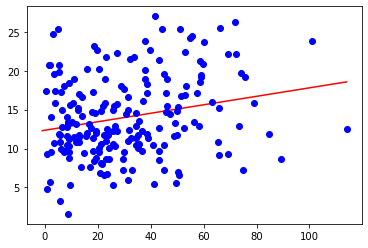

In [21]:
line_plot(0.0545,12.3514,X) # the m and c values are from the converged cost of 0.0001 which is the smallest value for cost
plt.plot(X,Y, 'bo')
plt.show()